In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

Let's load the data in form of dataframe.

In [2]:
df_state = pd.read_excel(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\Demographics_state.xlsx")
df_state.head()

States  Population in thousand  Unemployment Rural Male  \
0     Andhra Pradesh                 84581.0                       47   
1  Arunachal Pradesh                  1384.0                       35   
2              Assam                 31206.0                       30   
3              Bihar                104099.0                       45   
4       Chhattisgarh                 25545.0                       27   

   Unemployment Rural Female  Unemployment Urban Male  \
0                         13                       55   
1                         83                       95   
2                         57                       55   
3                         19                       90   
4                          7                       60   

   Unemployment Urban Female  Literacy Rate (in percent)  Number of Employees  \
0                         72                       67.02             111300.0   
1                        140                       65.39                577.0   
2                        169                       72.19              35530.0   
3                        170                       61.80              17317.0   
4                         70                       70.28              40497.0   

   Gross Domestic Product   Per Capita Net State Domestic Product   ...  \
0               23738349.0                                 44376.0  ...   
1                 568732.0                                 39726.0  ...   
2                8107367.0                                 24099.0  ...   
3               14227912.0                                 13728.0  ...   
4                9697218.0                                 34360.0  ...   

   Availability Of Power in Net Core Units  \
0                                   8515.0   
1                                     55.0   
2                                    570.0   
3                                   1126.0   
4                                   1462.0   

   Installed Capacity Of Renewable Power Grid im MegaWatt  \
0                                             1114.0        
1                                              104.0        
2                                               31.0        
3                                              114.0        
4                                              306.0        

   No. Of Available Charging Public Stations  Tax Exemption for Electric 2W  \
0                                      222.0                              0   
1                                        9.0                              0   
2                                       48.0                          20000   
3                                       83.0                          20000   
4                                       46.0                              0   

   Tax Exemption For Electric 4W  \
0                              0   
1                              0   
2                         150000   
3                         150000   
4                              0   

   Road Taxes Of Private Vehicle Petrol  Above 10 Lacs in percent  \
0                                               14.0                
1                                                NaN                
2                                                7.5                
3                                               13.0                
4                                                NaN                

   Road Taxes Of Private Vehicle Diesel  Above 10 Lacs in percent  \
0                                               14.0                
1                                                NaN                
2                                                7.5                
3                                               13.0                
4                                                NaN                

   Electric Vehicles Registered  Cost Of Electricty Costlier or Not  \
0                       63918.0                          

First let's check for the missing values.

In [3]:
df_state.isna().sum()

States                                                            0
Population in thousand                                            1
Unemployment Rural Male                                           0
Unemployment Rural Female                                         0
Unemployment Urban Male                                           0
Unemployment Urban Female                                         0
Literacy Rate (in percent)                                        0
Number of Employees                                               2
Gross Domestic Product                                            2
Per Capita Net State Domestic Product                             2
Deposit in Scheduled Commercial Banks in Crores                   1
Length of Road in KMs                                             1
Availability Of Power in Net Core Units                           1
Installed Capacity Of Renewable Power Grid im MegaWatt            4
No. Of Available Charging Public Stations       

So, we have some missing values. Lett's replacew this missing values with 0 if they are numerical datatypes.

In [4]:
df_state.dtypes

States                                                             object
Population in thousand                                            float64
Unemployment Rural Male                                             int64
Unemployment Rural Female                                           int64
Unemployment Urban Male                                             int64
Unemployment Urban Female                                           int64
Literacy Rate (in percent)                                        float64
Number of Employees                                               float64
Gross Domestic Product                                            float64
Per Capita Net State Domestic Product                             float64
Deposit in Scheduled Commercial Banks in Crores                   float64
Length of Road in KMs                                             float64
Availability Of Power in Net Core Units                           float64
Installed Capacity Of Renewable Power 

So, all missing values are numerical. Let's replace the missing value with the 0.

In [5]:
df_state.fillna(0,inplace=True)

In [6]:
sum(df_state.isna().sum())

0

Let's start with some visualization. In the above here we have a column with number of electric vehicle registered. So, let' plot the column first according to the state wise.

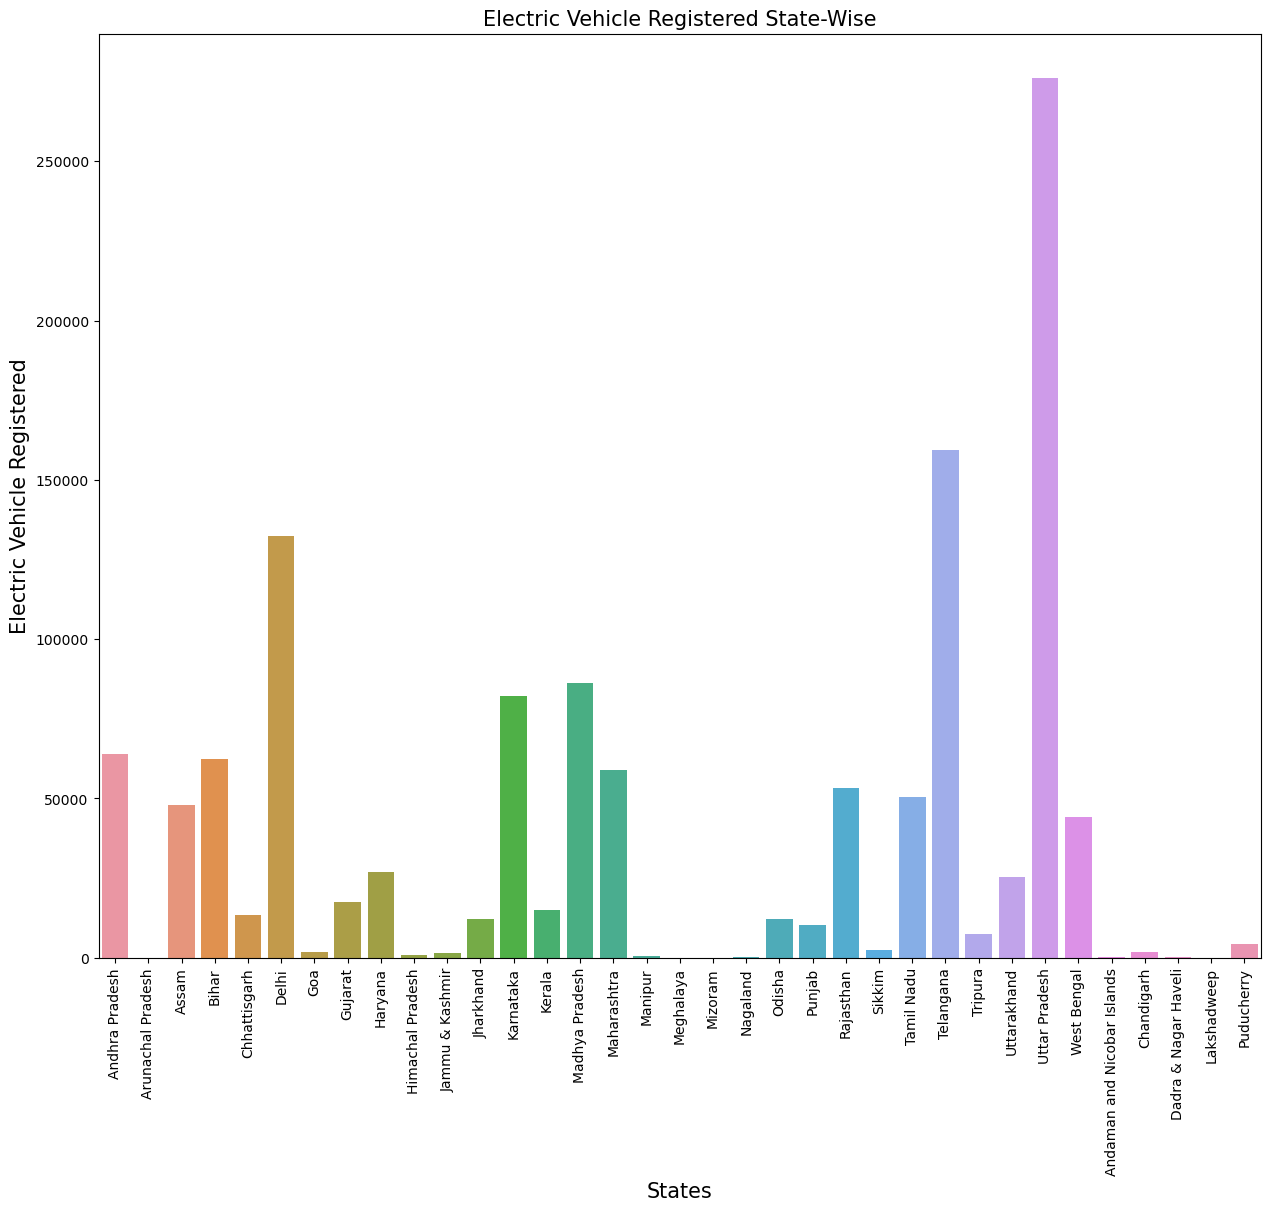

In [7]:
plt.figure(figsize=(15,12))
sns.barplot(data=df_state,x="States",y="Electric Vehicles Registered")
plt.title("Electric Vehicle Registered State-Wise",size=15)
plt.xlabel("States",size=15)
plt.ylabel("Electric Vehicle Registered",size=15)
plt.xticks(rotation="vertical");

So, Uttar Pradesh has highest number of electric vehicle registered, followed by the Telengana. Next we will plot a correlation plot and will see, which contributes most to the number of electric vehicles. 

Let's separate the numerical variables for the purpose of visualization.

In [8]:
df_state_num = df_state.iloc[:,:-2]

In [9]:
df_state_num.head()

States  Population in thousand  Unemployment Rural Male  \
0     Andhra Pradesh                 84581.0                       47   
1  Arunachal Pradesh                  1384.0                       35   
2              Assam                 31206.0                       30   
3              Bihar                104099.0                       45   
4       Chhattisgarh                 25545.0                       27   

   Unemployment Rural Female  Unemployment Urban Male  \
0                         13                       55   
1                         83                       95   
2                         57                       55   
3                         19                       90   
4                          7                       60   

   Unemployment Urban Female  Literacy Rate (in percent)  Number of Employees  \
0                         72                       67.02             111300.0   
1                        140                       65.39                577.0   
2                        169                       72.19              35530.0   
3                        170                       61.80              17317.0   
4                         70                       70.28              40497.0   

   Gross Domestic Product   Per Capita Net State Domestic Product   \
0               23738349.0                                 44376.0   
1                 568732.0                                 39726.0   
2                8107367.0                                 24099.0   
3               14227912.0                                 13728.0   
4                9697218.0                                 34360.0   

   Deposit in Scheduled Commercial Banks in Crores  Length of Road in KMs  \
0                                         292700.0               238001.0   
1                                           5200.0                21555.0   
2                                          58500.0               241789.0   
3                                         119200.0               130642.0   
4                                          56800.0                93965.0   

   Availability Of Power in Net Core Units  \
0                                   8515.0   
1                                     55.0   
2                                    570.0   
3                                   1126.0   
4                                   1462.0   

   Installed Capacity Of Renewable Power Grid im MegaWatt  \
0                                             1114.0        
1                                              104.0        
2                                               31.0        
3                                              114.0        
4                                              306.0        

   No. Of Available Charging Public Stations  Tax Exemption for Electric 2W  \
0                                      222.0                              0   
1                                        9.0                              0   
2                                       48.0                          20000   
3                                       83.0                          20000   
4                                       46.0                              0   

   Tax Exemption For Electric 4W  \
0                              0   
1                              0   
2                         150000   
3                         150000   
4                              0   

   Road Taxes Of Private Vehicle Petrol  Above 10 Lacs in percent  \
0                                               14.0                
1                                                0.0                
2                                                7.5                
3                                               13.0                
4                                                0.0                

   Road Taxes Of Private Vehicle Diesel  Above 10 Lacs in percent  \
0                                        

Let's print the summary of the variables. 

In [10]:
np.round(df_state_num.describe().transpose(),2)

count         mean  \
Population in thousand                               35.0     35308.91   
Unemployment Rural Male                              35.0        42.77   
Unemployment Rural Female                            35.0        44.31   
Unemployment Urban Male                              35.0        70.97   
Unemployment Urban Female                            35.0       115.00   
Literacy Rate (in percent)                           35.0        77.24   
Number of Employees                                  35.0     96848.40   
Gross Domestic Product                               35.0  14372152.86   
Per Capita Net State Domestic Product                35.0     46724.60   
Deposit in Scheduled Commercial Banks in Crores      35.0    153940.00   
Length of Road in KMs                                35.0    108288.80   
Availability Of Power in Net Core Units              35.0      2400.60   
Installed Capacity Of Renewable Power Grid im M...   35.0       807.20   
No. Of Available Charging Public Stations            35.0       188.14   
Tax Exemption for Electric 2W                        35.0      4000.00   
Tax Exemption For Electric 4W                        35.0     28857.14   
Road Taxes Of Private Vehicle Petrol  Above 10 ...   35.0         7.47   
Road Taxes Of Private Vehicle Diesel  Above 10 ...   35.0         7.63   
Electric Vehicles Registered                         35.0     36305.31   

                                                            std   min  \
Population in thousand                                 44089.40   0.0   
Unemployment Rural Male                                   32.16   0.0   
Unemployment Rural Female                                 49.06   0.0   
Unemployment Urban Male                                   32.55  28.0   
Unemployment Urban Female                                 84.66  35.0   
Literacy Rate (in percent)                                 8.62  61.8   
Number of Employees                                   137374.67   0.0   
Gross Domestic Product                              16734732.32   0.0   
Per Capita Net State Domestic Product                  28689.82   0.0   
Deposit in Scheduled Commercial Banks in Crores       269220.07   0.0   
Length of Road in KMs                                 121947.81   0.0   
Availability Of Power in Net Core Units                 3050.20   0.0   
Installed Capacity Of Renewable Power Grid im M...      1716.23   0.0   
No. Of Available Charging Public Stations                340.78   0.0   
Tax Exemption for Electric 2W                           8727.91   0.0   
Tax Exemption For Electric 4W                          63467.06   0.0   
Road Taxes Of Private Vehicle Petrol  Above 10 ...         5.26   0.0   
Road Taxes Of Private Vehicle Diesel  Above 10 ...         5.38   0.0   
Electric Vehicles Registered                           57077.96   0.0   

                                                          25%         50%  \
Population in thousand                                 1719.0    25351.00   
Unemployment Rural Male                                  28.0       38.00   
Unemployment Rural Female                                10.0       23.00   
Unemployment Urban Male                                  49.0       63.00   
Unemployment Urban Female                                66.5       86.00   
Literacy Rate (in percent)                               69.8       76.26   
Number of Employees                                    4341.5    40497.00   
Gross Domestic Product                              1083354.5  8779393.00   
Per Capita Net State Domestic Product                 30745.5    44376.00   
Deposit in Scheduled Commercial Banks in Crores        6050.0    56800.00   
Length of Road in KMs                                 11305.5    41729.00   
Availability Of Power in Net Core Units                 117.5     1021.00   
Installed Capacity Of Renewable Power Grid im M...       19.5      114.00   
No. Of Available Charging Public

Let's plot a heatmap to see the relation between variables.

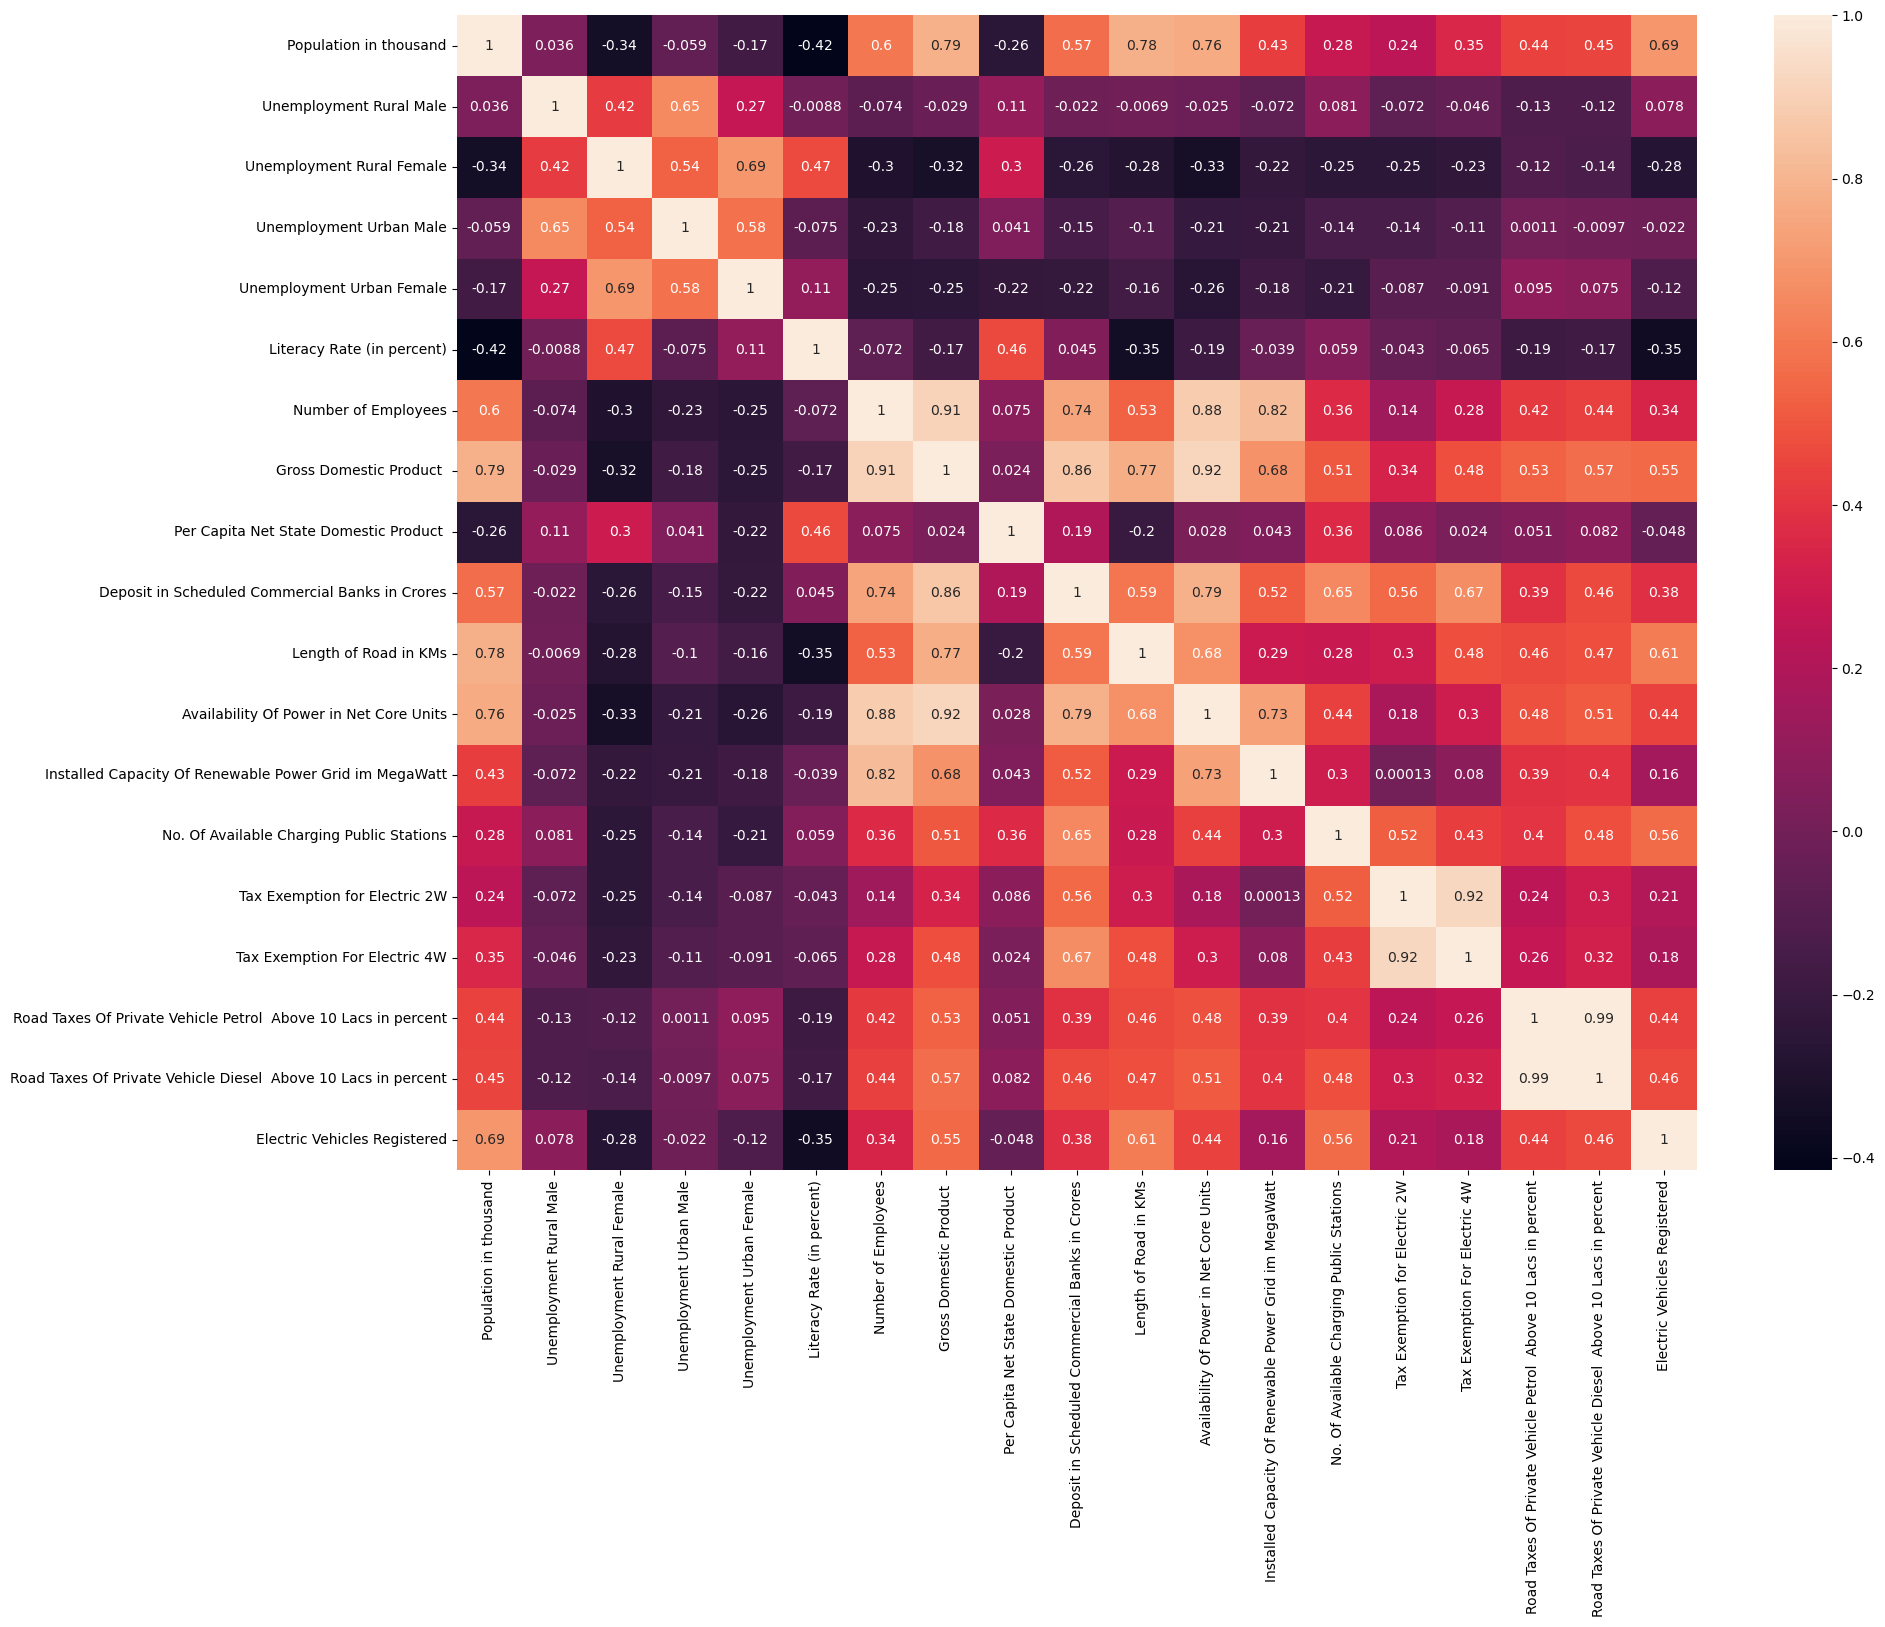

In [11]:
plt.figure(figsize=(20,15))
sns.heatmap(df_state_num.corr(),annot=True);

Of the factors that we have seen, registered electric vehicles are negatively affected by unemployment rate and literacy rate. And it is positively affected by the gross domestic product of state, deposits in banks in state,  length of roads in kms, availability of power in core units, no. of available charging stations and road taxes charged by the states. 

Let's explore these factors, one by one starting with the factors which has contributed positively. 

In [12]:
# Let's start with the number of available public charging stations


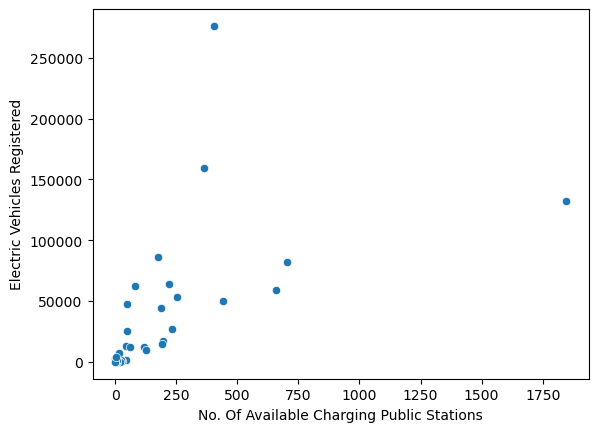

In [13]:
sns.scatterplot(data=df_state_num,x="No. Of Available Charging Public Stations",y="Electric Vehicles Registered");

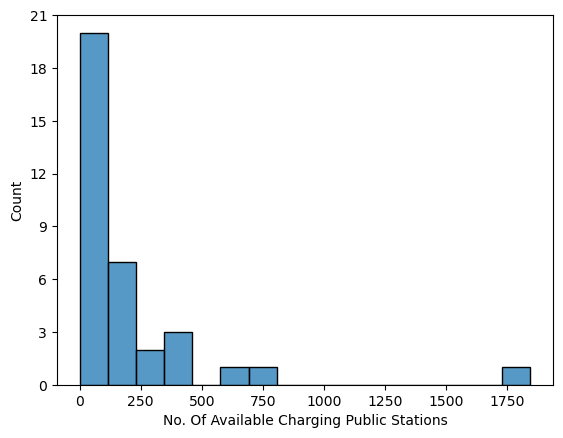

In [14]:
sns.histplot(data=df_state_num,x="No. Of Available Charging Public Stations")
# Set the y-axis tick values to integers
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True));

So, most of the states either don't have fully functional public charging staions or data is not available for them. 

Since visualization of 36 different states would be become different. Let's consider top 10 states where number of electric registered vehicle is highest and top 10 states where number of public charging stations are highest.

In [15]:
df_state["No. Of Available Charging Public Stations"].describe()

count      35.000000
mean      188.142857
std       340.782503
min         0.000000
25%        12.500000
50%        48.000000
75%       208.500000
max      1845.000000
Name: No. Of Available Charging Public Stations, dtype: float64

In [16]:
sort_charging_stations = df_state.sort_values("No. Of Available Charging Public Stations",ascending=False)[:10]

In [17]:
sort_ev_registered = df_state.sort_values("Electric Vehicles Registered",ascending=False)[:10]

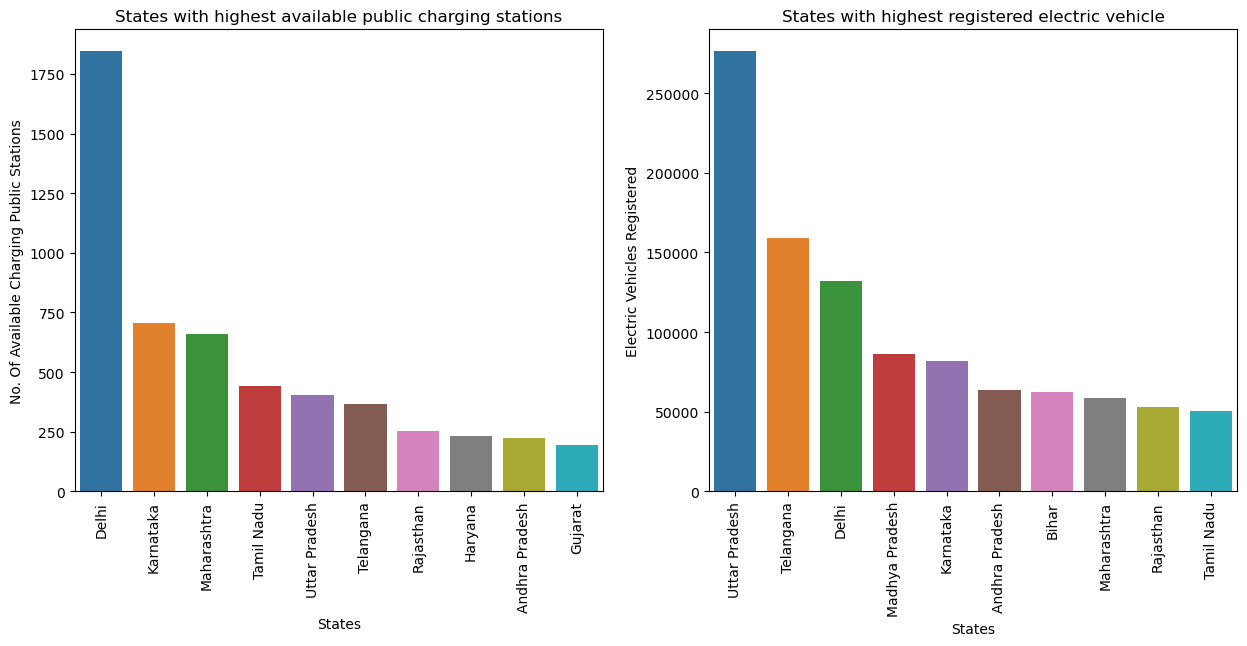

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("States with highest available public charging stations")
sns.barplot(data=sort_charging_stations,x="States",y="No. Of Available Charging Public Stations")
plt.xticks(rotation="vertical");

plt.subplot(1,2,2)
plt.title("States with highest registered electric vehicle")
sns.barplot(data=sort_ev_registered,x="States",y="Electric Vehicles Registered")
plt.xticks(rotation="vertical");

Though in the both segment common states get featured but we cannot say with much surety that for the current situation, that higher number of available charging station lead to higher number of registration of electric vehicle. 

If we see the correlation map, the highest contributing factor was length of road in KMs.

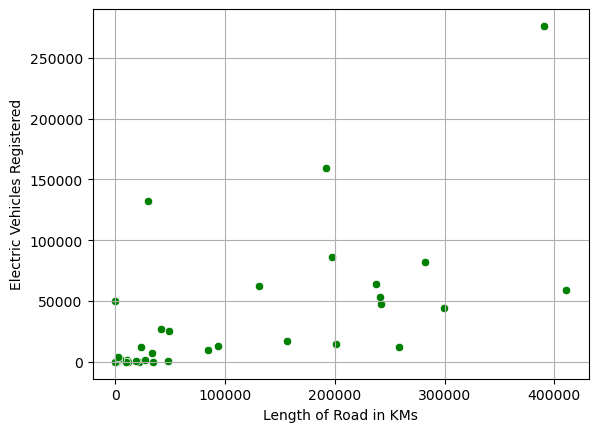

In [19]:
sns.scatterplot(data=df_state_num,x="Length of Road in KMs",y="Electric Vehicles Registered",color="green")
plt.grid();

So, relationship is somewhat linear but not completely linear.

Since we have 28 states, let's take the top 10 where number of KMs of road are high.

In [20]:
sort_km = df_state.sort_values(by="Length of Road in KMs",ascending=False)[:10]

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grouped_bar(df, object_var, variable1, variable2):
 
    categories = df[object_var].unique()
    values1 = df[variable1]
    values2 = df[variable2]

    # Set the width of the bars
    bar_width = 0.35

    # Generate an array of indices for the x-axis
    x_indices = np.arange(len(categories))

    # Plot the bars for variable1
    plt.bar(x_indices, values1, width=bar_width, label=variable1)

    # Plot the bars for variable2
    plt.bar(x_indices + bar_width, values2, width=bar_width, label=variable2)

    # Set the x-axis tick labels
    plt.xticks(x_indices + bar_width / 2, categories)

    # Set the y-axis label
    plt.ylabel('Value')

    # Set the title
    plt.title('Grouped Bar Chart')

    # Add a legend
    plt.legend()
    
    # Rotate the x-axis ticks
    plt.xticks(rotation="vertical")

    # Show the plot
    plt.show()


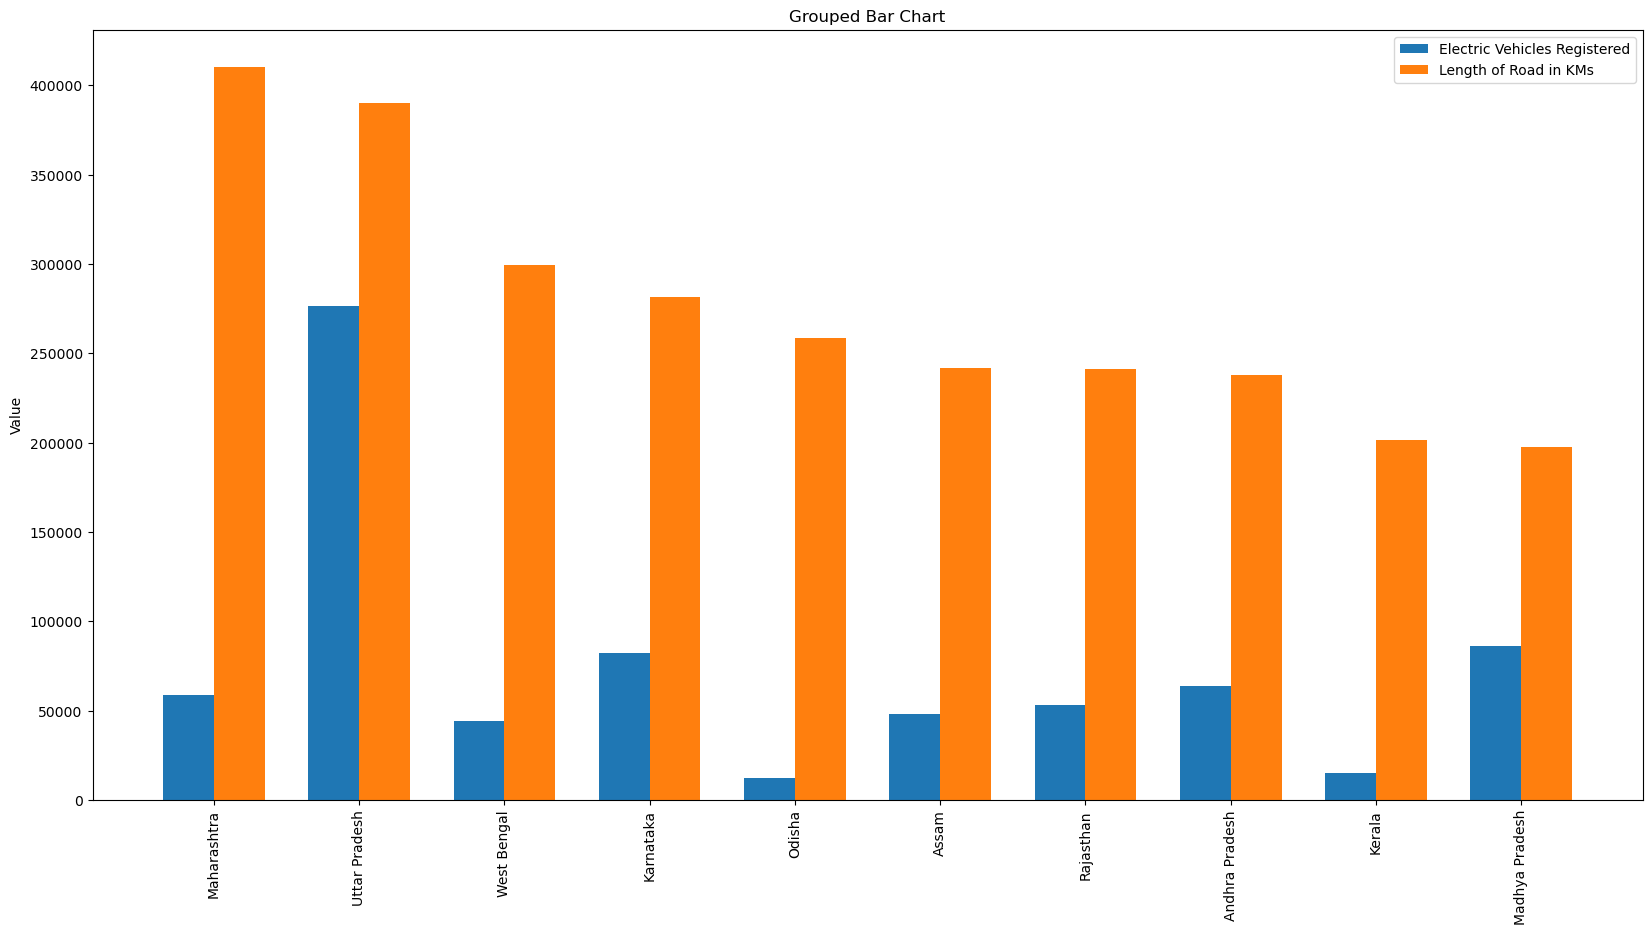

In [22]:
plt.figure(figsize=(20,10))
plot_grouped_bar(sort_km, 'States', 'Electric Vehicles Registered', 'Length of Road in KMs');

So, we can see that there is no clear pattern. Maharstra has the highest number of road in KMs yet it doesn't have the highest number of electric vehicle registered. But Uttar Pradesh which features second shows the correlation that higher number of KMs of road led to higher registered vehicle. It may be because larger KM road would give the more opportunity for establishing necessary infrastructure. 

Let's run the ttest to confirm that KMs of road has a significant impact on electric vehicle registration.    

In [23]:
import scipy.stats as stats
Ho = "Length of roads doesn't have any impact on the electric vehicle registration."
Ha = "Length of roads does have impact on the electric vehicle registration."

In [24]:
road = np.array(df_state["Length of Road in KMs"])
reg = np.array(df_state["Electric Vehicles Registered"])

In [25]:
# Perform the t-test 
t_statistic,p_value = stats.ttest_ind(road,reg)

In [26]:
# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 3.1628459067673145
P-Value: 0.0023354582115334157


Since the p-value is less than 0.05 we reject the null hypotheis and accept the alternate hypothesis. So, length of roads does offer an opportunity for more registration of electric vehicle.

Next factor we look at the availability of power in that state. Let's see what are top states power and how does they compare to top states with EV.

In [27]:
sort_power = df_state.sort_values(by="Availability Of Power in Net Core Units",ascending=False)[:10]

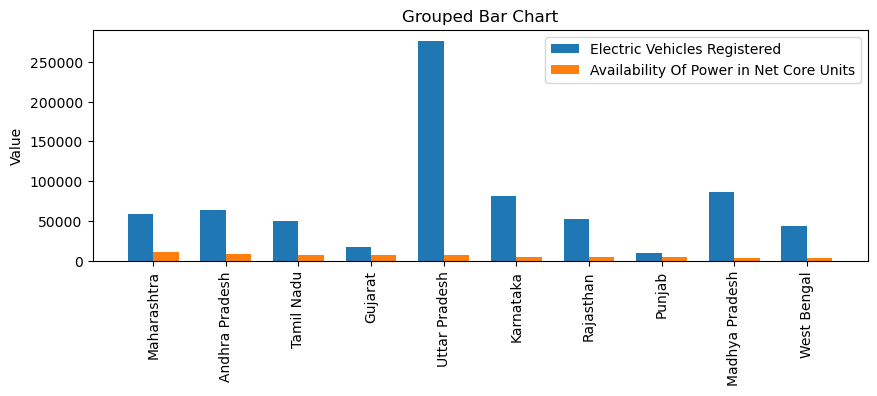

In [28]:
plt.figure(figsize=(10,3))
plot_grouped_bar(sort_power, 'States', 'Electric Vehicles Registered', 'Availability Of Power in Net Core Units');

Again there is no clear relationship. 

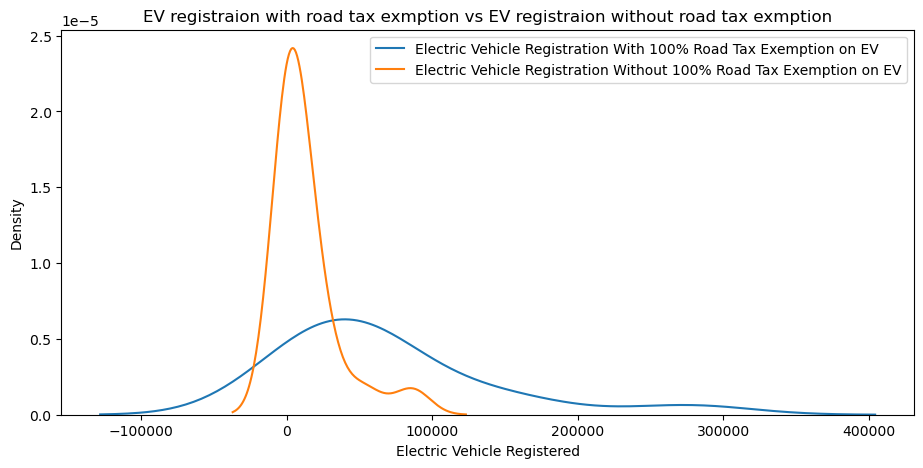

In [29]:
plt.figure(figsize=(11,5))
sns.distplot(x=df_state[df_state["100 Exemption on Road Tax Exemption On Electric Vehicle"]=="Yes"]["Electric Vehicles Registered"],hist=False,
            label="Electric Vehicle Registration With 100% Road Tax Exemption on EV")
sns.distplot(x=df_state[df_state["100 Exemption on Road Tax Exemption On Electric Vehicle"]=="No"]["Electric Vehicles Registered"],
           hist=False,label="Electric Vehicle Registration Without 100% Road Tax Exemption on EV")
plt.xlabel("Electric Vehicle Registered")
plt.title("EV registraion with road tax exmption vs EV registraion without road tax exmption")
plt.legend(loc="upper right");

So, we can see the electric vehicle registration is more when the road tax exemption is more. Now let's see which are the states where road tax is 100% exempted and let's see the EV registartion in those states.

In [30]:
sort_ev_yes = df_state[df_state["100 Exemption on Road Tax Exemption On Electric Vehicle"]=="Yes"].sort_values(by="Electric Vehicles Registered",ascending=False)[:10]

Let's plot the top states.

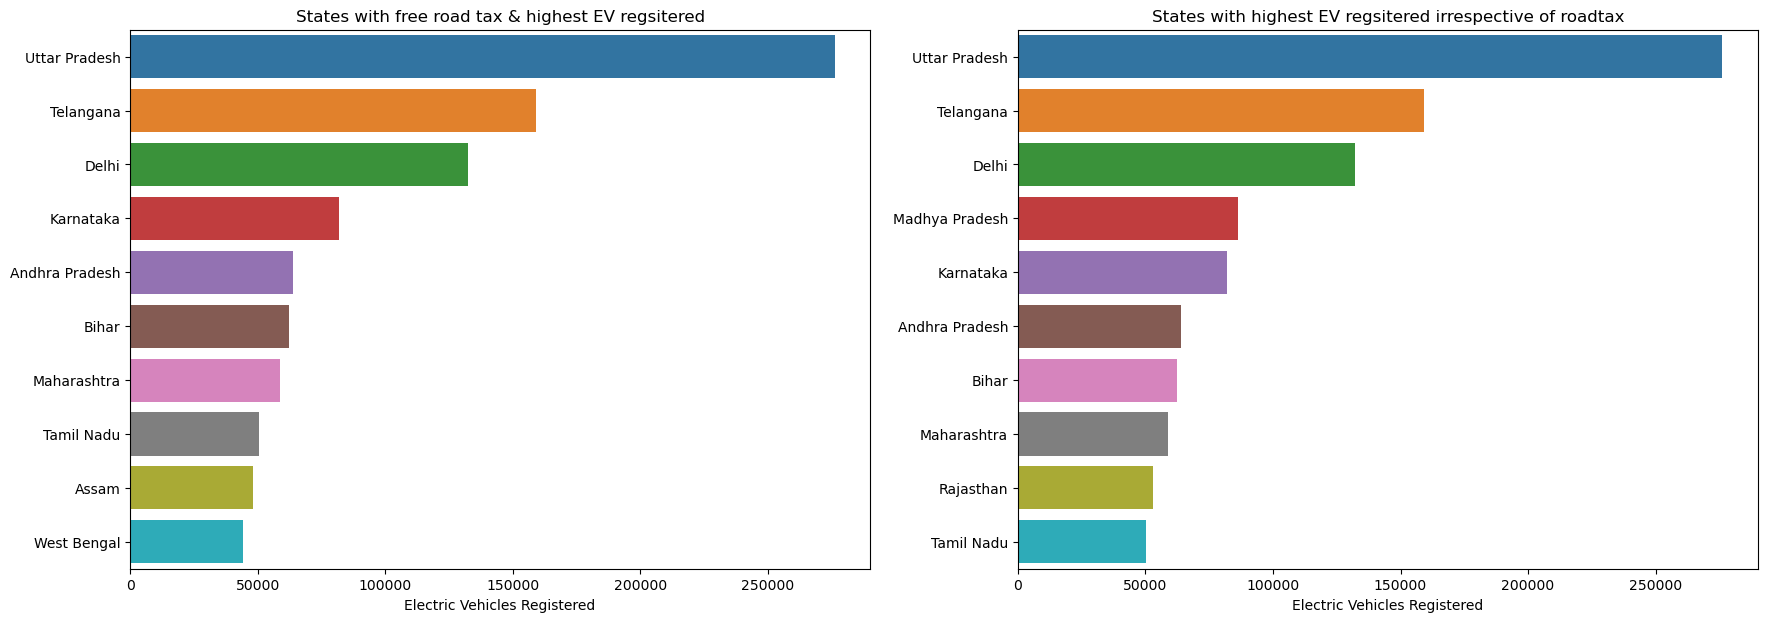

In [31]:
plt.figure(figsize=(21,7))
plt.subplot(1,2,1)
plt.title("States with free road tax & highest EV regsitered")
sns.barplot(data=sort_ev_yes,x="Electric Vehicles Registered",y="States",orient="h")
plt.ylabel(None)

plt.subplot(1,2,2)
plt.title("States with highest EV regsitered irrespective of roadtax")
sns.barplot(data=sort_ev_registered,x="Electric Vehicles Registered",y="States",orient="h")
plt.ylabel(None);

So, we can see that most of states feature in top 10 when the road tax is free for EV. So, road tax is directly impacting the sale of EVs.

There is one other object type variable is remaining. Let's perform the same operation that we did for the road tax.

In [32]:
df_state.columns

Index(['States', 'Population in thousand', 'Unemployment Rural Male',
       'Unemployment Rural Female', 'Unemployment Urban Male',
       'Unemployment Urban Female', 'Literacy Rate (in percent)',
       'Number of Employees', 'Gross Domestic Product ',
       'Per Capita Net State Domestic Product ',
       'Deposit in Scheduled Commercial Banks in Crores',
       'Length of Road in KMs', 'Availability Of Power in Net Core Units',
       'Installed Capacity Of Renewable Power Grid im MegaWatt',
       'No. Of Available Charging Public Stations',
       'Tax Exemption for Electric 2W', 'Tax Exemption For Electric 4W',
       'Road Taxes Of Private Vehicle Petrol  Above 10 Lacs in percent',
       'Road Taxes Of Private Vehicle Diesel  Above 10 Lacs in percent',
       'Electric Vehicles Registered', 'Cost Of Electricty Costlier or Not',
       '100 Exemption on Road Tax Exemption On Electric Vehicle'],
      dtype='object')

In [33]:
sort_cost_current = df_state[df_state["Cost Of Electricty Costlier or Not"]=="No"].sort_values(by="Electric Vehicles Registered",ascending=False)[:10]

In [34]:
sort_cost_current

States  Population in thousand  Unemployment Rural Male  \
25       Telangana                     0.0                       43   
0   Andhra Pradesh                 84581.0                       47   
22       Rajasthan                 68548.0                       52   
8          Haryana                 25351.0                       59   
27     Uttarakhand                 10086.0                       38   
7          Gujarat                 60440.0                       10   
13          Kerala                 33406.0                       64   
4     Chhattisgarh                 25545.0                       27   
20          Odisha                 41974.0                       61   
11       Jharkhand                 32988.0                       29   

    Unemployment Rural Female  Unemployment Urban Male  \
25                         22                       65   
0                          13                       55   
22                          9                       93   
8                          32                       78   
27                         15                       72   
7                           3                       40   
13                        134                       87   
4                           7                       60   
20                         23                       76   
11                          1                       99   

    Unemployment Urban Female  Literacy Rate (in percent)  \
25                        111                       66.54   
0                          72                       67.02   
22                        141                       66.11   
8                          95                       75.55   
27                        125                       78.82   
7                          71                       78.03   
13                        173                       94.00   
4                          70                       70.28   
20                         86                       72.89   
11                         68                       66.41   

    Number of Employees  Gross Domestic Product   \
25             117673.0               18938194.0   
0              111300.0               23738349.0   
22             124240.0               23094932.0   
8              211432.0               18252215.0   
27              77695.0                5602476.0   
7              447912.0               36791200.0   
13              72143.0               20278279.0   
4               40497.0                9697218.0   
20              47802.0               14849071.0   
11              61936.0                8779393.0   

    Per Capita Net State Domestic Product   ...  \
25                                 49114.0  ...   
0                                  44376.0  ...   
22                                 31279.0  ...   
8                                  67405.0  ...   
27                                 50657.0  ...   
7                                  55068.0  ...   
13                                 54560.0  ...   
4                                  34360.0  ...   
20                                 31416.0  ...   
11                                 25046.0  ...   

    Availability Of Power in Net Core Units  \
25                                      0.0   
0                                    8515.0   
22                                   4949.0   
8                                    3554.0   
27                                   1021.0   
7                                    7443.0   
13                                   1947.0   
4                                    1462.0   
20                                   2269.0   
11                                    603.0   

    Installed Capacity Of Renewable Power Grid im MegaWatt  \
25                                                0.0        
0                                              1114.0        
22                                             3353.0        
8                 

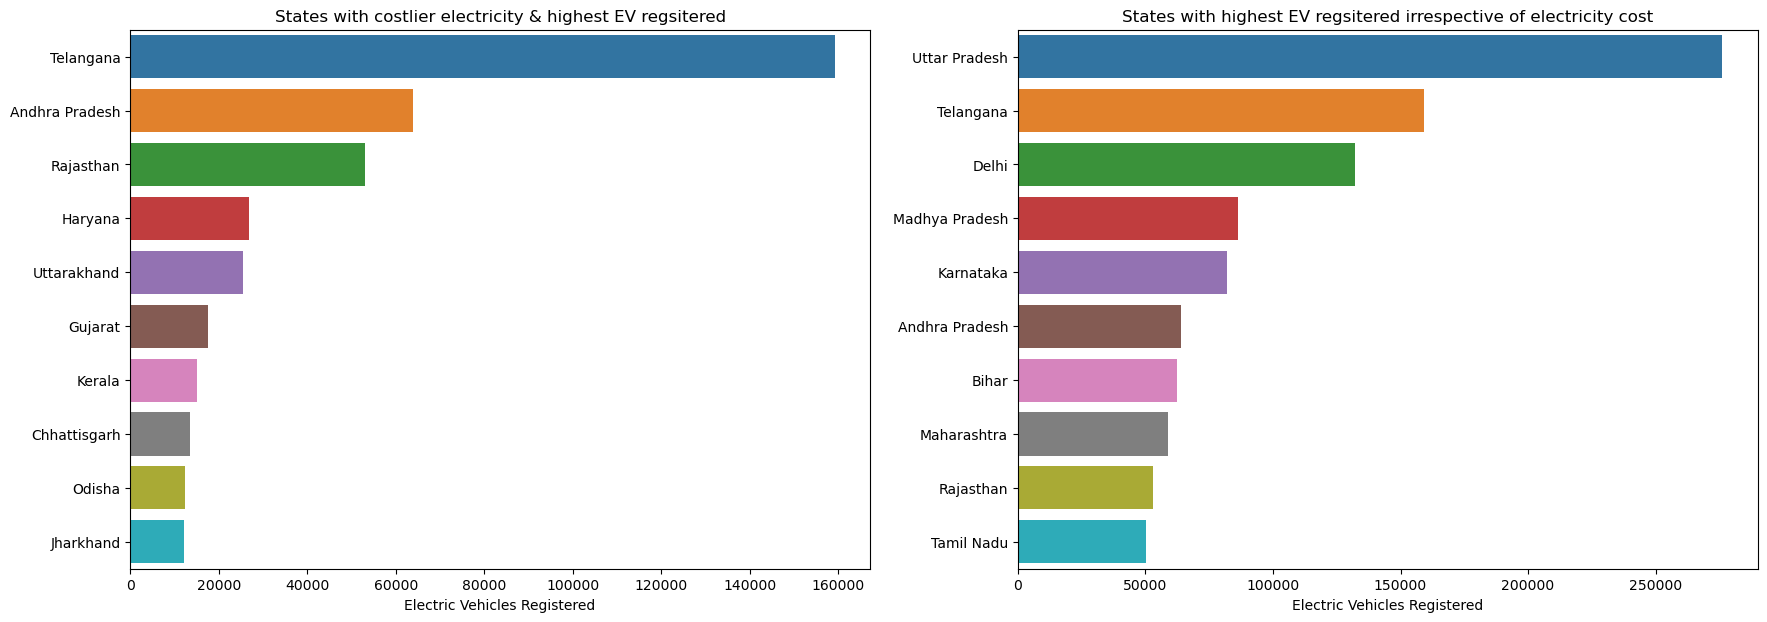

In [35]:
plt.figure(figsize=(21,7))
plt.subplot(1,2,1)
plt.title("States with costlier electricity & highest EV regsitered")
sns.barplot(data=sort_cost_current,x="Electric Vehicles Registered",y="States",orient="h")
plt.ylabel(None)

plt.subplot(1,2,2)
plt.title("States with highest EV regsitered irrespective of electricity cost")
sns.barplot(data=sort_ev_registered,x="Electric Vehicles Registered",y="States",orient="h")
plt.ylabel(None);

Clealry our graph shows cheap electricity doesn't lead to more buying of EV. It may or may not be the true because of several factors. Like electricity is cheap in those areas where there are hydroprojetcs or coal is found, but the population of these staes may be less, or as the EV cost high, income level of people may not be sufficient to purchase EV. So, we cannot comment that electricity cost doens't impact EV sales. As if we go deep there is currently two main ways to charge EVs, one through home charging and other installed at highways and other public available location. And according to many surveys still many people prefer overnight charging at their home, because it may be more convenient for them. We need more data to reach to a final conclusion. 

Let's deep dive the further and utilize more data to reach to some solid conclusion. We have data stored for various conclusion, downloaded through Indian govt. website.

In [36]:
import pandas as pd

def read_dataframe(file_path,index_name):
    # Read the file into a DataFrame, skipping the first three rows
    df = pd.read_excel(file_path, skiprows=3)
    # Drop the last column
    df = df.iloc[:, 1:-1]
    df = df.set_index(df.columns[0])
    df.index.name = index_name
    return df

In [37]:
andman_class_wise = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\1) Andaman & Nicobar\Class_wise.xlsx","Vehicle Class")
andman_fuel_wise = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\1) Andaman & Nicobar\Fuel_wise.xlsx","Fuel Category")
andman_maker_wise = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\1) Andaman & Nicobar\Maker_wise.xlsx","Maker")
andman_norm_wise = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\1) Andaman & Nicobar\Norm_wise.xlsx","Norm Catgory")

Let's see the dataframe.

In [38]:
andman_class_wise.head()

2WIC  2WN  2WT  3WN  3WT  4WIC  HGV  HMV  HPV  LGV  LMV  \
Vehicle Class                                                                   
ADAPTED VEHICLE          1    0    0    0    0     1    0    0    0    0    0   
AGRICULTURAL TRACTOR     0    0    0    0    0     0    2    1    0   96   63   
AMBULANCE                0    0    0    0    0     0    0    0    0    0   90   
ARTICULATED VEHICLE      0    0    0    0    0     0    2    0    0    1    0   
BULLDOZER                0    0    0    0    0     0    0    0    0    0    0   

                      LPV  MGV  MMV  MPV  OTH  
Vehicle Class                                  
ADAPTED VEHICLE         0    0    0    0    1  
AGRICULTURAL TRACTOR    0    1    0    0    0  
AMBULANCE              26    0    0    0    0  
ARTICULATED VEHICLE     0    0    0    0    0  
BULLDOZER               0    0    0    0    2

So, if we take a complete look at the list not every category is useful for us. Hence we will keep only category that we are interested in and will ignore the rest. 

In [39]:
index_int = ["BUS","E-RICKSHAW(P)","E-RICKSHAW WITH CART (G)","GOODS CARRIER","LUXURY CAB","MAXI CAB","M-CYCLE/SCOOTER-WITH SIDE CAR",
            "MOPED","MOTOR CAB","MOTOR CAR","MOTOR CYCLE/SCOOTER-SIDECAR(T)","MOTORISED CYCLE (CC > 25CC)","THREE WHEELER (GOODS)",
            "MOTOR CYCLE/SCOOTER-USED FOR HIRE","THREE WHEELER (PERSONAL)"]

In [40]:
andman_class_wise = andman_class_wise.loc[index_int]

In [41]:
andman_class_wise

2WIC    2WN  2WT  3WN  3WT  4WIC   HGV  \
Vehicle Class                                                               
BUS                                   0      0    0    0    0     0     0   
E-RICKSHAW(P)                         0      0    0    0   23     0     0   
E-RICKSHAW WITH CART (G)              0      0    0    0   29     0     0   
GOODS CARRIER                         0      0    0    0    0     0  1647   
LUXURY CAB                            0      0    0    0    0     0     0   
MAXI CAB                              0      0    0    0    0     0     0   
M-CYCLE/SCOOTER-WITH SIDE CAR         0    109    0    0    0     0     0   
MOPED                                 0  13906    0    0    0     0     0   
MOTOR CAB                             0      0    0    0    0     0     0   
MOTOR CAR                             0      0    0    0    0     0     0   
MOTOR CYCLE/SCOOTER-SIDECAR(T)        0      0    1    0    0     0     0   
MOTORISED CYCLE (CC > 25CC)           0     26    0    0    0     0     0   
THREE WHEELER (GOODS)                 0      0    0    0  114     0     0   
MOTOR CYCLE/SCOOTER-USED FOR HIRE     0      0  879    0    0     0     0   
THREE WHEELER (PERSONAL)              0      0    0   34    0     0     0   

                                   HMV  HPV   LGV    LMV   LPV  MGV  MMV  MPV  \
Vehicle Class                                                                   
BUS                                  0  342     0      0   395    0    9   47   
E-RICKSHAW(P)                        0    0     0      0     0    0    0    0   
E-RICKSHAW WITH CART (G)             0    0     0      0     0    0    0    0   
GOODS CARRIER                        0    0  3483      0     0  183    0    0   
LUXURY CAB                           0    0     0      0     1    0    0    0   
MAXI CAB                             0    0     0      0   633    0    0    0   
M-CYCLE/SCOOTER-WITH SIDE CAR        0    0     0      0     0    0    0    0   
MOPED                                0    0     0      0     0    0    0    0   
MOTOR CAB                            0    0     0      1  3177    0    0    0   
MOTOR CAR                            0    0     0  30162     1    0    0    0   
MOTOR CYCLE/SCOOTER-SIDECAR(T)       0    0     0      0     0    0    0    0   
MOTORISED CYCLE (CC > 25CC)          0    0     0      0     0    0    0    0   
THREE WHEELER (GOODS)                0    0     0      0     0    0    0    0   
MOTOR CYCLE/SCOOTER-USED FOR HIRE    0    0     0      0     0    0    0    0   
THREE WHEELER (PERSONAL)             0    0     0      0     0    0    0    0   

                                   OTH  
Vehicle Class                           
BUS                                100  
E-RICKSHAW(P)                        0  
E-RICKSHAW WITH CART (G)             0  
GOODS CARRIER                        0  
LUXURY CAB                           0  
MAXI CAB                             0  
M-CYCLE/SCOOTER-WITH SIDE CAR        0  
MOPED                                0  
MOTOR CAB                            1  
MOTOR CAR                            0  
MOTOR CYCLE/SCOOTER-SIDECAR(T)       0  
MOTORISED CYCLE (CC > 25CC)          0  
THREE WHEELER (GOODS)                0  
MOTOR CYCLE/SCOOTER-USED FOR HIRE    0  
THREE WHEELER (PERSONAL)             0

So,we got only those class categories where we are interested. Now let's look for the other values.

In [42]:
andman_fuel_wise.head()

2WIC     2WN  2WT  3WN   3WT  4WIC   HGV  HMV  HPV   LGV  \
Fuel Category                                                              
DIESEL             0      39    1   14   693     0  1662   14  303  3538   
ELECTRIC(BOV)      0       3   15    0    30     0     0    0   40     0   
LPG ONLY           0       5    0    0     0     0     0    0    0     0   
NOT APPLICABLE     0      11    0    0    37     0     0    0    0    12   
PETROL             1  111902  864   20  4658     1    14    0    2   267   

                  LMV   LPV  MGV  MMV  MPV  OTH  
Fuel Category                                    
DIESEL           5236  3146  217   36   47  152  
ELECTRIC(BOV)      87    10    0    0    0    0  
LPG ONLY           12     0    0    0    0    0  
NOT APPLICABLE     29     1    0    0    0    0  
PETROL          25575  1066    4    0    0   16

From the above table looks like the electric share is very less in all segment as compared to the others.

In [43]:
andman_maker_wise.head()

2WIC  2WN  2WT  3WN  3WT  4WIC  HGV  \
Maker                                                                          
ACTION CONSTRUCTION EQUIPMENT LTD.          0    0    0    0    0     0    4   
ADICO ESCORTS AGRI EQUIPMENTS PVT. LTD.     0    0    0    0    0     0    0   
ADISHWAR AUTO RIDE INDIA PVT LTD            0    1    0    0    0     0    0   
AJAX FIORI ENGINEERING PVT LTD              0    0    0    0    0     0    1   
AMW MOTORS LIMITED                          0    0    0    0    0     0   10   

                                         HMV  HPV  LGV  LMV  LPV  MGV  MMV  \
Maker                                                                        
ACTION CONSTRUCTION EQUIPMENT LTD.         0    0    0    2    0    3    6   
ADICO ESCORTS AGRI EQUIPMENTS PVT. LTD.    0    0    0    2    0    0    0   
ADISHWAR AUTO RIDE INDIA PVT LTD           0    0    0    0    0    0    0   
AJAX FIORI ENGINEERING PVT LTD             0    0    0    0    0    3    0   
AMW MOTORS LIMITED                         0    0    0    1    1    0    0   

                                         MPV  OTH  
Maker                                              
ACTION CONSTRUCTION EQUIPMENT LTD.         0    4  
ADICO ESCORTS AGRI EQUIPMENTS PVT. LTD.    0    0  
ADISHWAR AUTO RIDE INDIA PVT LTD           0    0  
AJAX FIORI ENGINEERING PVT LTD             0    1  
AMW MOTORS LIMITED                         0    0

In [44]:
andman_maker_wise.tail()

2WIC  2WN  2WT  3WN  3WT  4WIC  HGV  HMV  HPV  \
Maker                                                                           
VOLVO AUTO INDIA PVT LTD           0    0    0    0    0     0    0    0    0   
VOLVO CE INDIA PRIVATE LIMITED     0    0    0    0    0     0    0    0    0   
VOLVO INDIA PVT LTD                0    0    0    0    0     0    0    0    0   
WILLYS INDIA LTD                   0    0    0    0    0     0    0    0    0   
WIRTGEN INDIA PVT LTD              0    0    0    0    0     0    0    0    0   

                                LGV  LMV  LPV  MGV  MMV  MPV  OTH  
Maker                                                              
VOLVO AUTO INDIA PVT LTD          0    1    0    0    0    0    0  
VOLVO CE INDIA PRIVATE LIMITED    0    0    0    0    0    0    8  
VOLVO INDIA PVT LTD               0    1    0    1    1    0    0  
WILLYS INDIA LTD                  0    1    0    0    0    0    0  
WIRTGEN INDIA PVT LTD             0    0    0    0    0    0    2

This table doesn't contribute much for the data. So, we won't consider this table for further states.

In [45]:
andman_norm_wise

2WIC    2WN  2WT  3WN   3WT  4WIC   HGV  HMV  HPV  \
Norm Catgory                                                                   
BHARAT STAGE I                0      7    0    0     1     0     7    0    2   
BHARAT STAGE II               0     44    0    0    16     0    29    0    2   
BHARAT STAGE III              0    160   40    0   124     0    29    0    2   
BHARAT STAGE III (CEV)        0      0    0    0     0     0     0    6    0   
BHARAT STAGE III/IV           0      0    0    0     0     0     1    0    0   
BHARAT STAGE IV               0     80   40    0    41     0    22    0    2   
BHARAT STAGE IV (CEV)         0      0    0    0     0     0     0    3    0   
BHARAT STAGE IV/VI            0      0    0    0     0     0     0    0    0   
BHARAT STAGE VI               1  12468   31    0   752     1   194    1   16   
BHARAT (TREM) STAGE III       0      8    0    0     5     0     1    0    0   
BHARAT (TREM) STAGE III A     0      0    0    0     0     0     0    0    0   
BHARAT (TREM) STAGE III B     0      1    0    0     0     0     1    0    0   
BHARAT (TREM) STAGE IV        0      0    0    0     0     0     0    0    0   
EURO 1                        0      1    0    0     0     0     0    0    0   
EURO 2                        0      2    0    0     0     0     1    0    0   
EURO 3                        0      1    0    0     0     0     6    0    0   
EURO 4                        0      0    0    0     0     0     0    0    0   
EURO 6                        0      1    0    0     0     0     0    0    0   
NOT AVAILABLE                 0  99353  769   34  4485     0  1385    4  321   

                            LGV    LMV   LPV  MGV  MMV  MPV  OTH  
Norm Catgory                                                      
BHARAT STAGE I                0      4     0    0    0    0    0  
BHARAT STAGE II              39     20    13    1    0    0    0  
BHARAT STAGE III             22     78    35    0    0    0    2  
BHARAT STAGE III (CEV)        0      0     0    0    8    0   15  
BHARAT STAGE III/IV           0      1     0    0    0    0    0  
BHARAT STAGE IV              47    127    87    3    0    0    0  
BHARAT STAGE IV (CEV)         0      0     0    0    1    0    1  
BHARAT STAGE IV/VI            0      5     0    0    0    0    0  
BHARAT STAGE VI             612   4095   178   30    0    1    1  
BHARAT (TREM) STAGE III       1      4     0    0    1    0    0  
BHARAT (TREM) STAGE III A     0     12     0    0    0    0    0  
BHARAT (TREM) STAGE III B     0      0     0    0    0    0    0  
BHARAT (TREM) STAGE IV        0      3     0    0    0    0    0  
EURO 1                        0      0     0    0    0    0    0  
EURO 2                        0      3     1    0    0    0    0  
EURO 3                        0      4     0    0    0    0    0  
EURO 4                        0      6     0    0    0    0    0  
EURO 6                        0      0     0    0    0    0    0  
NOT AVAILABLE              3096  26733  3949  187   26   46  149

The table above would show the emission by the type, but it won't much help in segmentation for EV. Hence ignoring this table further states. Let's see which segment has maximum EV contribution in Andaman Nicobar state.

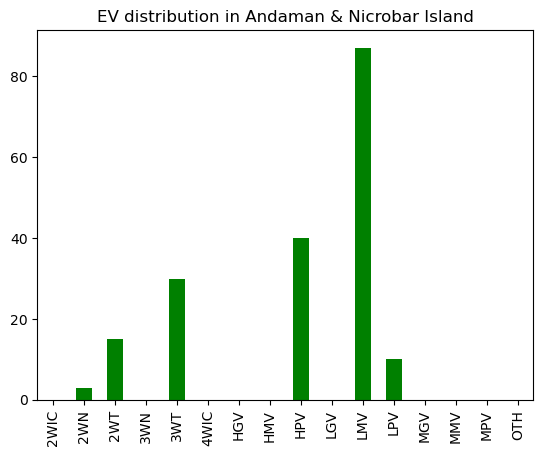

In [46]:
plt.title("EV distribution in Andaman & Nicrobar Island")
andman_fuel_wise.iloc[1].plot(kind="bar",color="green");

So, as we can see that LMV electric vehicle is registered most in the Andaman region. So, let's take a look at the demogrpahic data of Andaman and let's see can we establish any connection with demographic data. 

In [47]:
pd.set_option('display.max_columns',None)
df_state.iloc[30].reset_index().transpose()

0                       1   \
index                       States  Population in thousand   
30     Andaman and Nicobar Islands                   381.0   

                            2                          3   \
index  Unemployment Rural Male  Unemployment Rural Female   
30                          32                        153   

                            4                          5   \
index  Unemployment Urban Male  Unemployment Urban Female   
30                          46                        247   

                               6                    7   \
index  Literacy Rate (in percent)  Number of Employees   
30                          86.63                 74.0   

                            8                                       9   \
index  Gross Domestic Product   Per Capita Net State Domestic Product    
30                    347985.0                                 69177.0   

                                                    10                     11  \
index  Deposit in Scheduled Commercial Banks in Crores  Length of Road in KMs   
30                                              1800.0                 1386.0   

                                            12  \
index  Availability Of Power in Net Core Units   
30                                        20.0   

                                                      13  \
index  Installed Capacity Of Renewable Power Grid im ...   
30                                                 126.0   

                                              14  \
index  No. Of Available Charging Public Stations   
30                                           3.0   

                                  15                             16  \
index  Tax Exemption for Electric 2W  Tax Exemption For Electric 4W   
30                                 0                              0   

                                                      17  \
index  Road Taxes Of Private Vehicle Petrol  Above 10...   
30                                                   0.0   

                                                      18  \
index  Road Taxes Of Private Vehicle Diesel  Above 10...   
30                                                   0.0   

                                 19                                  20  \
index  Electric Vehicles Registered  Cost Of Electricty Costlier or Not   
30                            159.0                                  No   

                                                      21  
index  100 Exemption on Road Tax Exemption On Electri...  
30                                                    No

So, from above, cost of electricity is cheaper, with only 3 public stations available and cost of electricity is lower, here people may prefer to charge at home. Though unemployment being high among rural and urban woman, gpd per capita of the island is high *(5th in India)*, and this may cause them to buy more LMV electric vehicle than 2 & 3 wheeler EV.

In [48]:
sort_gdp_per = df_state.sort_values(by="Per Capita Net State Domestic Product ",ascending=False).reset_index()

Now let's look at the petrol and diesel distribution in the Andaman.

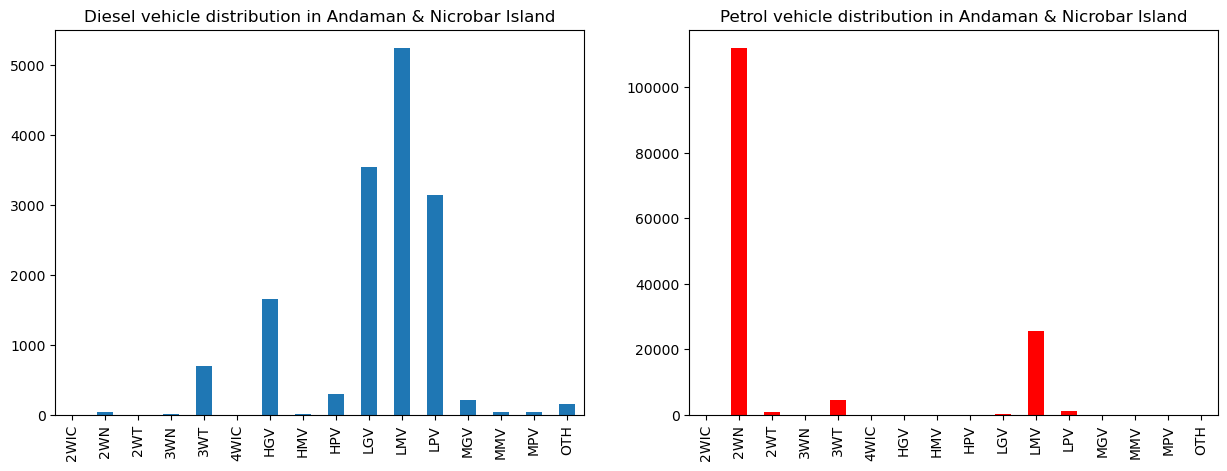

In [49]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Diesel vehicle distribution in Andaman & Nicrobar Island")
andman_fuel_wise.iloc[0].plot(kind="bar");
plt.subplot(1,2,2)
plt.title("Petrol vehicle distribution in Andaman & Nicrobar Island")
andman_fuel_wise.iloc[4].plot(kind="bar",color="red");

Although the LMV segment is much contributed by petrol and diesel segment, yet it is the most lucrative option for any new market entrant of EV here followed by 2WT. 

Now let's take a look at Andhra Pradesh.

In [50]:
andhra_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\2) Andhra Pradesh\Fuel_wise.xlsx","Fuel Category")

In [51]:
andhra_fuel.head(7)

2WIC       2WN  2WT     3WN   3WT  4WIC     HGV   HMV    HPV  \
Fuel Category                                                                  
CNG ONLY           0        12    0    7155   554     2     376     0      2   
DIESEL             0      9705    0  650223  1204    62  261185  4409  20354   
DIESEL/HYBRID      0         0    0       0     0     0       0     0      0   
ELECTRIC(BOV)      2     57542    1     996   480     0      17     0      0   
LPG ONLY           0         5    0     136     0     0       0     0      0   
NOT APPLICABLE     0    124592    0     381     0     6    1176   344     51   
PETROL           201  12461311   31   14964     0   223     227    12     18   

                   LGV     LMV     LPV    MGV    MMV    MPV   OTH  
Fuel Category                                                      
CNG ONLY           949      57      30    128      0     64     7  
DIESEL          375122  972742  297454  31250   8855  12909  2663  
DIESEL/HYBRID        0      22       0      0      0      0     0  
ELECTRIC(BOV)      497    2493      23      0      5      0  1862  
LPG ONLY            18     410      41      1      0      0     0  
NOT APPLICABLE     475  275065    1784     54  12037      6     5  
PETROL           15244  548172    6321    203    157     32  3479

Let's plot the graph to see the EV distribution here.

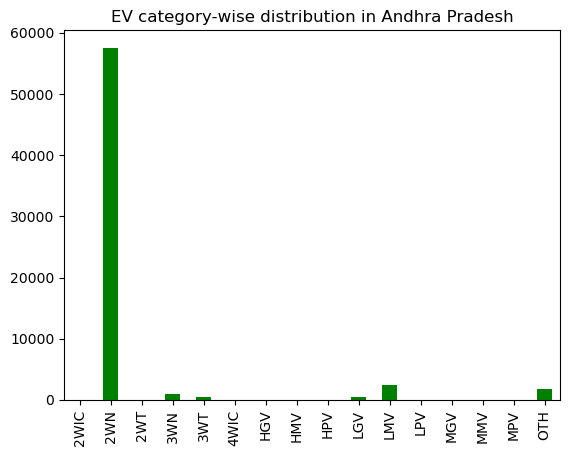

In [52]:
plt.title("EV category-wise distribution in Andhra Pradesh")
andhra_fuel.iloc[3].plot(kind="bar",color="green");

Here the market is dominated by the 2 Wheeler Non-transport. Let's try to analyze the fact with the demographic data we have available.

In [53]:
df_state.iloc[0].reset_index().transpose()

0                       1                        2   \
index          States  Population in thousand  Unemployment Rural Male   
0      Andhra Pradesh                 84581.0                       47   

                              3                        4   \
index  Unemployment Rural Female  Unemployment Urban Male   
0                             13                       55   

                              5                           6   \
index  Unemployment Urban Female  Literacy Rate (in percent)   
0                             72                       67.02   

                        7                        8   \
index  Number of Employees  Gross Domestic Product    
0                 111300.0               23738349.0   

                                           9   \
index  Per Capita Net State Domestic Product    
0                                     44376.0   

                                                    10                     11  \
index  Deposit in Scheduled Commercial Banks in Crores  Length of Road in KMs   
0                                             292700.0               238001.0   

                                            12  \
index  Availability Of Power in Net Core Units   
0                                       8515.0   

                                                      13  \
index  Installed Capacity Of Renewable Power Grid im ...   
0                                                 1114.0   

                                              14  \
index  No. Of Available Charging Public Stations   
0                                          222.0   

                                  15                             16  \
index  Tax Exemption for Electric 2W  Tax Exemption For Electric 4W   
0                                  0                              0   

                                                      17  \
index  Road Taxes Of Private Vehicle Petrol  Above 10...   
0                                                   14.0   

                                                      18  \
index  Road Taxes Of Private Vehicle Diesel  Above 10...   
0                                                   14.0   

                                 19                                  20  \
index  Electric Vehicles Registered  Cost Of Electricty Costlier or Not   
0                           63918.0                                  No   

                                                      21  
index  100 Exemption on Road Tax Exemption On Electri...  
0                                                    Yes

People here have very low literacy rate, 6th lowest in complete India and GDP per capita also low at the 18th number in complete India. This could be the reason of sale of more 2WT. But with the road registration free, and electricity cost is also not higher and availability of power is high at 7th position in India, in coming future this might attract the market enterants and can shift people purchase towards electric vehicles.  

In [54]:
sort_literacy = df_state.sort_values(by="Literacy Rate (in percent)",ascending=False).reset_index()

Noe let's take a look at the petrol and diesel category wise vehicle distribution.

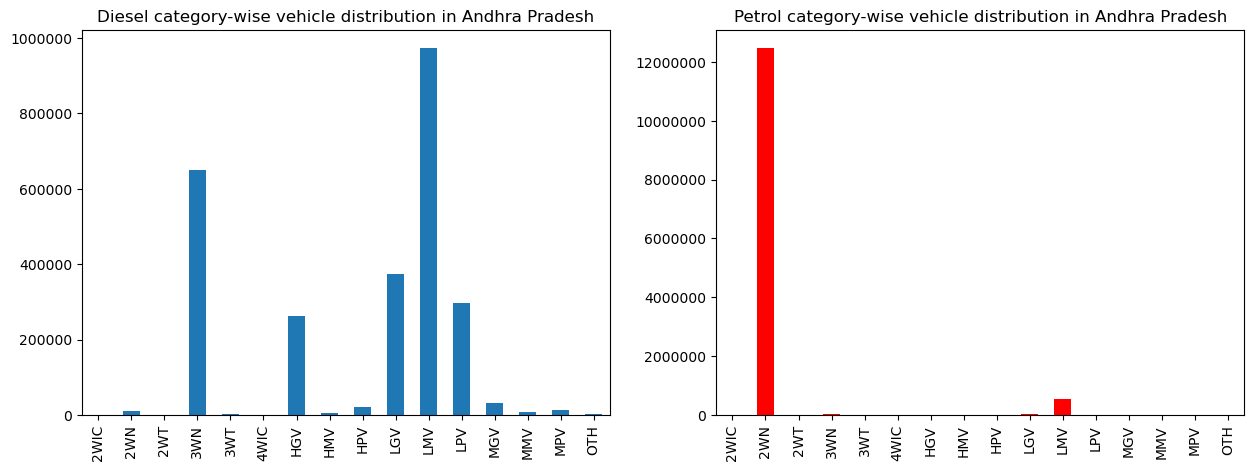

In [55]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Andhra Pradesh")
andhra_fuel.iloc[1].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Andhra Pradesh")
andhra_fuel.iloc[6].plot(kind="bar",color="red");

Though currently 2W has been dominated by the Petrol segment, but this segment has highest number of electric vehicle, as compared to any other electric vehicle, more than 10 times. Any market enterant should focus on this segment in this area followed by LMV.

Now let's take a look at the Arunachal Pradesh. 

In [56]:
arunachal_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\3) Arunachal Pradesh\Fuel_wise.xlsx","Fuel Category")
arunachal_fuel.head()

2WIC  2WN  2WT  3WN   3WT  4WIC   HGV  HMV   HPV   LGV  \
Fuel Category                                                             
CNG ONLY            0    1    0    0     0     0    13    0    17     6   
DIESEL              0   73    0   10  1442     2  9467  528  4671  9706   
DIESEL/HYBRID       0    1    0    0     0     0     1    0     0     0   
DUAL DIESEL/CNG     0    0    0    0     0     0     0    0     1     0   
ELECTRIC(BOV)       0   16    0    0     0     0     0    0     0     0   

                   LMV   LPV   MGV  MMV  MPV   OTH  
Fuel Category                                       
CNG ONLY             3     7     3    0    4     0  
DIESEL           27871  4411  1033  367  517  1595  
DIESEL/HYBRID       70     2     0    0    0     0  
DUAL DIESEL/CNG      0     0     0    0    0     0  
ELECTRIC(BOV)        9     1     0    0    0     0

Let's plot the graph to see the EV distribution here.

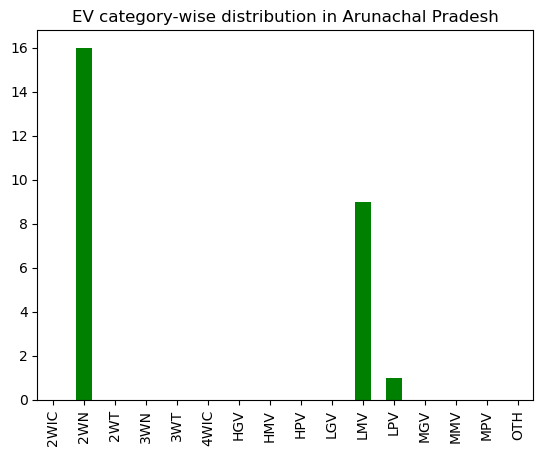

In [57]:
plt.title("EV category-wise distribution in Arunachal Pradesh")
arunachal_fuel.iloc[4].plot(kind="bar",color="green");

Here sale of EV is very low,may be lowest across all Indian region, only 16 for 2WN and 9 for LMV and 1 for LPV. The reason could be that first being hilly area with low population. Other being it has 2nd lowest literacy rate in India, only better tha Bihar. Plus road tax is not free for EVs and cost of electricity is also not low. Also, with the road length of 21555.0 	KM, it has only 9 public charging stations.From the data, power of availability is also very low. All these factors are hindering here to growth of EV market here.

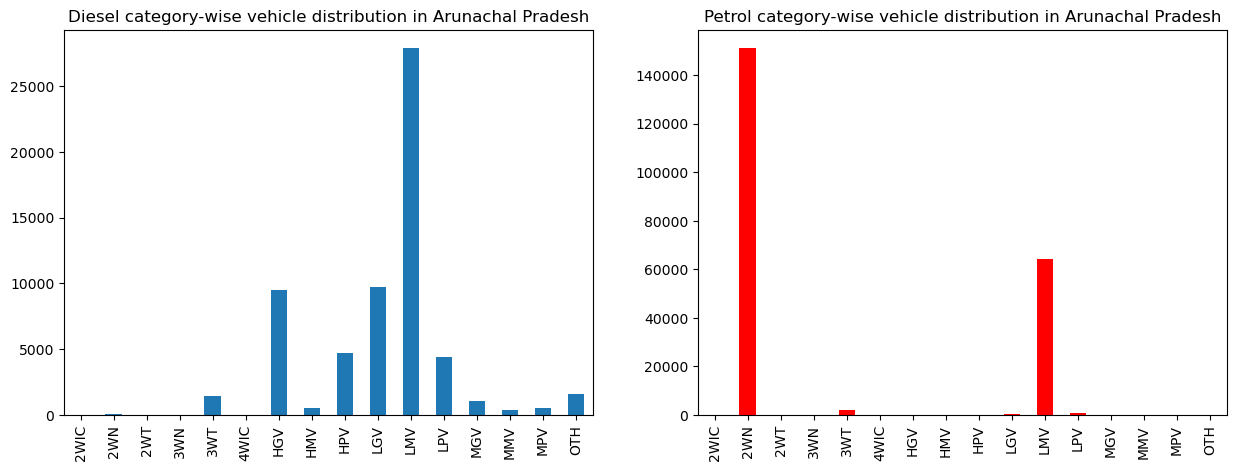

In [58]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Arunachal Pradesh")
arunachal_fuel.iloc[1].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Arunachal Pradesh")
arunachal_fuel.iloc[6].plot(kind="bar",color="red");

So, from the grpah it is clear that this state is not yet market condition feasible for EV data. May be company try there vehicles here when it would be time for late entrants or laggard to enter.

Let's take a look at the Assam.

In [59]:
assam_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\4) Assam\Fuel_wise.xlsx","Fuel Category")
assam_fuel.head()

2WIC   2WN  2WT  3WN     3WT  4WIC    HGV   HMV    HPV     LGV  \
Fuel Category                                                                   
CNG ONLY          0     8    0    0      88     0      3     0     44      25   
DIESEL            0   385    1   46   89838     0  87521  1258  10359  254251   
DIESEL/HYBRID     0     0    0    0       5     0      1     0      0       4   
ELECTRIC(BOV)     0  3562    0    0  105820     0      1     0     15     408   
ETHANOL           0     0    0    0       0     0      0     0      0       1   

                  LMV    LPV    MGV  MMV   MPV   OTH  
Fuel Category                                         
CNG ONLY            7      7      2    0    63     0  
DIESEL         156573  52149  12609  328  4211  5856  
DIESEL/HYBRID    1393     35      0    0     0     0  
ELECTRIC(BOV)     322     16      0    0     0     1  
ETHANOL             0      0      0    0     0     0

Let's plot the graph of EV distribution here.

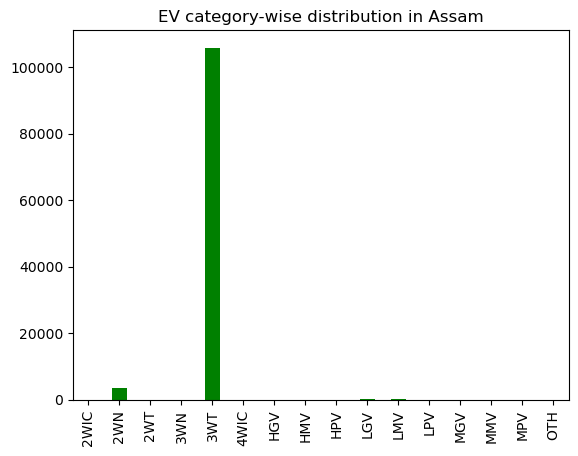

In [60]:
plt.title("EV category-wise distribution in Assam")
assam_fuel.iloc[3].plot(kind="bar",color="green");

So, as compared to earlier cases here the highest EV(BOV) is 3WT. So, people here prefer to take battery operated auto etc. for public transport. People have low purcahse of electric LMV, may be because of income level, as GDP per cpaita her eis 3rd lowest aong all states in India. But things may change, as govt has set the tax registraion for EV free, to encourage more people to buy EV. Also there is Rs.20,000 tax exemption for electric 2W and Rs.1,50,000 tax exemption for electric 4W, making the segment of EV very attractive. 

Let's take a llok at the petrol and diesel category-wise distribution here.

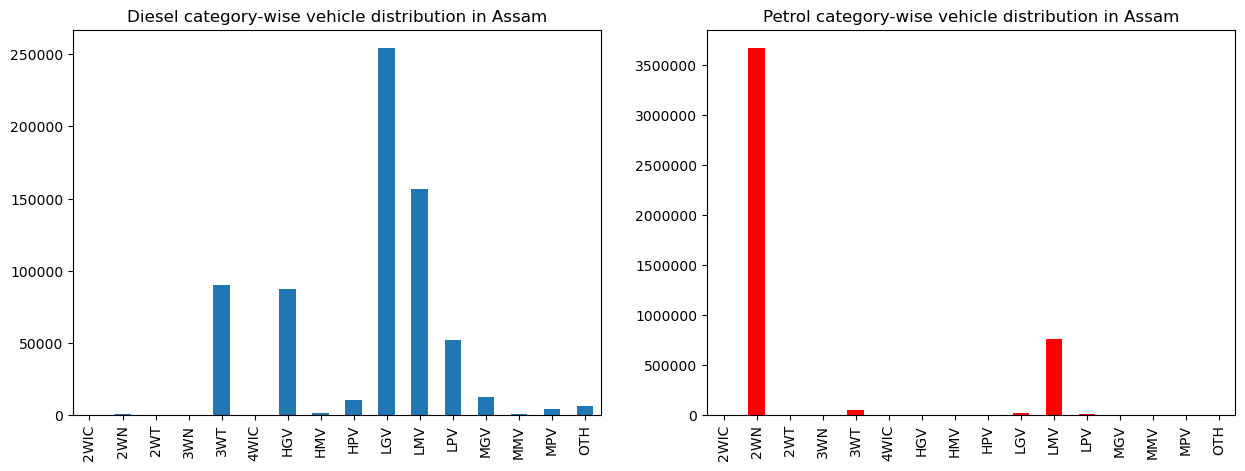

In [61]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Assam")
assam_fuel.iloc[1].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Assam")
assam_fuel.iloc[8].plot(kind="bar",color="red");

So, people here prefer 2WN of Petrol and amount is very high, more than 1000 times greater of EV. So, any EV market enterant should focus on commercial three wheeler which is highest among all three segments. 

Next state is Bihar. Let's analyze the data of it.

In [62]:
bihar_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\5) Bihar\Fuel_wise.xlsx","Fuel Category")
bihar_fuel.head()

2WIC    2WN  2WT  3WN     3WT  4WIC     HGV  HMV    HPV  \
Fuel Category                                                              
CNG ONLY            0     25    0    1   33973     0      82    0    204   
DIESEL              6   2841    1   54  417055    15  181116  393  27674   
DIESEL/HYBRID       0      0    0    0       0     0       2    0      3   
DUAL DIESEL/CNG     0      0    0    0       0     0       1    0      0   
ELECTRIC(BOV)       0  20287    0    2  126068     1       7    0     27   

                    LGV     LMV     LPV    MGV   MMV    MPV   OTH  
Fuel Category                                                      
CNG ONLY            611      62      18     63     0    172     0  
DIESEL           642527  316721  111304  19432  3766  12339  4031  
DIESEL/HYBRID         4    1725      29      0     0      0     0  
DUAL DIESEL/CNG       0       0       0      0     0      0     0  
ELECTRIC(BOV)       193     436      11      1     0      0     0

Let's plot a EV category-wise distribution of it.

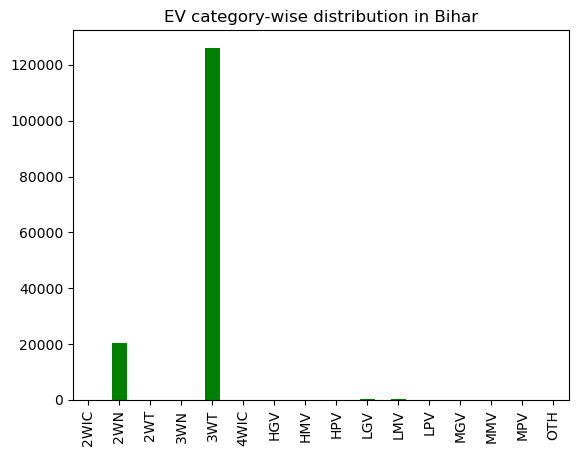

In [63]:
plt.title("EV category-wise distribution in Bihar")
bihar_fuel.iloc[4].plot(kind="bar",color="green");

Like Assam, here also like Assan, 3WT is most popular among EV segment. In a population of 104099, there are only 436 LMV. There could be several reasons for people not owning the EV. First could be the income level, it features at lowest GDP per capita among all states. Here literacy rate is also lowest. People might not be aware about the benefits of butying EV, even if they have money. They might see no point in buying EV as electricity cost is also high. But in future, this may attract the EV segment, especially in cities, as govt. wants to increase EV buying as the road tax of EV vehicles are free and there are 83 public charging stations available. Like Assam here is also tax exemption for electric 2W and electric 4W. 

Let's take a look at the petrol and diesel category-wise distribution here.

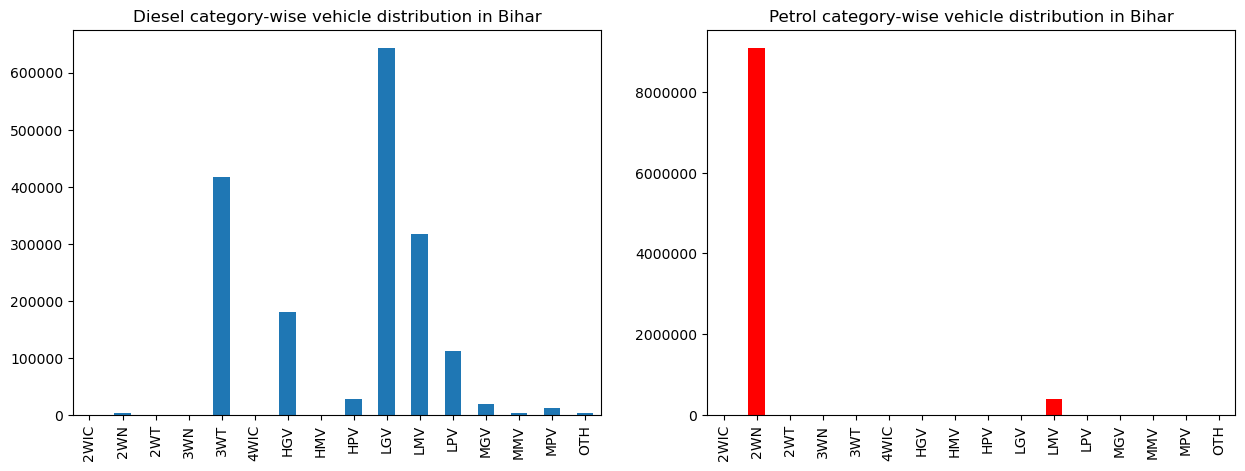

In [64]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Bihar")
bihar_fuel.iloc[1].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Bihar")
bihar_fuel.iloc[9].plot(kind="bar",color="red");

This state has highest number of 2WN, because of demogrpahic reasons discussed earlier. Potential market does exist in sector of 2 wheelers, as amount of it is very high, and some attractive offers may be given by EV makers to move them to EV side.

Let's take a look at the next state Chattisgarh.

In [65]:
chattisgarh_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\6) Chattisgarh\Fuel_wise.xlsx","Fuel Category")
chattisgarh_fuel.head()

2WIC    2WN  2WT  3WN    3WT  4WIC     HGV  HMV   HPV     LGV  \
Fuel Category                                                                  
CNG ONLY          0      1    0    0      0     0       6    0     0       1   
DIESEL            0   1064    0   56  50761     7  179087  357  6978  158636   
DIESEL/HYBRID     0      0    0    0      0     0       7    0     0       1   
ELECTRIC(BOV)     0  32348    0  131  14525     0       8    0     0    1082   
ETHANOL           0      0    0    0      0     0       1    0     0       0   

                  LMV    LPV   MGV  MMV   MPV    OTH  
Fuel Category                                         
CNG ONLY           18      1     0    0     0      0  
DIESEL         501127  34509  8983  830  3761  25669  
DIESEL/HYBRID     796      4     0    0     0      1  
ELECTRIC(BOV)     949     58     1    0     1    374  
ETHANOL             0      0     0    0     0      0

Let's plot a EV category-wise distribution of it.

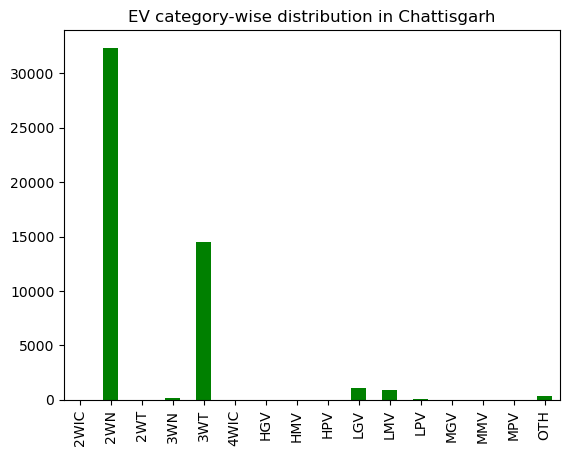

In [66]:
plt.title("EV category-wise distribution in Chattisgarh")
chattisgarh_fuel.iloc[3].plot(kind="bar",color="green");

Here again EV dominates in 2 wheeler segment and it is also used in commercial transportation in 3 wheeler segment. EVs are alos used in goods transportation here. Reason of high 2-wheelers again could be given to low GDP, lower literacy rate. Also people here in general has less deposit in bank as compared to other states. Number of available public charging station is also low. Plus here the road tax is charged. All these things hinder the rise of EV market here. 

Let's take a look at the petrol and diesel category-wise distribution here.

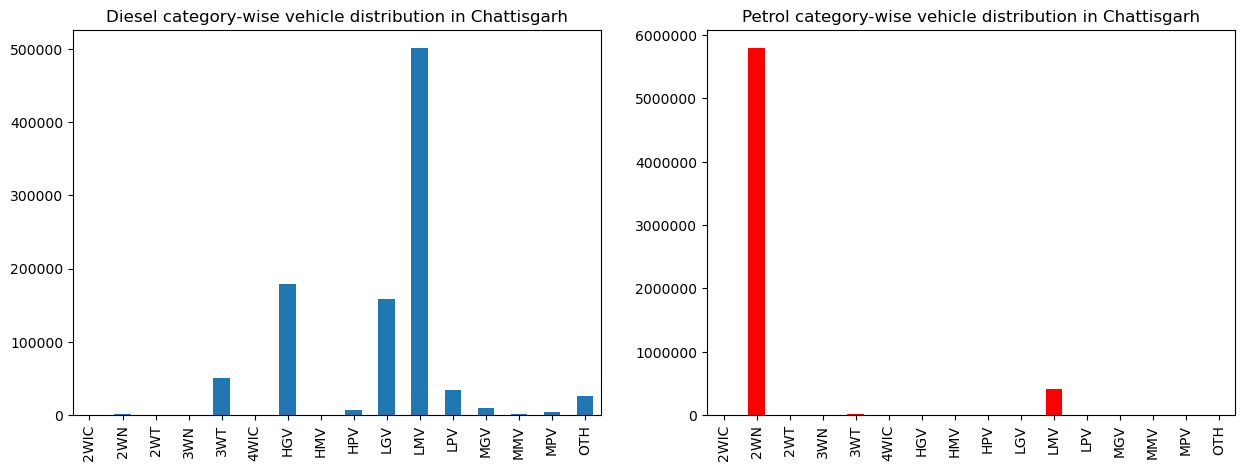

In [67]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Chattisgarh")
chattisgarh_fuel.iloc[1].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Chattisgarh")
chattisgarh_fuel.iloc[9].plot(kind="bar",color="red");

So, from all three graph combined, here EV company should focus on 2WN sector.

Let's take  a look on the next UT Chandigarh.

In [68]:
chandigarh_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\7) Chandigarh\Fuel_wise.xlsx","Fuel Category")

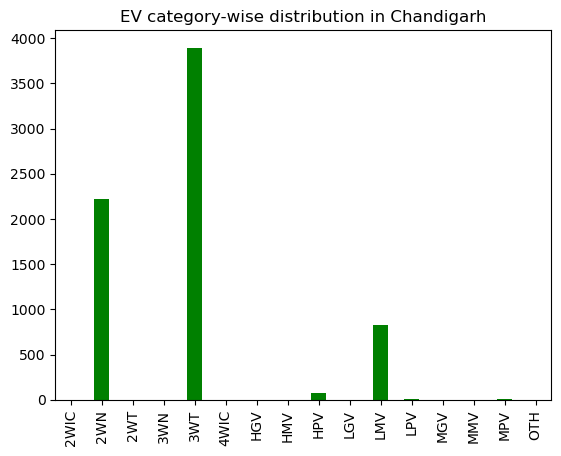

In [69]:
plt.title("EV category-wise distribution in Chandigarh")
chandigarh_fuel.iloc[3].plot(kind="bar",color="green");

Here, as a UT Chandigargh shows a huge potential to grow in EV market as gdp per capita is 3rd highest among whole India, people have high deposits in bank. Cost of electricity is cheaper. The govt has set the tax free for registartion of EVs. 

In [70]:
sort_charging_stations = df_state.sort_values(by="No. Of Available Charging Public Stations",ascending=False)

Now let's take a look at the diesel and petrol-wise vehicle distributions.. 

In [71]:
chandigarh_fuel

2WIC     2WN  2WT  3WN   3WT  4WIC   HGV  HMV   HPV    LGV  \
Fuel Category                                                                
CNG ONLY           0       0    0    0   179     0    33    0     0    318   
DIESEL             0      43    0    0  4279    47  1800   57  1580  10760   
DIESEL/HYBRID      0       0    0    0     0     0     0    0     0      0   
ELECTRIC(BOV)      0    2220    0    0  3892     0     0    0    73      0   
LPG ONLY           0       0    0    0  4490     0     0    0     0     17   
NOT APPLICABLE     0       7    0    0     0     0     0    0     0      0   
PETROL            20  417558   55    0    12   108     0    0     0    205   
PETROL/CNG         0       0    0    0   360     8     0    0     0     40   
PETROL/ETHANOL     0      14    0    0     0     0     0    0     0      0   
PETROL/HYBRID      0       0    0    0     0     4     0    0     0      0   
PETROL/LPG         0       0    0    0  1237     0     0    0     0     69   

                   LMV   LPV  MGV  MMV   MPV  OTH  
Fuel Category                                      
CNG ONLY            18    16   25    0     3    0  
DIESEL          156329  2275  955  120  1254  845  
DIESEL/HYBRID      606     3    0    0     0    0  
ELECTRIC(BOV)      825     6    0    0     7    1  
LPG ONLY            14     0    0    0     0    0  
NOT APPLICABLE      25     0    0    0     0    0  
PETROL          214238   198    0    0     0    4  
PETROL/CNG        3914   502    0    0     0    0  
PETROL/ETHANOL       0     0    0    0     0    0  
PETROL/HYBRID     5180    10    0    0     0    0  
PETROL/LPG        1828     1    0    0     0    0

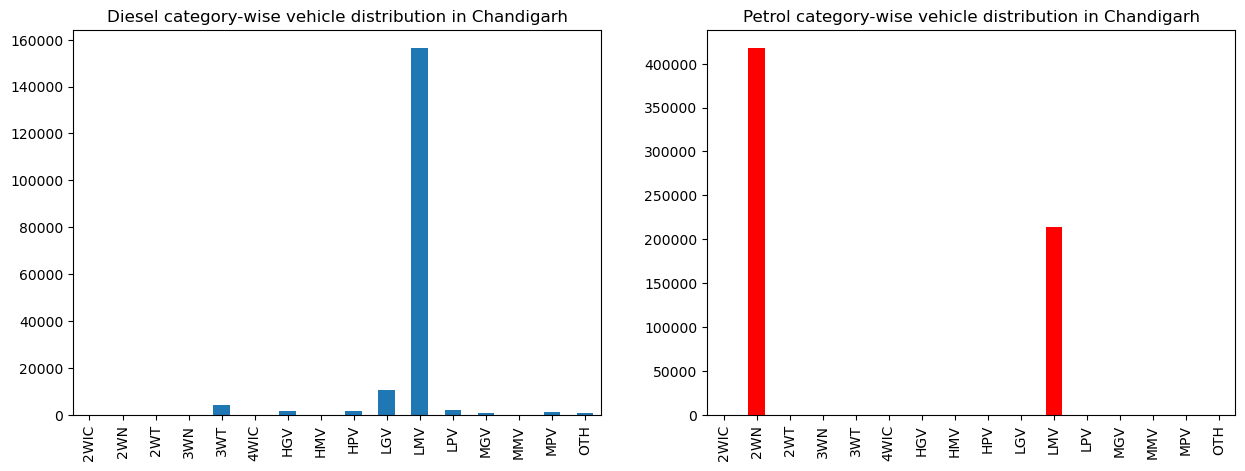

In [72]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Chandigarh")
chandigarh_fuel.iloc[1].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Chandigarh")
chandigarh_fuel.iloc[6].plot(kind="bar",color="red");

Here in the LMV segment petrol and diesel has almost equal segment. Here enterant company can enter in three segments of 2WN, 3WN and LMV. And as discussed earlier, the demogrpahic conditions are favourable here for an EV company to enter, but company might need to invest in existing infrastructure like public charging station, which at present is very low.

Let's take a look at the next UT Dadar & Nagar Havelii.

In [73]:
ddn_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\8) DD_DNH\Fuel_wise.xlsx","Fuel Category")
ddn_fuel.head()

2WIC  2WN  2WT  3WN   3WT  4WIC    HGV  HMV  HPV    LGV  \
Fuel Category                                                              
CNG ONLY            0    0    0    9    96     0    363    0    4    197   
DIESEL              0  154    0   14  2011     0  19248   57  683  10347   
DIESEL/HYBRID       0    0    0    0     0     0      0    0    0      0   
DUAL DIESEL/CNG     0    0    0    0     0     0      2    0    0      0   
ELECTRIC(BOV)       0  189    0    0    65     0      2    0   24      4   

                   LMV   LPV   MGV  MMV  MPV  OTH  
Fuel Category                                      
CNG ONLY             9     2    60    0    4    1  
DIESEL           39459  1716  5113  260  457  650  
DIESEL/HYBRID      333     3     0    0    0    0  
DUAL DIESEL/CNG      0     0     0    0    0    0  
ELECTRIC(BOV)       43     2     0    0    0    4

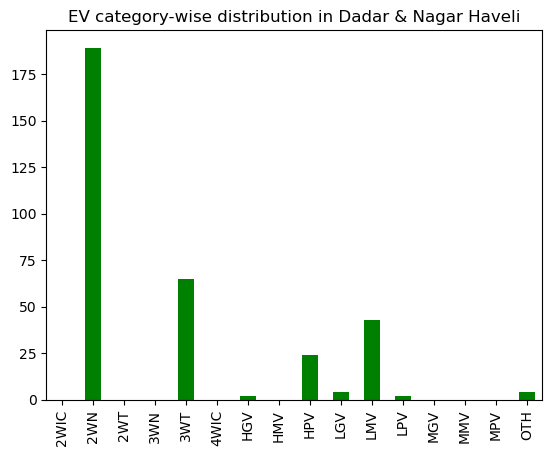

In [74]:
plt.title("EV category-wise distribution in Dadar & Nagar Haveli")
ddn_fuel.iloc[4].plot(kind="bar",color="green");

Here it looks like EV segment exist for many category of vehicles here. Since we don't have much demogrpahic data available here, we cannot comment on the reason of it.

Let's take a look at the diesel and petrol distribution here.

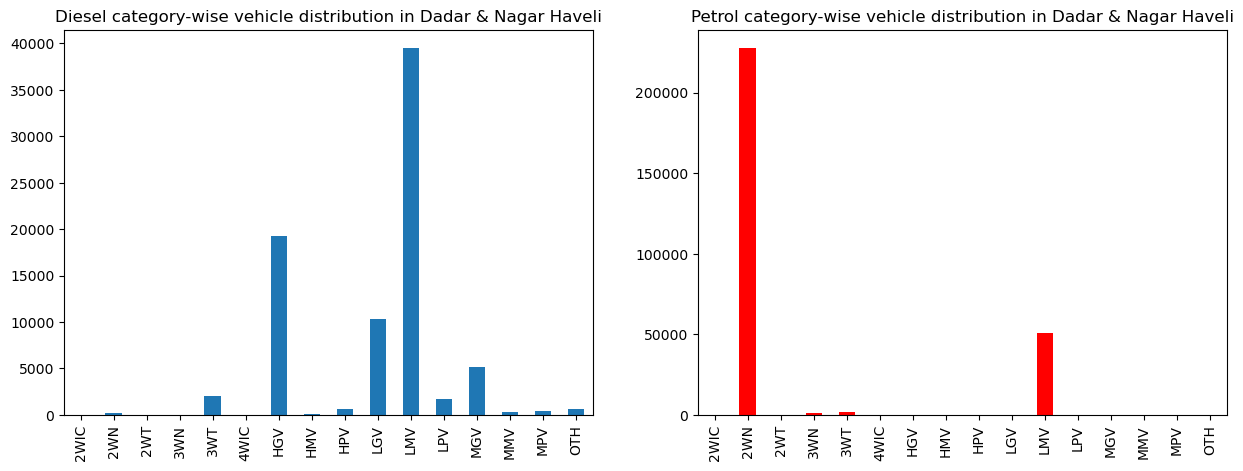

In [75]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Dadar & Nagar Haveli")
ddn_fuel.iloc[1].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Dadar & Nagar Haveli")
ddn_fuel.iloc[-5].plot(kind="bar",color="red");

So, an EV company entering here can target 2WN, 3WT, HPV and LMV.

Next UT is Delhi.

In [76]:
delhi_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\9) Delhi\Fuel_wise.xlsx","Fuel Wise")
delhi_fuel.head()

2WIC    2WN  2WT  3WN     3WT  4WIC    HGV  HMV    HPV     LGV  \
Fuel Wise                                                                       
CNG ONLY          0      2    0    4   97737     0   3999    0  25267  152349   
DIESEL            0    234    0    0     529    64  46454    7  22868  110363   
DIESEL/HYBRID     0      0    0    0       0     2      0    0      0       0   
ELECTRIC(BOV)     2  65227    0    0  143391     4      0    0    572     190   
LPG ONLY          0      0    0    0       0     0      0    0      1    3530   

                  LMV    LPV    MGV  MMV  MPV   OTH  
Fuel Wise                                            
CNG ONLY         5389  31412  12901    0  199     0  
DIESEL         679396  73127   8218   83  303  1506  
DIESEL/HYBRID   17070    260      0    0    0     0  
ELECTRIC(BOV)    8511   5296      0    0    2     0  
LPG ONLY         1131     23      0    0    0     0

Let's plot  EV category-wise distribution of it.

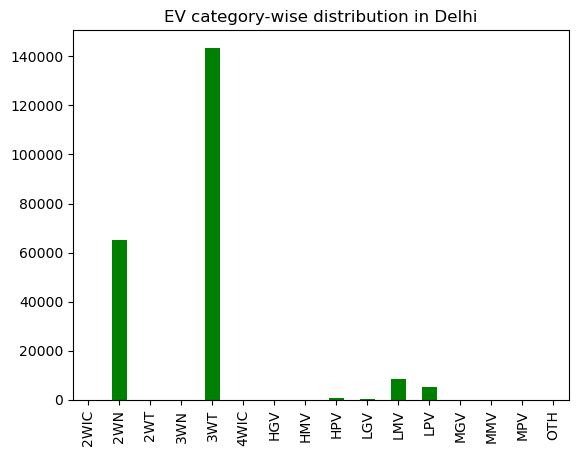

In [77]:
plt.title("EV category-wise distribution in Delhi")
delhi_fuel.iloc[3].plot(kind="bar",color="green");

Here clearly Delhi proposes a good market segment for electric vehicle as no. of electric vehicles are already high. It also has highest number of charging stations in whole country. Demographic is also favourable in the EV market segment here. It has second highest gdp per capita in whole India. People have high deposits in bank as compared to many other states. And govt. of here also offers Rs.30,000 tax exemption on electric 2W and Rs.1,50,000 on electric 4W. Plus 100 percent exemption on tax road is there. So, any company that wants to strat the business in EV segment, can start its operation from Delhi. 

Let's take a look at the diesel and petrol distribution here.

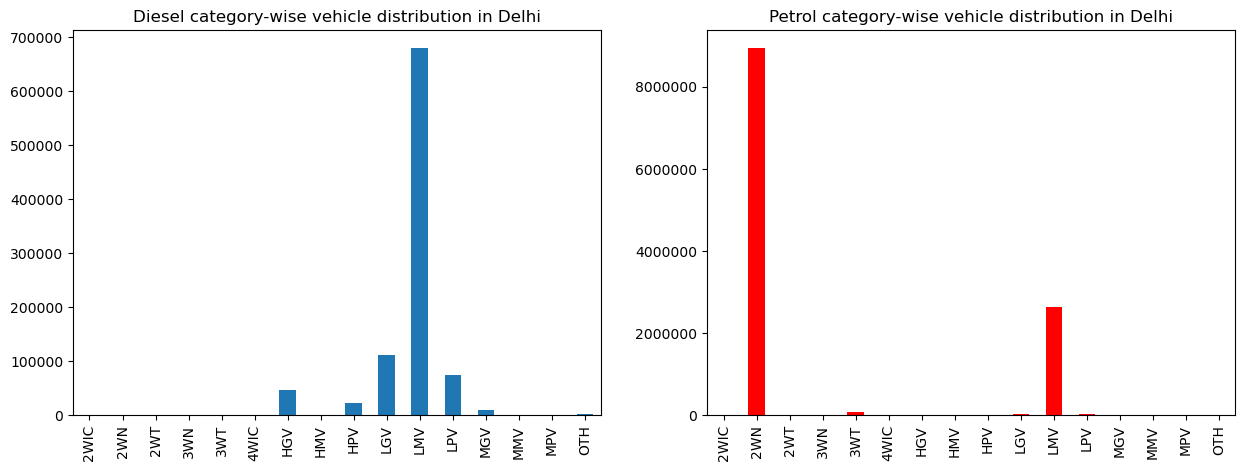

In [78]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Delhi")
delhi_fuel.iloc[1].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Delhi")
delhi_fuel.iloc[6].plot(kind="bar",color="red");

Delhi is one of the most attractive place for any enterant company, on the factors that we discussed earlier. 

Let's take a look at the next state Goa.

In [79]:
goa_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\10) Goa\Fuel_wise.xlsx","Fuel Category")
goa_fuel.head()

2WIC   2WN  2WT  3WN  3WT  4WIC    HGV  HMV   HPV    LGV  \
Fuel Category                                                             
CNG ONLY          0    49    0    0   26     0      8    0     2    415   
DIESEL            0    86   12    0  632     5  18054  214  1048  28389   
DIESEL/HYBRID     0     0    0    0    0     0      0    0     0      0   
ELECTRIC(BOV)     0  9807    1    6   77     0      1    0    79     32   
LPG ONLY          0     0    0    0    1     0      0    0     0      0   

                 LMV    LPV   MGV  MMV   MPV   OTH  
Fuel Category                                       
CNG ONLY          20      0    16    0     0     0  
DIESEL         57372  12435  4301  597  1135  1067  
DIESEL/HYBRID    637     86     0    0     0     0  
ELECTRIC(BOV)   1274      4     0    0     1     2  
LPG ONLY           6      0     0    0     0     0

Let's plot EV category-wise distribution of it.


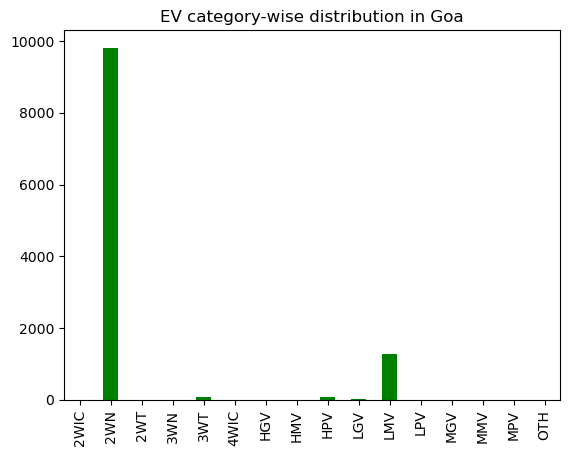

In [80]:
plt.title("EV category-wise distribution in Goa")
goa_fuel.iloc[3].plot(kind="bar",color="green");

Goa also offers an attractive market segment for EV. Though there is no tax exemption on EVs, this state has highest GDP per capita in whole India and also has high literacy rate. It also has 44 installed public charging stations. These factors could later turn it for an attractive EV market.

Let's take a look at the diesel and petrol distribution here.

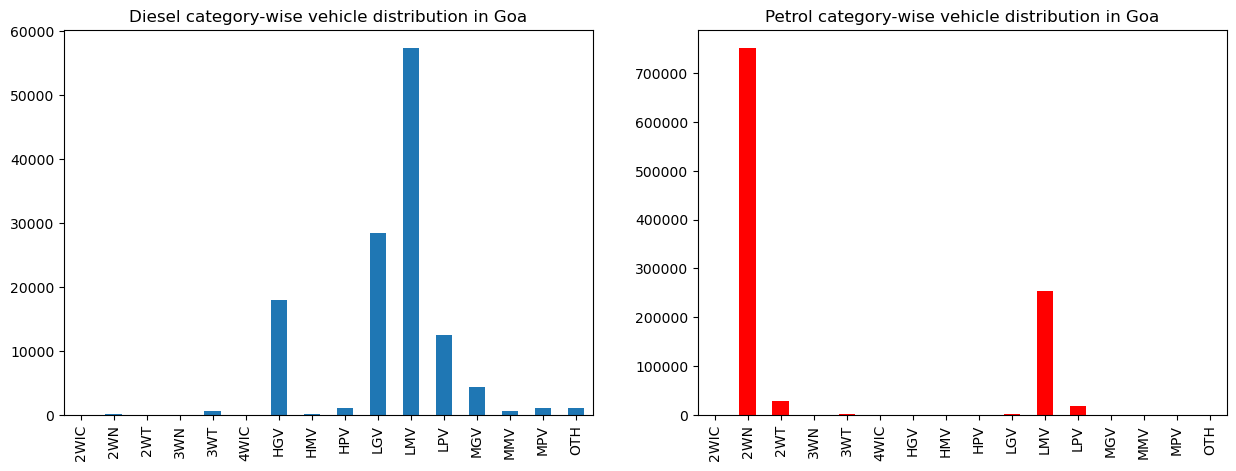

In [81]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Goa")
goa_fuel.iloc[1].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Goa")
goa_fuel.iloc[6].plot(kind="bar",color="red");

So, from all three graphs, most attractive segment looks like 2WN.

Next state is Gujarat.

In [82]:
gujarat_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\11) Gujarat\Fuel_wise.xlsx","Fuel Category")
gujarat_fuel.head()

2WIC   2WN  2WT  3WN     3WT  4WIC     HGV   HMV    HPV  \
Fuel Category                                                                  
CNG ONLY                0     2    0   40   84692     2    2293     0    783   
DIESEL                 12  9832    3  152  344254   844  363133  8667  26303   
DIESEL/HYBRID           0     1    0    0       2    11       5     0      0   
DUAL DIESEL/BIO CNG     0     1    0    0       0     0       0     0      0   
DUAL DIESEL/CNG         0     0    0    0       0     0       2     0      0   

                        LGV      LMV    LPV    MGV    MMV    MPV    OTH  
Fuel Category                                                            
CNG ONLY              27566     1950    219   1965      3   1182     42  
DIESEL               482062  1956538  69791  60359  11625  12693  51793  
DIESEL/HYBRID             7    20485    224      0      1      0      4  
DUAL DIESEL/BIO CNG       0        0      0      0      0      0      0  
DUAL DIESEL/CNG           1        0      0      0      0      0      3

Let's plot EV category-wise distribution of it.

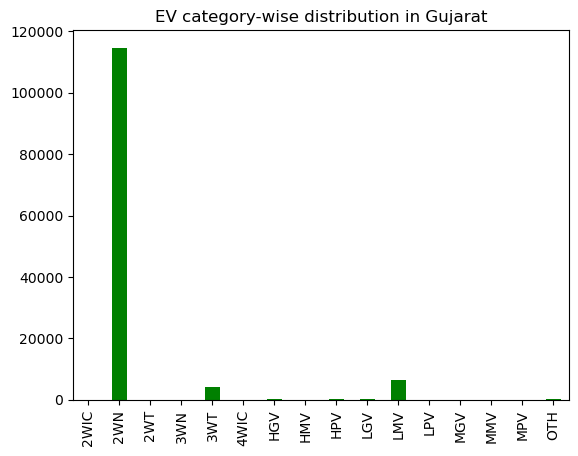

In [83]:
plt.title("EV category-wise distribution in Gujarat")
gujarat_fuel.iloc[5].plot(kind="bar",color="green");

Gujarat is very much suitable for electric vehicle market. Here 2 WN is highest against all the states & UT till we have seen, crossing more than 1,00,000. LMV is also reaching till 10000. And given the demographic condition with high deposit amount in bank, high gdp per capita, low cost of electricity ,100 percent road tax exemption, defineitely present an opportunity here.  

Let's take a look at the diesel and petrol distribution here.

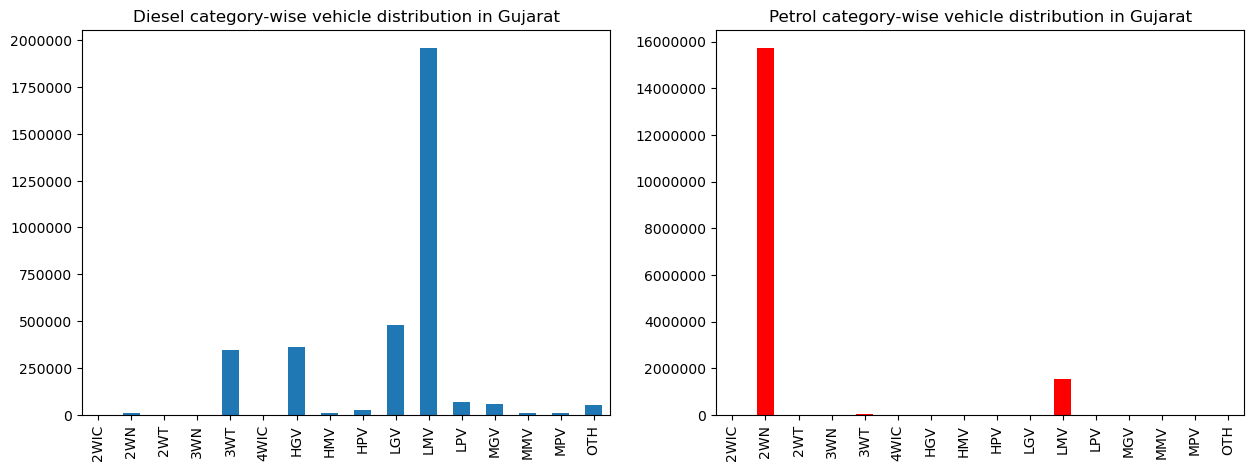

In [84]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Gujarat")
gujarat_fuel.iloc[1].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Gujarat")
gujarat_fuel.iloc[-6].plot(kind="bar",color="red");

An EV company enetring here can focus on 2WN, followed by LMV. 

Let's now focus on Haryana.

In [85]:
haryana_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\12) Haryana\Fuel_wise.xlsx","Fuel Category")
haryana_fuel.head()

2WIC    2WN  2WT  3WN     3WT  4WIC     HGV   HMV    HPV  \
Fuel Category                                                               
CNG ONLY            0      7    0    0   43977     0   15173     4   3418   
DIESEL              4   2169    0  164  126480    80  328860  3652  29802   
DIESEL/HYBRID       0      2    0    0       0     0       0     1      0   
DUAL DIESEL/CNG     0      0    0    0       0     0       1     0      0   
ELECTRIC(BOV)       0  22860   53    0   39010     1       8     0      6   

                    LGV      LMV    LPV    MGV    MMV    MPV    OTH  
Fuel Category                                                        
CNG ONLY          27383      384   1802  13843     11   3069      9  
DIESEL           208804  1545185  54035  35893  13686  14362  76766  
DIESEL/HYBRID         1     7616    289      0      0      0     19  
DUAL DIESEL/CNG       0        2      0      0      1      0      6  
ELECTRIC(BOV)       133     1638    934      0      1      2     12

Let's plot EV category-wise distribution of it.

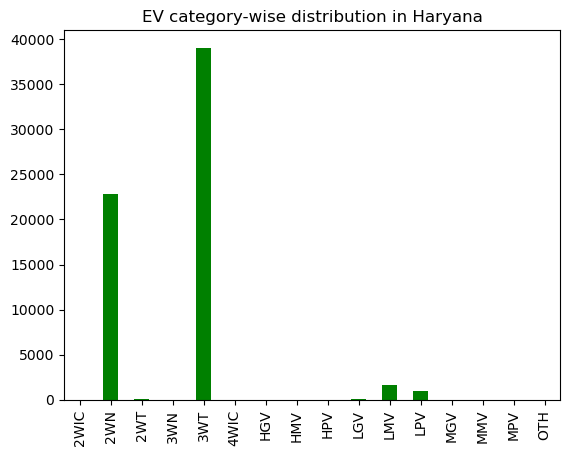

In [86]:
plt.title("EV category-wise distribution in Haryana")
haryana_fuel.iloc[4].plot(kind="bar",color="green");

In [87]:
sort_charging_stations[sort_charging_stations["States"]=="Haryana"]

States  Population in thousand  Unemployment Rural Male  \
8  Haryana                 25351.0                       59   

   Unemployment Rural Female  Unemployment Urban Male  \
8                         32                       78   

   Unemployment Urban Female  Literacy Rate (in percent)  Number of Employees  \
8                         95                       75.55             211432.0   

   Gross Domestic Product   Per Capita Net State Domestic Product   \
8               18252215.0                                 67405.0   

   Deposit in Scheduled Commercial Banks in Crores  Length of Road in KMs  \
8                                         129400.0                41729.0   

   Availability Of Power in Net Core Units  \
8                                   3554.0   

   Installed Capacity Of Renewable Power Grid im MegaWatt  \
8                                              123.0        

   No. Of Available Charging Public Stations  Tax Exemption for Electric 2W  \
8                                      232.0                              0   

   Tax Exemption For Electric 4W  \
8                              0   

   Road Taxes Of Private Vehicle Petrol  Above 10 Lacs in percent  \
8                                                8.0                

   Road Taxes Of Private Vehicle Diesel  Above 10 Lacs in percent  \
8                                                8.0                

   Electric Vehicles Registered Cost Of Electricty Costlier or Not  \
8                       26780.0                                 No   

  100 Exemption on Road Tax Exemption On Electric Vehicle  
8                                                 No

As, we can see that in Haryana most of the EV segment is dominated by three-transport wheeler followed by two wheeler. The amount of LMV and LPV vehciles are very low, total to approximately at 2500. This is due to several resons like first of all the road tax is not completely exempted for electric vahicles and there is no subsidy or exemption by the govt. for electric vehicles neither in 2 wheeler segment nor in 4 wheeler segment, and taxes on petrol and diesel vehicles are very low, only at 8% for car costing little higher above 10 lacs for both diesel and petrol which is very low, considering the taxes in other states of India. This is all contributing to low sales of EV, especially in 4 wheeler segment.

Now let's take a look at the petrol and diesel segment vehicles in Haryana.

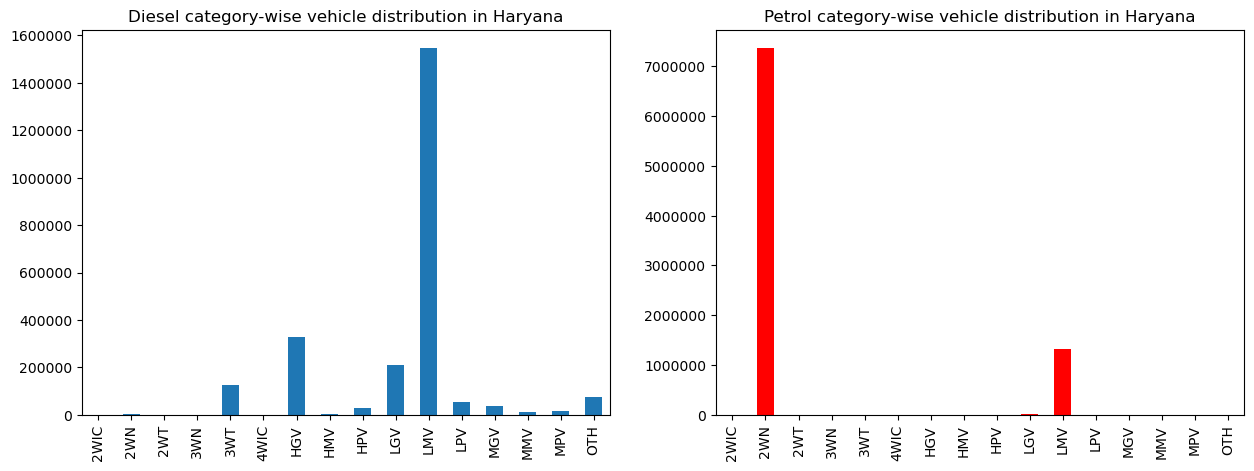

In [88]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Haryana")
haryana_fuel.loc["DIESEL"].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Haryana")
haryana_fuel.loc["PETROL"].plot(kind="bar",color="red");

So, as we expected here vehicles in 4-wheeler segment is dominated by Petrol and Diesel because of road tax reasons. But since in state of Haryana, there are already the 232 public stations available, and given the number of 2-wheelers rise in Electric Vehicles, company coming here could focus on 2-wheelers.

Now let's take a look at the Himachal Pradesh.

In [89]:
himachal_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\13) Himachal Pradesh\Fuel_wise.xlsx","Fuel Wise")
himachal_fuel.head()

2WIC   2WN  2WT  3WN   3WT  4WIC    HGV   HMV    HPV     LGV  \
Fuel Wise                                                                       
CNG ONLY            0     5    0    0     8     0     98     0      0      79   
DIESEL              6   559    0    5  5740     9  74390  1438  10337  132513   
DIESEL/HYBRID       0     0    0    0     0     0      0     0      0       0   
DUAL DIESEL/CNG     0     0    0    0     0     0      0     0      0       0   
ELECTRIC(BOV)       0  1747    0    2   197     0      6     0     93      10   

                    LMV    LPV    MGV   MMV   MPV   OTH  
Fuel Wise                                                
CNG ONLY              8     10     23     0     1     0  
DIESEL           140223  35187  13900  2344  3253  4850  
DIESEL/HYBRID       910     15      0     1     0     1  
DUAL DIESEL/CNG       0      0      1     0     0     0  
ELECTRIC(BOV)       145     57      1     0     2     1

Let's plot EV category-wise distribution of it.


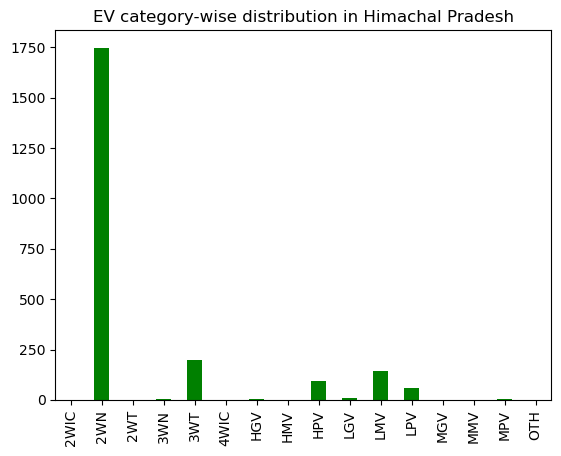

In [90]:
plt.title("EV category-wise distribution in Himachal Pradesh")
himachal_fuel.iloc[4].plot(kind="bar",color="green");

Himchal Pradesh currently lacks in Electric Vehicle segment as data available with us. Currently here electric vehicles registered are very low as compared to the other states. Population of the state is also very low. Additionally, this state has lowest road on Petrol and Diesel vehicles for only around 3%, that encourages people to buy more of traditionl petrol and diesel vehicles as compared to electric. As electric registered vehicles are low, so is the number of public available charging stations in the state.  

Now let's take a look at the petrol and diesel segment vehicles in Himachal Pradesh.

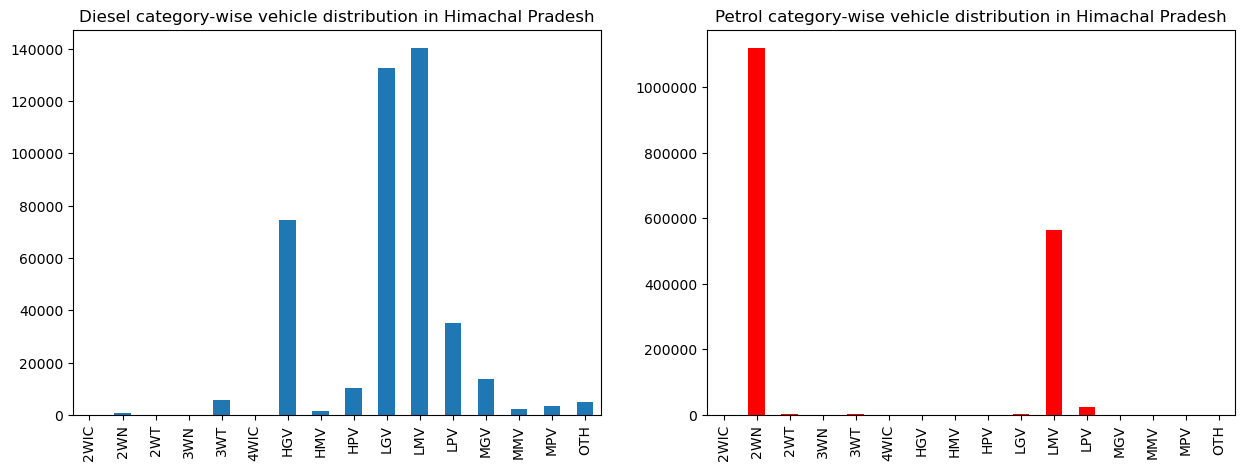

In [91]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Himachal Pradesh")
himachal_fuel.loc["DIESEL"].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Himachal Pradesh")
himachal_fuel.loc["PETROL"].plot(kind="bar",color="red");

So, given the data any company enter to looking here should be ready to invest in infrastructure first, and then should target 2 WN segment. Though given the condition that electricity is very cheap here as compared to other states, this might be crucila factor for upcoming EV segment, as according to data, 80% of people still prefer overnight charging EV vehicles, and given the cheap cost of electricity this could people see long term returns on their money as compared to buying Petrol and Diesel vehicle.

Now the next region is Jammu & Kashmir.

In [92]:
jk_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\14) Jammu and Kashmir\Fuel_wise.xlsx","Fuel Wise")
jk_fuel.head()

2WIC   2WN  2WT  3WN    3WT  4WIC    HGV  HMV   HPV  \
Fuel Wise                                                                 
CNG ONLY               0     0    0    0      1     0      2    0     0   
DIESEL                 0   678    0   29  36009     0  49046  594  5684   
DIESEL/HYBRID          0     0    0    0      0     0      3    0     0   
ELECTRIC(BOV)          0  4411    0    0   4587     0      2    0    40   
FUEL CELL HYDROGEN     0     1    0    0      0     0      0    0     0   

                      LGV     LMV    LPV   MGV  MMV   MPV    OTH  
Fuel Wise                                                         
CNG ONLY                3      10      0     0    0     1      0  
DIESEL              71098  118790  48084  4484  136  5624  17849  
DIESEL/HYBRID           1    1205     18     0    0     1      0  
ELECTRIC(BOV)           4     109      9     0    0     2      1  
FUEL CELL HYDROGEN      0       0      0     0    0     0      0

Let's plot EV category-wise distribution of it.

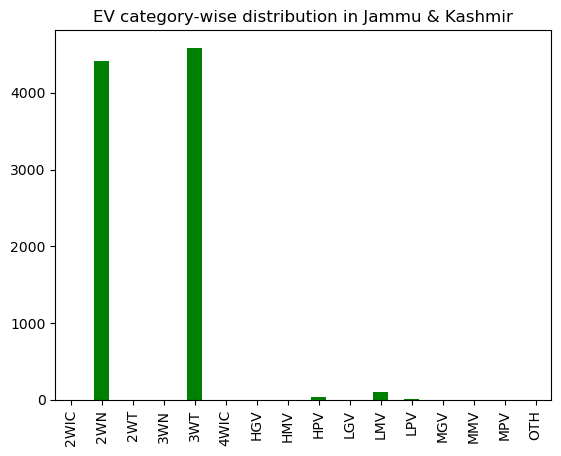

In [93]:
plt.title("EV category-wise distribution in Jammu & Kashmir")
jk_fuel.iloc[3].plot(kind="bar",color="green");

Even being the hilly state, this state has high number of EVs in 2WN and 3WT, which is high as comapred to other hilly state like Himachal Pradesh, which we saw earlier, even though it has less available number of public charging stations (24 as compared to 27 of HP).But demogrpahic factors like high unemployment among urbal female and low literacy rate might hinder the growth of EV segment here, with no tax subsidy on EV vehicles.  

Now let's take a look at the petrol and diesel segment vehicles in Jammu & Kashmir.

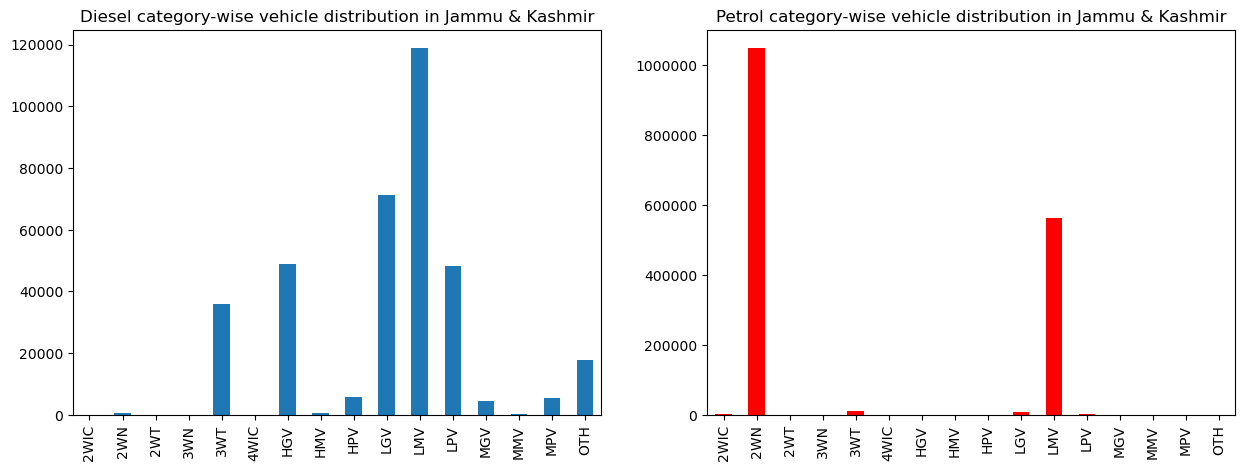

In [94]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Jammu & Kashmir")
jk_fuel.loc["DIESEL"].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Jammu & Kashmir")
jk_fuel.loc["PETROL"].plot(kind="bar",color="red");

So, given the data comapny entering here should focus on the 2 wheeler non-transport and 3-wheeler transport. As electricity cost is cheaper here, like the case of Himachal Pradesh, this could give the rise EV segment here.

Next state is Jharkhand.

In [95]:
jharkhand_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\15) Jharkhand\Fuel_wise.xlsx","Fuel Wise")
jharkhand_fuel.head()

2WIC    2WN  2WT  3WN     3WT  4WIC     HGV  HMV   HPV  \
Fuel Wise                                                                 
CNG ONLY            0      3    0    0    7621     0      24    0     5   
DIESEL              0   1780    0   58  202915     2  147814  516  5175   
DIESEL/HYBRID       0      0    0    0       0     0       0    0     0   
DUAL DIESEL/CNG     0      0    0    0       0     0       3    0     0   
ELECTRIC(BOV)       0  13149    0    0   19545     0      56    0     2   

                    LGV     LMV    LPV    MGV  MMV   MPV   OTH  
Fuel Wise                                                       
CNG ONLY            469      10      2     13    0    29     0  
DIESEL           307991  253025  73193  14910  449  3880  5155  
DIESEL/HYBRID         0    3634     79      0    0     0     0  
DUAL DIESEL/CNG       0       0      0      0    0     0     0  
ELECTRIC(BOV)        70     401    165      2    0     1     0

Let's plot EV category-wise distribution of it.

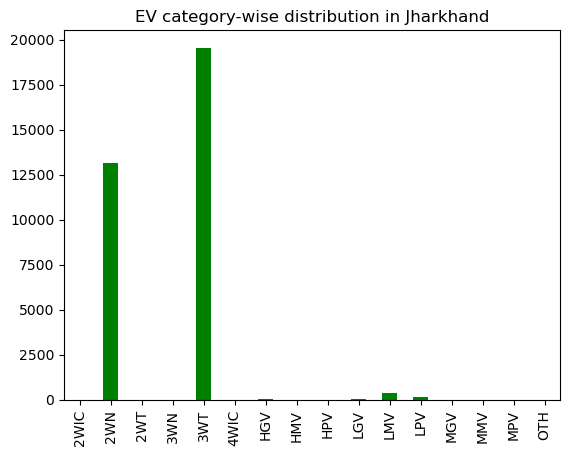

In [96]:
plt.title("EV category-wise distribution in Jharkhand")
jharkhand_fuel.iloc[4].plot(kind="bar",color="green");

So, from the above EVs are used mostly for the puvlic transportation in three-wheelers. Given there is no-subsidiy available, low deposit in bank, low per cpita domestic product, all contribute to lower number of electric vehicle in this state. Electric LMV is very low, only 401 with population of 32988000.   

Now let's take a look at the petrol and diesel segment vehicles in Jharkhand.

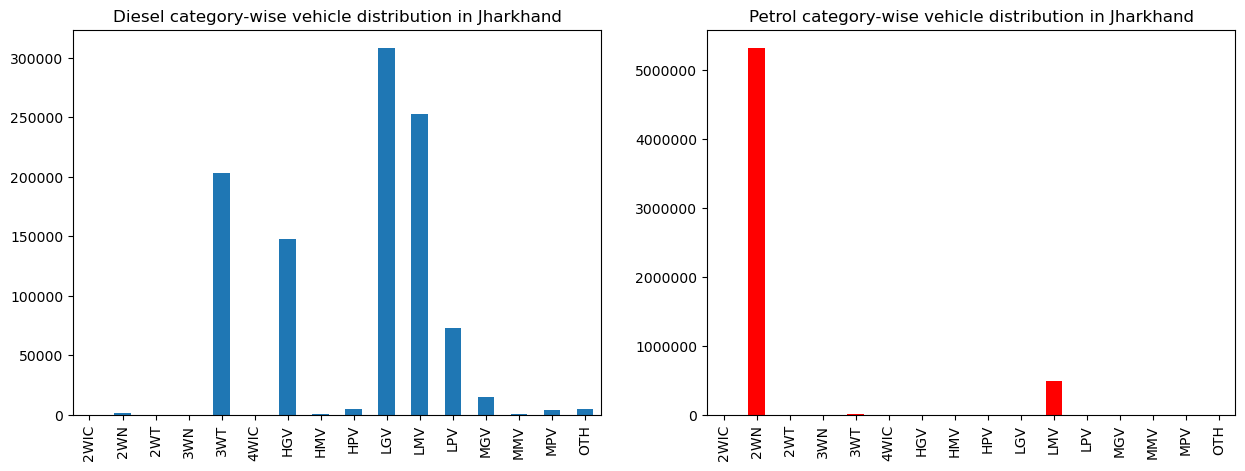

In [97]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Jharkhand")
jharkhand_fuel.loc["DIESEL"].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Jharkhand")
jharkhand_fuel.loc["PETROL"].plot(kind="bar",color="red");

So, a company here entring in EV segment should focus on 3WT, followed by the 2WN. Currently there are a large number of 2WN in petrol segment. So, company has to offer some lucrative offers to attract people who are going buy 2WN in upcoing future. 

Next state is Karnatka.

In [98]:
karnatka_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\16) Karnataka\Fuel_wise.xlsx","Fuel Wise")
karnatka_fuel.head()

2WIC    2WN  2WT   3WN     3WT  4WIC     HGV   HMV    HPV  \
Fuel Wise                                                                    
CNG ONLY            0      4    0    65   30247     1     520     0      3   
DIESEL              0  27490    7  2165  335077   159  455295  3718  95642   
DIESEL/HYBRID       0      0    0     0       3     2       3     0      1   
DUAL DIESEL/CNG     0      0    0     0       0     0       0     0      0   
DUAL DIESEL/LNG     0      0    0     0       0     0       1     0      0   

                    LGV      LMV     LPV    MGV   MMV    MPV    OTH  
Fuel Wise                                                            
CNG ONLY           3408      116     583    986     0    260      5  
DIESEL           736205  2159119  421243  99285  8523  21503  38434  
DIESEL/HYBRID         3     4705     216      0     1      1      1  
DUAL DIESEL/CNG       2        0       0      0     0      0      0  
DUAL DIESEL/LNG       0        0       0      0     0      0      0

Let's plot EV category-wise distribution of it.

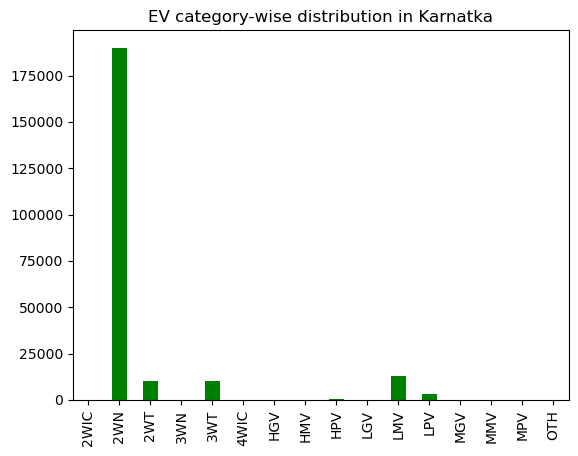

In [99]:
plt.title("EV category-wise distribution in Karnatka")
karnatka_fuel.iloc[5].plot(kind="bar",color="green");

This is the highest number of electric vehicles especially in 2WN segment that we have seen yet, touching to 2 lacs approx. This is supposed to be given the number of major electric 2 wheeler headquaters like Ather Energy, Mahindra Electric, Ola Electric etc. are located in the capital city of Karnatka. The capital city of this state is also a number of start-ups for 2WT provider like Bounce etc. This is the reason we see higher number of 2WT as compared to other states. Number of EV LMV is also higher, reaching to 12937 in number. These large numbers are also supported by demographic data like low unemployment among people in both rural and urban area, with high deposit in commercial banks, high per capita GDP, and high number of available public charging stations only second to Delhi in whole country.    

Now let's take a look at the petrol and diesel segment vehicles in Karnatka.

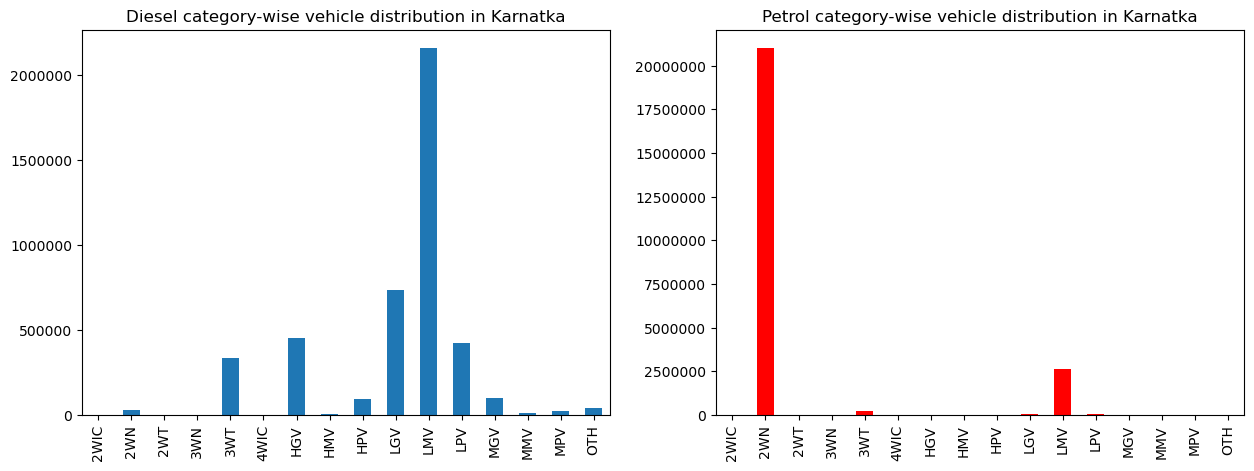

In [100]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Karnatka")
karnatka_fuel.loc["DIESEL"].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Karnatka")
karnatka_fuel.loc["PETROL"].plot(kind="bar",color="red");

So, for a company might be entering into EV segment, Karnatka could be ideal option for them, as road taxes on both petrol and diesel vehicles being 17%, highest in the whole country and 100% exemption on tax road of electric vehicle, present a huge growth opportunity in EV market. However, a new company might face a strong competition from existing EV manufacturers, as this state is already has a lot of players.

Next state is Kerala.

In [101]:
kerala_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\17) Kerala\Fuel_wise.xlsx","Fuel Wise")
kerala_fuel.head()

2WIC    2WN  2WT    3WN     3WT  4WIC    HGV   HMV    HPV  \
Fuel Wise                                                                    
CNG ONLY            0     54    0    212   17040     0     52     0    170   
DIESEL             15  12955   61  76362  577324   217  98149  6361  49168   
DIESEL/HYBRID       0     42    0      0       7     0     34     4     16   
DUAL DIESEL/CNG     0      0    0      0       0     0      0     0      3   
ELECTRIC(BOV)      35  71555   48     83    5671     5      4     0     60   

                    LGV      LMV     LPV    MGV   MMV    MPV    OTH  
Fuel Wise                                                            
CNG ONLY           1214      148     197    155     0     15      0  
DIESEL           379759  1116821  198416  61843  7794  12421  17075  
DIESEL/HYBRID       117     9147     751     13    12      4     20  
DUAL DIESEL/CNG       0        0       0      0     0      1      0  
ELECTRIC(BOV)        59     9844     105      0     1      1      2

Let's plot EV category-wise distribution of it.

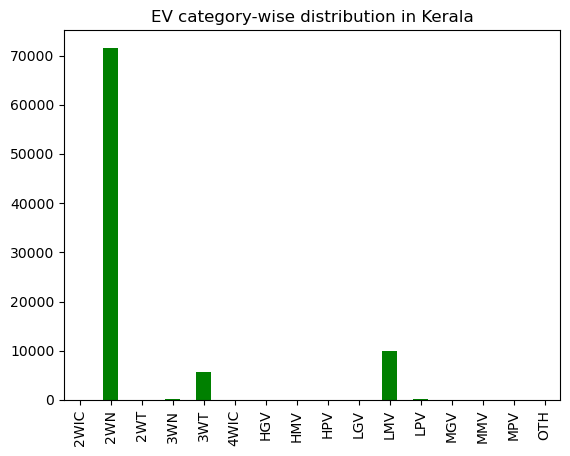

In [102]:
plt.title("EV category-wise distribution in Kerala")
kerala_fuel.iloc[4].plot(kind="bar",color="green");

The growth in EV segment here would be consiedered good becasue, given the fact that there is no 100% exemption on tax road for EV, no govt. subsidy for purchase of electric 2-wheeler or 4-wheeler, the number presented in the above graph is significant. With 94% literacy, highest in the country and high GDP per capita, this growth is expected to rise. Also, given the population of state, number of available charging stations are in good amount.     

Now let's take a look at the petrol and diesel segment vehicles in Kerala.

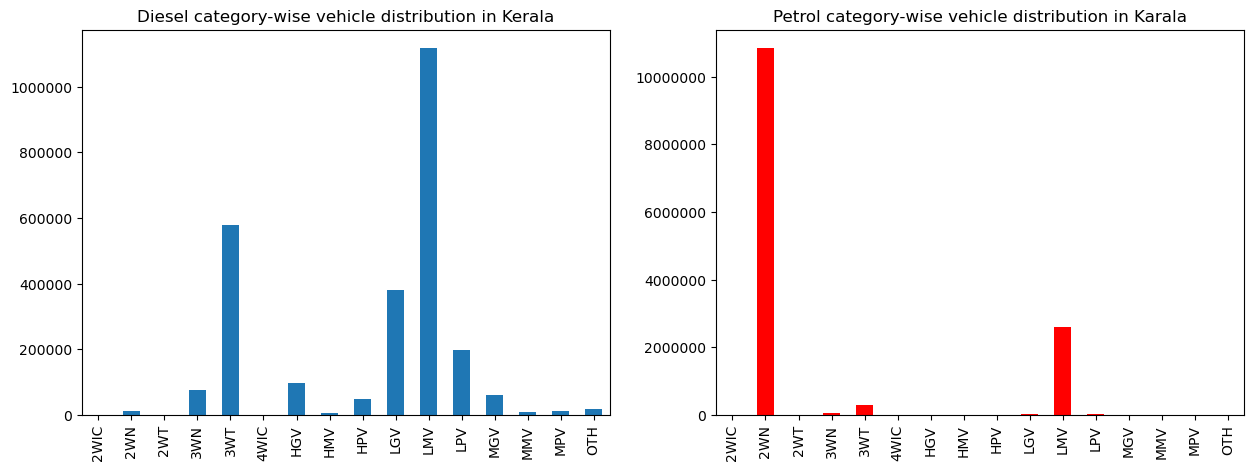

In [103]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Kerala")
kerala_fuel.loc["DIESEL"].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Karala")
kerala_fuel.loc["PETROL"].plot(kind="bar",color="red");

So, given the future potential as we discussed earlier, a new company might enter in 2WN, followed by LMV segment.

Next state is Madhya Pradesh.

In [104]:
mp_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\22) Madhya Pradesh\Fuel_wise.xlsx","Fuel Wise")
mp_fuel.head()

2WIC    2WN  2WT    3WN     3WT  4WIC     HGV   HMV    HPV  \
Fuel Wise                                                                     
CNG ONLY            0     51    0      0   11447     0     202     0    104   
DIESEL             46   6255    0     19  181794     0  217443  9910  16885   
DIESEL/HYBRID       0      0    0      0       0     0       0     0      0   
DUAL DIESEL/CNG     0      0    0      0       0     0       0     0      0   
ELECTRIC(BOV)       0  47007    0  24944    7603     0       4     0     29   

                    LGV      LMV     LPV    MGV    MMV    MPV    OTH  
Fuel Wise                                                             
CNG ONLY           1812      229    1732    175      1    342    804  
DIESEL           276229  1917561  212225  16608  24427  15305  45931  
DIESEL/HYBRID         0       52       2      0      0      0      0  
DUAL DIESEL/CNG       0        1       0      0      0      0      0  
ELECTRIC(BOV)         7     1377      52      0      0     40   5051

Let's plot EV category-wise distribution of it.

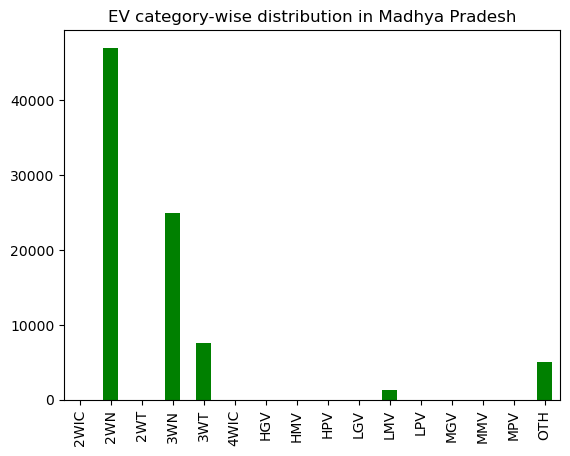

In [105]:
plt.title("EV category-wise distribution in Madhya Pradesh")
mp_fuel.iloc[4].plot(kind="bar",color="green");

Use of here 3WN is very high as compared to the other states. Number of registered electric vehciles is also very high, 4th in the whole country behind Delhi. Even road taxes on petrol and disel vehicles are not high as compared to other states, no fully tax exemption on road as well as no subsidy provided by govt, low literacy rate, cost of electricty being not cheaper; tells us that people here are aware about the benefits of EVs and a strong market does exist here.

Now let's take a look at the petrol and diesel segment vehicles in Madhya Pradesh.

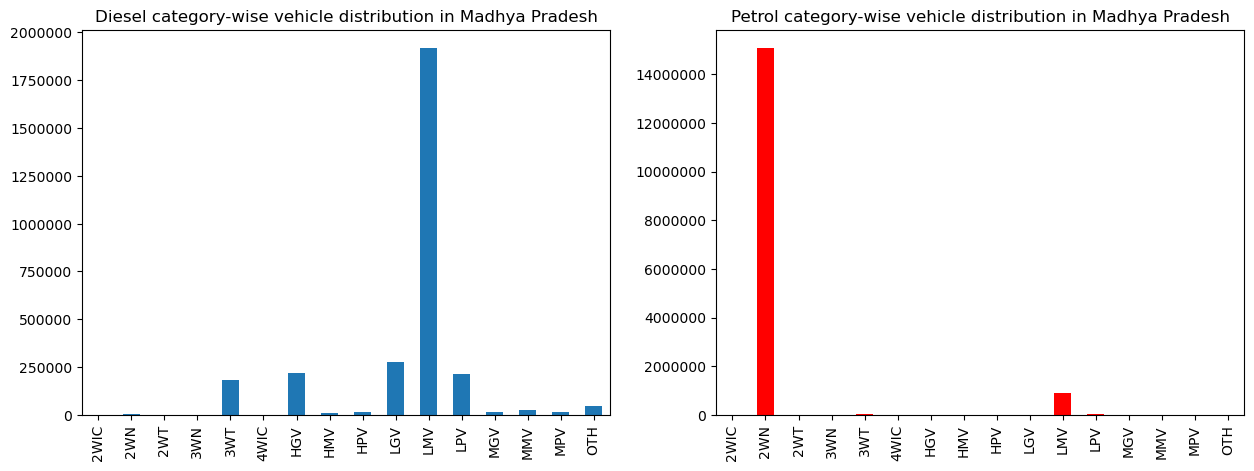

In [106]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Madhya Pradesh")
mp_fuel.loc["DIESEL"].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Madhya Pradesh")
mp_fuel.loc["PETROL"].plot(kind="bar",color="red");

So, any company enter here must focus on 3WN segment, as EVs share of 3WN here is very high as compared to other states and 2WN as well.

Next state is Maharastra.

In [107]:
maharastra_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\19) Maharashtra\Fuel_wise.xlsx","Fuel Wise")
maharastra_fuel.head()

2WIC   2WN  2WT    3WN     3WT  4WIC     HGV   HMV    HPV  \
Fuel Wise                                                                    
CNG ONLY            0     0    0     29   81544     0    3162     0   6063   
DIESEL              3  5532    0  23217  113844   470  494218  6921  42021   
DIESEL/HYBRID       0     0    0      0       3     8      17     5     26   
DI-METHYL ETHER     0     0    0      0       0     0       0     0      0   
DUAL DIESEL/CNG     0     0    0      0       0     0      10     0      2   

                    LGV      LMV     LPV    MGV   MMV    MPV     OTH  
Fuel Wise                                                             
CNG ONLY          36705     1154    2089   2442     5   1226      37  
DIESEL           854496  2762595  193249  86033  8135  22375  112982  
DIESEL/HYBRID        39    33756    1735      2     2      0      10  
DI-METHYL ETHER       0        1       0      0     0      0       0  
DUAL DIESEL/CNG       0        0       1      0     0      0       0

Let's plot EV category-wise distribution of it.

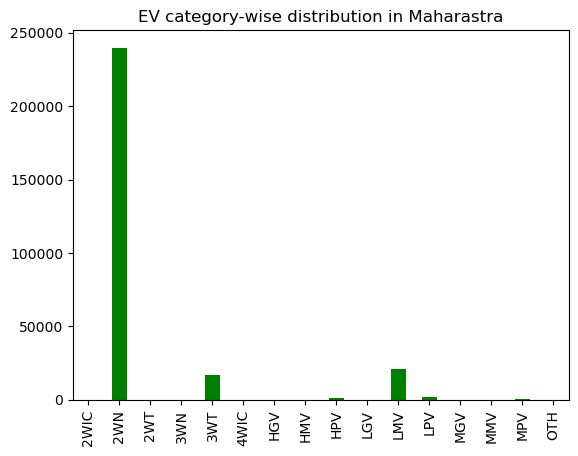

In [108]:
plt.title("EV category-wise distribution in Maharastra")
maharastra_fuel.iloc[6].plot(kind="bar",color="green");

Here we can see  that the state has high number of 2WN and also has high LMV vehciles as compared to the other states. Reason could be found in govt. policy. Here in the state govt. offers 25000 tax discount for 2-wheeler electric vehicles and 250000 tax discount on 4-wheeler electric vehicles. Plus the road taxes on petrol and diesel vehicle is very high and it is second highest in terms of diesel vehicle, only Tamilnadu has more tax. Whereas there is 100% road tax exemption for electric vehicles. Also, people here have high deposit in commercial banks and number of available public charging stations are also high.   

Now let's take a look at the petrol and diesel segment vehicles in Maharastra.

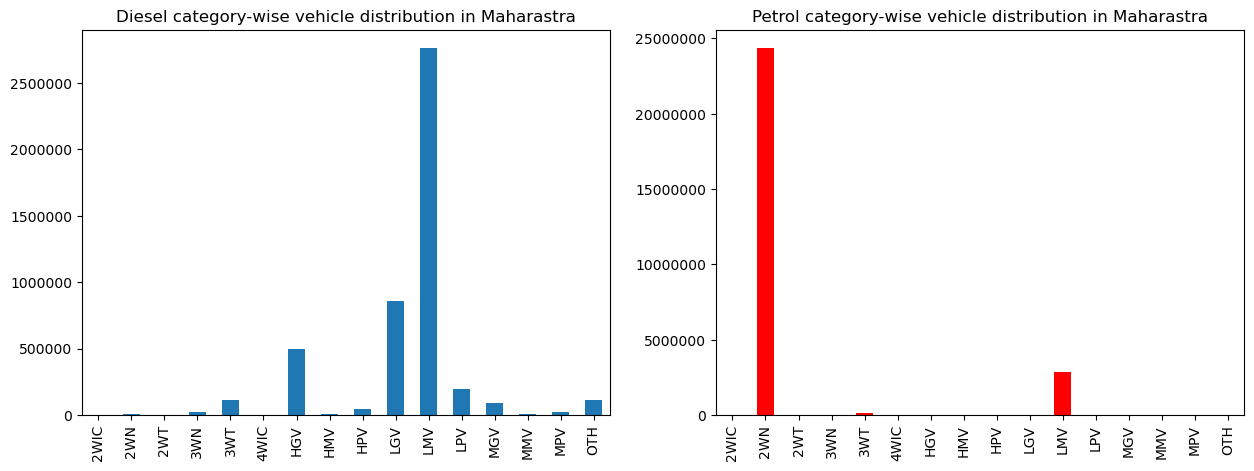

In [109]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Maharastra")
maharastra_fuel.loc["DIESEL"].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Maharastra")
maharastra_fuel.loc["PETROL"].plot(kind="bar",color="red");

So, company enetring here should focus on 2WN and LMV, given the friendly govt. policy for electric vehicle, number of sales expected to be cosidered to be rise.

Next state is Meghalaya.

In [110]:
meghalya_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\20) Meghalaya\Fuel_wise.xlsx","Fuel Wise")
meghalya_fuel.head()

2WIC  2WN  2WT  3WN   3WT  4WIC    HGV  HMV  HPV    LGV    LMV  \
Fuel Wise                                                                       
CNG ONLY          0    0    0    0     0     0      1    0    0      4      1   
DIESEL            0   51    0   22  7905     8  22822  177  460  30067  32358   
DIESEL/HYBRID     0    0    0    0     0     0      1    0    0      0    137   
ELECTRIC(BOV)     0   55    0   11     7     0      0    0    0      5     25   
LPG ONLY          0    0    0    0     0     0      0    0    0      0      2   

                LPV   MGV  MMV  MPV   OTH  
Fuel Wise                                  
CNG ONLY          1     0    0    0     0  
DIESEL         9995  7021  250  541  4556  
DIESEL/HYBRID    38     0    0    0     0  
ELECTRIC(BOV)     0     1    0    0     0  
LPG ONLY          0     0    0    0     0

Let's plot EV category-wise distribution of it.

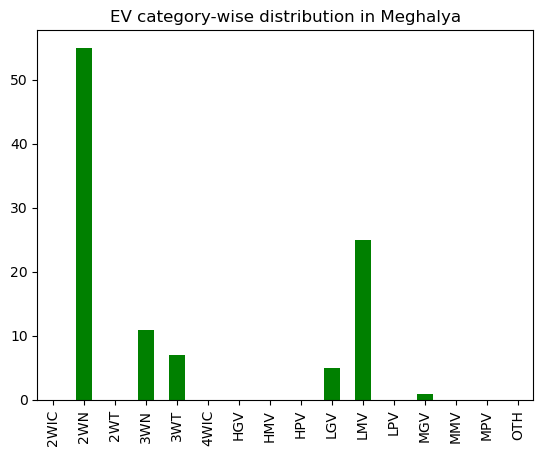

In [111]:
plt.title("EV category-wise distribution in Meghalya")
meghalya_fuel.iloc[3].plot(kind="bar",color="green");

Currently EV are very low in Meghalya, but govt. policy is very friendly that can cause to rise the EV market here. For example, there is Rs 20000 subsidy for electric 2-wheeler and Rs. 60000 subsidy for electric 4-wheeler. Plus there is also 100% road tax exemption for electric vehicle. Plus electric cost here is cheaper and unemployment is low, this could cause rise in EV market here.  

Now let's take a look at the petrol and diesel segment vehicles in Meghalaya.

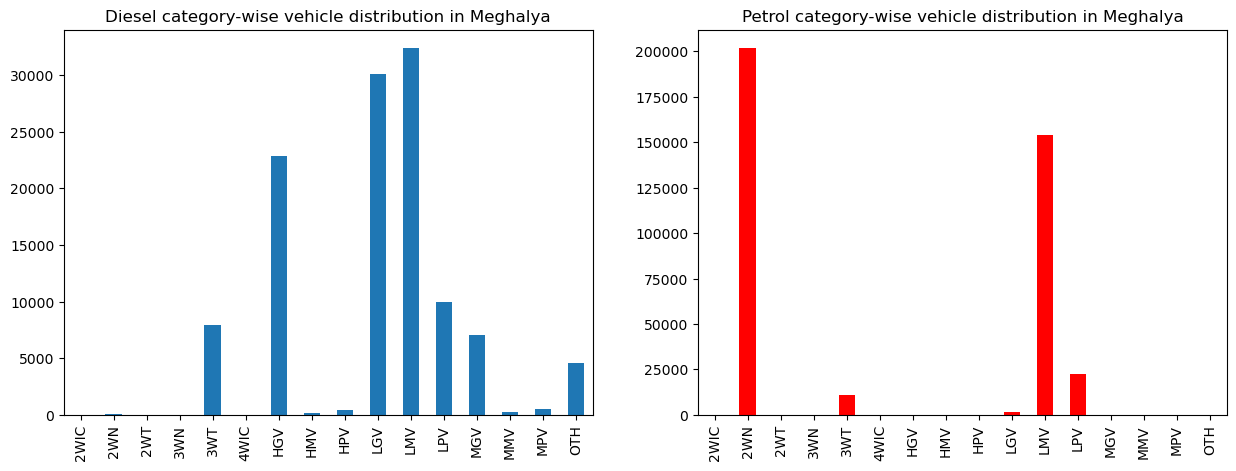

In [112]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Meghalya")
meghalya_fuel.loc["DIESEL"].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Meghalya")
meghalya_fuel.loc["PETROL"].plot(kind="bar",color="red");

Though current market for EV segment is low, but due to govt. friendly policy, an EV company could target the markets here in future. 

Next state is Manipur.

In [113]:
mizoram_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\23) Mizoram\Fuel_wise.xlsx","Fuel Wise")
mizoram_fuel.head()

2WIC  2WN  2WT  3WN  3WT  4WIC   HGV  HMV  HPV    LGV    LMV  \
Fuel Wise                                                                      
CNG ONLY           0    1    0    0    0     0     2    0    0      2      0   
DIESEL             0   75    0    1   98     0  7149   71  206  19749  12714   
DIESEL/HYBRID      0    0    0    0    0     0     0    0    0      0     26   
ELECTRIC(BOV)      0   97    0    0    1     0     2    0    0      0      3   
NOT APPLICABLE     0   28    1    0   11     0     3    0    0     22     35   

                 LPV   MGV  MMV  MPV   OTH  
Fuel Wise                                   
CNG ONLY           0     0    0    0     1  
DIESEL          4469  1827  163  234  2844  
DIESEL/HYBRID      2     0    0    0     0  
ELECTRIC(BOV)      4     0    0    0     2  
NOT APPLICABLE    18     2    0    0     4

Let's plot EV category-wise distribution of it.

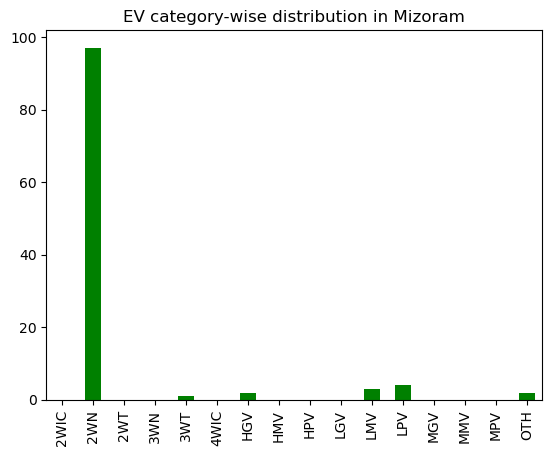

In [114]:
plt.title("EV category-wise distribution in Mizoram")
mizoram_fuel.iloc[3].plot(kind="bar",color="green");

Here, the number of EV vehicles are very low, this could be due to low population and area. Though literacy rate being high and unemployment rate being low, the polciy made by govt. is not EV market friendly. 

Now let's take a look at the petrol and diesel segment vehicles in Mizoram.

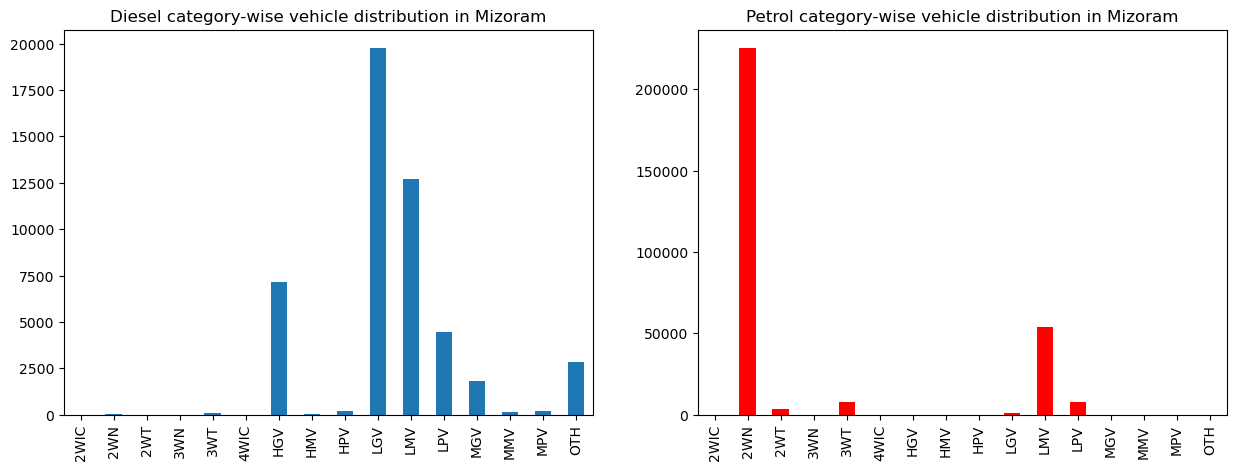

In [115]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Mizoram")
mizoram_fuel.loc["DIESEL"].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Mizoram")
mizoram_fuel.loc["PETROL"].plot(kind="bar",color="red");

Though the state has number of vehicles, despite the less pouplation, segment of EV market is very less. A new company entering over here should focus on Early Adopters.   

Next state is Nagaland.

In [116]:
nagaland_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\24) Nagaland\Fuel_wise.xlsx","Fuel Wise")
nagaland_fuel.head()

2WIC  2WN  2WT  3WN   3WT  4WIC     HGV   HMV   HPV    LGV  \
Fuel Wise                                                                     
CNG ONLY            0    0    0    0     0     0     187     0     1      0   
DIESEL              0   25    0    0  1514     0  164596  4951  2718  19945   
DIESEL/HYBRID       0    0    0    0     0     0       0     0     0      0   
DUAL DIESEL/CNG     0    0    0    0     0     0       6     0     0      3   
ELECTRIC(BOV)       0   50    0    0     0     0       2     0     0      0   

                   LMV   LPV   MGV   MMV  MPV   OTH  
Fuel Wise                                            
CNG ONLY             3     0    18     0    0     0  
DIESEL           33077  2133  2782  4948  519  5556  
DIESEL/HYBRID       65     0     0     0    0     0  
DUAL DIESEL/CNG      0     0     0     0    0     0  
ELECTRIC(BOV)        7     1     0     0    0     0

Let's plot EV category-wise distribution of it.

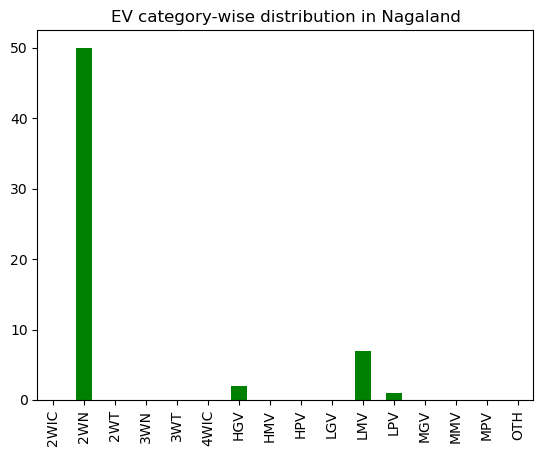

In [117]:
plt.title("EV category-wise distribution in Nagaland")
nagaland_fuel.iloc[4].plot(kind="bar",color="green");

Like other North-East states, here EVs are very low. Here EVs are even less as comapred to other Northern states. If we go in demogrpahic, reason could be for this high unemployment rate as compared to other Nort-East states and very low number of publicly available charging station, only 6.  

Now let's take a look at the petrol and diesel segment vehicles in Nagaland.

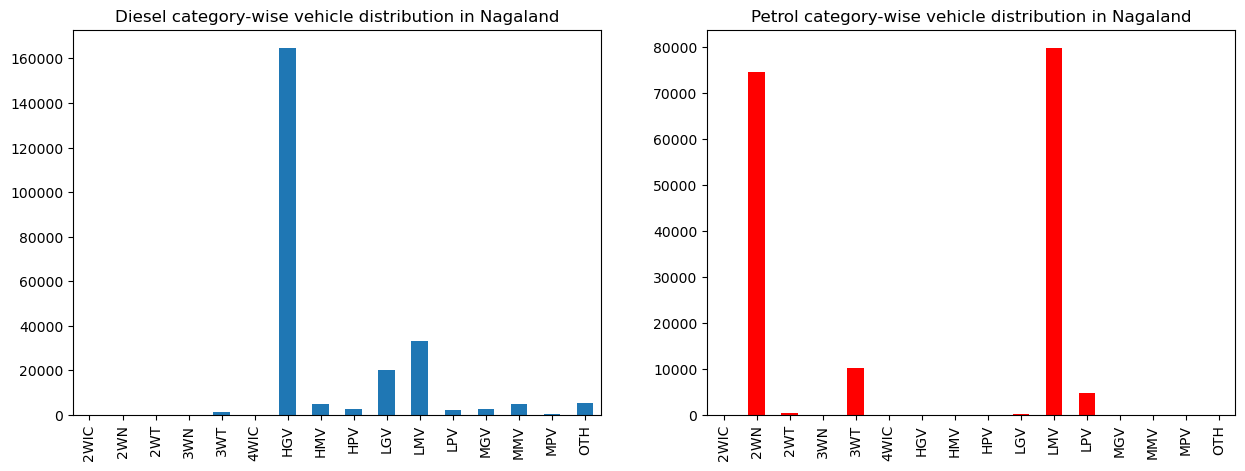

In [118]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Nagaland")
nagaland_fuel.loc["DIESEL"].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Nagaland")
nagaland_fuel.loc["PETROL"].plot(kind="bar",color="red");

Like other North-East states, EV markket here is very low. In such states company should expanding their business rather than starting from here. They can target early adopters of here.   

Next state is Odisha.

In [119]:
odissa_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\25) Odissa\Fuel_wise.xlsx","Fuel Wise")
odissa_fuel.head()

2WIC    2WN  2WT  3WN     3WT  4WIC     HGV   HMV   HPV  \
Fuel Wise                                                                
CNG ONLY          0     50    0    1    1803     0      15     0     1   
DIESEL           14   1960    0  140  251053    17  260241  3142  9294   
DIESEL/HYBRID     0      0    0    0       1     0       0     1     0   
ELECTRIC(BOV)     1  49814   11    2    5480     0      16     1    49   
LPG ONLY          0     93    0    0       6     0       0     0     0   

                  LGV     LMV     LPV    MGV   MMV   MPV   OTH  
Fuel Wise                                                       
CNG ONLY          187      11      12      2     0     3     0  
DIESEL         408122  330135  117111  24129  4943  7496  9524  
DIESEL/HYBRID       2    1968      79      0     1     0     1  
ELECTRIC(BOV)     156     877      74      1     0     1     2  
LPG ONLY            9      92       4      0     0     0     0

Let's plot EV category-wise distribution of it.

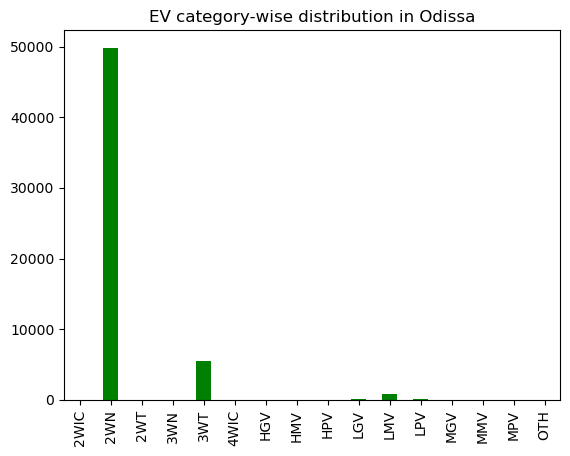

In [120]:
plt.title("EV category-wise distribution in Odissa")
odissa_fuel.iloc[3].plot(kind="bar",color="green");

This growth in 2WN can be caused by friendly govt. policy towards EVs. There is Rs. 5000 and Rs. 100000 subsidy from govt. side for electric vehicle electric 2-wheelers and electric 4-wheelers respectively. Also govt has made tax road completely free for electric vehicles over here. There is already 117 public charging station has been installed .Cost of electricity is also cheaper here, because of all these reasons, EV market can prosper here in the future.    

Now let's take a look at the petrol and diesel segment vehicles in Odissa.

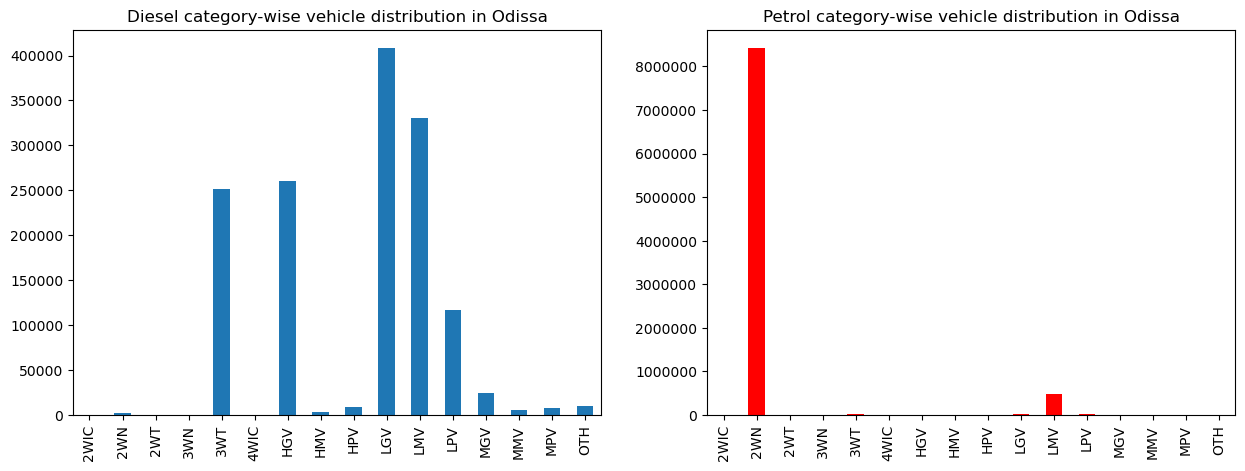

In [121]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Odissa")
odissa_fuel.loc["DIESEL"].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Odissa")
odissa_fuel.loc["PETROL"].plot(kind="bar",color="red");

So, given the govt. policy and already high number of electric vehicles present, a company can think about doing business here.  

Next state is Punjab.

In [122]:
punjab_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\26) Punjab\Fuel_wise.xlsx","Fuel Wise")
punjab_fuel.head()

2WIC    2WN  2WT   3WN    3WT  4WIC     HGV  HMV    HPV  \
Fuel Wise                                                                  
CNG ONLY            0     64    0     0   5507     0     993    0     39   
DIESEL             22   7041    0  1803  74727   110  165617  890  12545   
DIESEL/HYBRID       0      0    0     0      0     0       3    0      0   
DUAL DIESEL/CNG     0      0    0     0      0     0       3    0      5   
ELECTRIC(BOV)       0  17116    0     1  13918     0      13    0      1   

                    LGV      LMV    LPV    MGV   MMV   MPV     OTH  
Fuel Wise                                                           
CNG ONLY           3004      454   1073    858     0    65      45  
DIESEL           304508  1327907  68323  15930  2824  6962  406357  
DIESEL/HYBRID         3     4035    149      0     1     1       8  
DUAL DIESEL/CNG       0        1      1      0     0     1       1  
ELECTRIC(BOV)        89      280     26      2     0     1      64

Let's plot EV category-wise distribution of it.

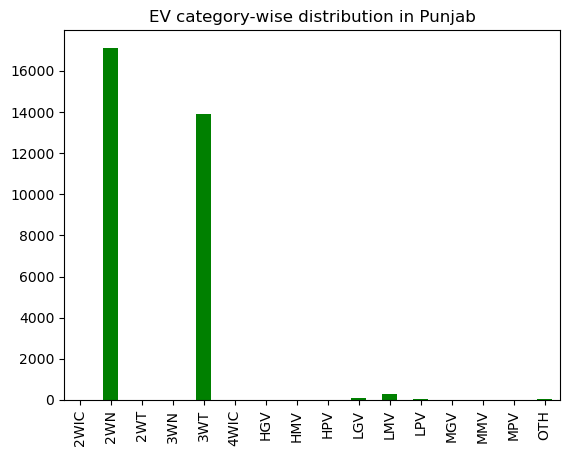

In [123]:
plt.title("EV category-wise distribution in Punjab")
punjab_fuel.iloc[4].plot(kind="bar",color="green");

Here people currently used EV vehicles mostly for 2WN. With high deposit in commercial banks and high avialability of power combined by govt. policy of 100% tax road exemption on electric vehicle can cause people of the state to buy more electric vehicle and any company can begin its business by targeting 2WN. This state also has high number of available publci charging stations.

Now let's take a look at the petrol and diesel segment vehicles in Punjab.

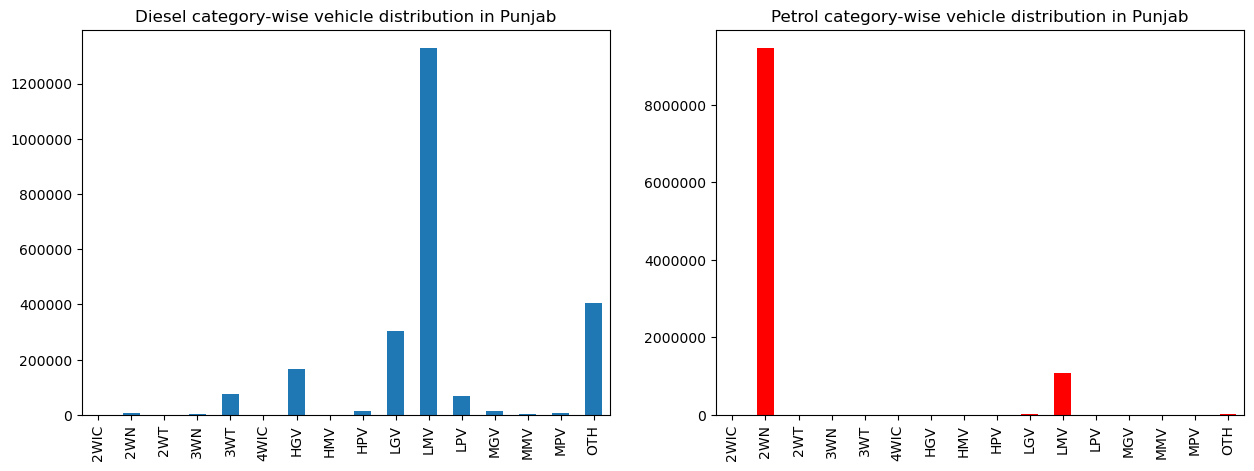

In [124]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Punjab")
punjab_fuel.loc["DIESEL"].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Punjab")
punjab_fuel.loc["PETROL"].plot(kind="bar",color="red");

So, as reason provided earlier this state offer a lurcative market for electric market segment.

Next state is Rajasthan.

In [125]:
rajasthan_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\28) Rajasthan\Fuel_wise.xlsx","Fuel Wise")
rajasthan_fuel.head()

2WIC     2WN  2WT  3WN     3WT  4WIC     HGV   HMV    HPV  \
Fuel Wise                                                                    
CNG ONLY            0       1    0    6   13569     0    1052     3    103   
DIESEL              2    2477    7   32  183158    39  414330  3372  50559   
DIESEL/HYBRID       0       0    0    0       0     0       1     0      0   
DUAL DIESEL/CNG     0       0    0    0       0     0       2     0      0   
ELECTRIC(BOV)      18  101895   88    0   61100     2      44     0     11   

                    LGV      LMV     LPV    MGV   MMV    MPV    OTH  
Fuel Wise                                                            
CNG ONLY           5687       48      92    670     1    225      4  
DIESEL           420280  2233071  152552  13933  4343  16891  43032  
DIESEL/HYBRID         2     8727     208      0     0      0      0  
DUAL DIESEL/CNG       3        1       0      0     0      0      2  
ELECTRIC(BOV)        23     3778      91      0     0      0      1

Let's plot EV category-wise distribution of it.

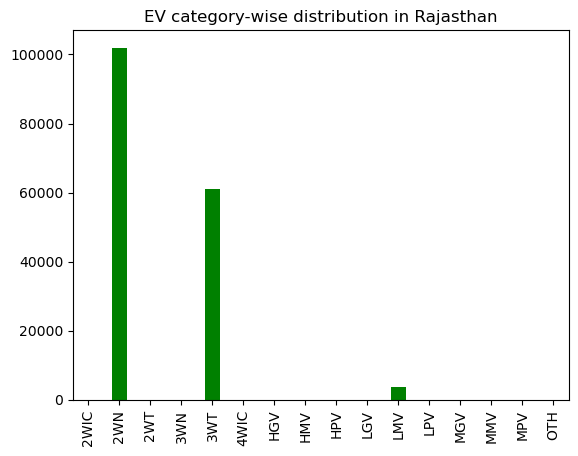

In [126]:
plt.title("EV category-wise distribution in Rajasthan")
rajasthan_fuel.iloc[4].plot(kind="bar",color="green");

Here electric 2-wheelers are reaching upto 1 lacs, without any subsidy provided and without full road tax exemption. Though this state has high number of length in kilometers and thkis provide more opportunity to install the public charging stations.  

Now let's take a look at the petrol and diesel segment vehicles in Rajasthan.

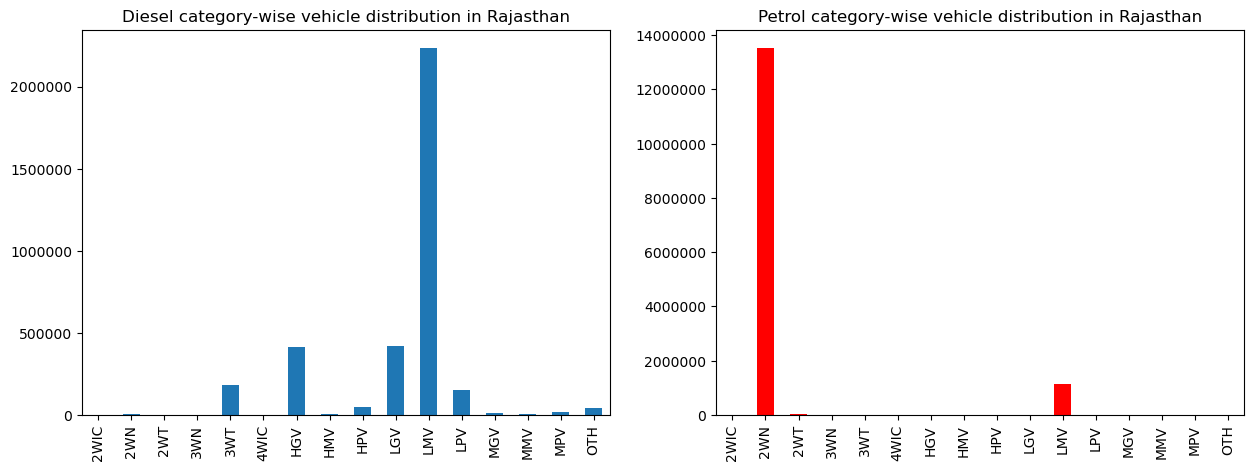

In [127]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Rajasthan")
rajasthan_fuel.loc["DIESEL"].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Rajasthan")
rajasthan_fuel.loc["PETROL"].plot(kind="bar",color="red");

With high number of charging stations and high deposit in banks, a company entring in the business could focus on two-wheelers and three-wheelers.

Next state is Sikkim.

In [128]:
sikkim_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\29) Sikkim\Fuel_wise.xlsx","Fuel Wise")
sikkim_fuel.head()

2WIC  2WN  2WT  3WN  3WT  4WIC   HGV  HMV  HPV   LGV    LMV  \
Fuel Wise                                                                    
CNG ONLY          0    0    0    0    0     0     2    0    0     0      0   
DIESEL            0    9    0    0    0     0  3633   48  125  3740  16703   
DIESEL/HYBRID     0    0    0    0    0     0     0    0    0     0     87   
ELECTRIC(BOV)     0    1    0    0    0     0     1    0    0     0     10   
LPG ONLY          0    0    0    0    0     0     0    0    0     0      0   

                LPV  MGV  MMV  MPV  OTH  
Fuel Wise                                
CNG ONLY          2    1    0    1    0  
DIESEL         8508  875   42  292  338  
DIESEL/HYBRID     5    0    0    0    0  
ELECTRIC(BOV)     9    0    0    0    0  
LPG ONLY          1    0    0    0    0

Let's plot EV category-wise distribution of it.

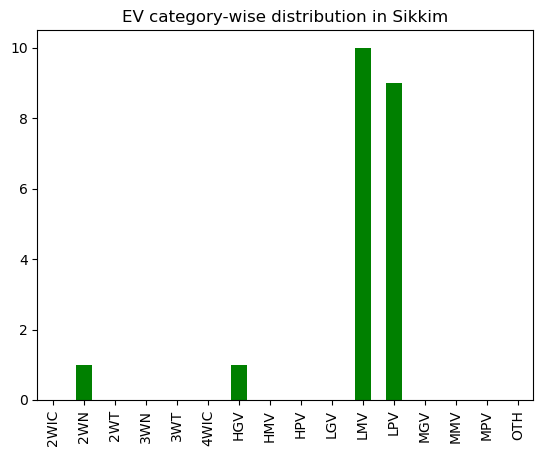

In [129]:
plt.title("EV category-wise distribution in Sikkim")
sikkim_fuel.iloc[3].plot(kind="bar",color="green");

This is the state where although low in number but electric 4-wheelers are more as comapred to electric 2-wheelers. This could be attributed to low unemployment rate and low cost of electricity. However, there is only one public charging station available. SO, there needs to be work done on infrastructure.  

Now let's take a look at the petrol and diesel segment vehicles in Sikkim.

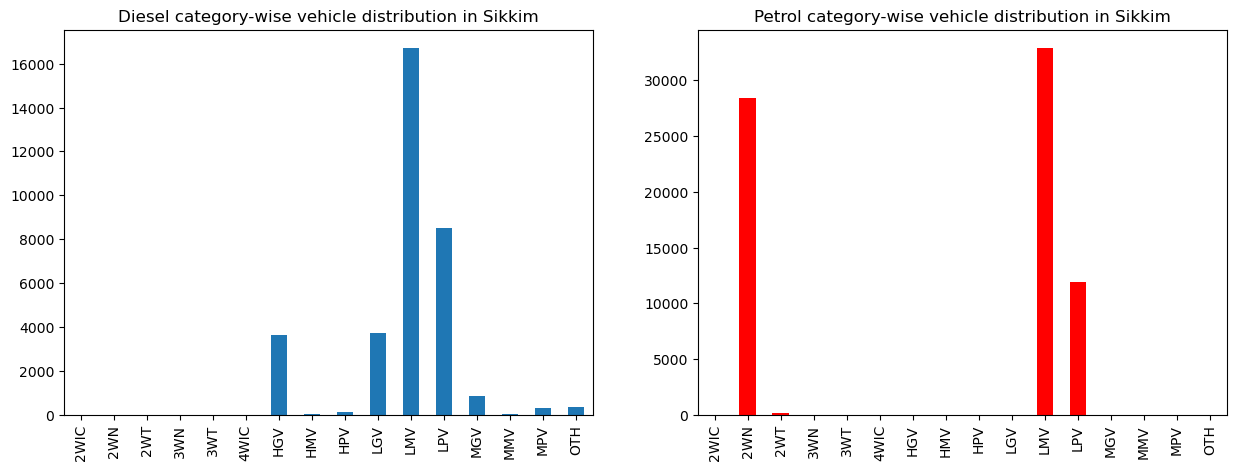

In [130]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Sikkim")
sikkim_fuel.loc["DIESEL"].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Sikkim")
sikkim_fuel.loc["PETROL"].plot(kind="bar",color="red");

Currently the number of EVs in low, but this is the only state where number of electric 4-wheelers are higher than electric 2-wheelers. So, company may give some offer to attract people to buy 4-wheelers of electric instead of petrol and diesel. However, this task could be difficult because of unfriendly electric vehicle policy of state and given the fact there is only one publicly available charging station. 

Next state is Tamilnadu.

In [131]:
tamilnadu_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\30) Tamilnadu\Fuel_wise.xlsx","Fuel Wise")
tamilnadu_fuel.head()

2WIC     2WN  2WT   3WN     3WT  4WIC     HGV    HMV     HPV  \
Fuel Wise                                                                       
CNG ONLY            0       1    0   165   18934     0     230      1      32   
DIESEL             13   33502    0  2400  243451   205  473150  21229  114122   
DIESEL/HYBRID       0       1    0     0       2     0       2      0       0   
DUAL DIESEL/CNG     0       0    0     0       0     0       0      0       0   
ELECTRIC(BOV)       2  139633    0    55    8746     0      35    169      10   

                    LGV      LMV     LPV     MGV    MMV    MPV    OTH  
Fuel Wise                                                              
CNG ONLY           2745       14      14     810      3     42      1  
DIESEL           878533  1878001  375309  109119  23257  30503  60887  
DIESEL/HYBRID        13     7654      40       1      1      1      1  
DUAL DIESEL/CNG       1        0       0       0      0      0      0  
ELECTRIC(BOV)      2217     7957     294      13     25      2     65

Let's plot EV category-wise distribution of it.

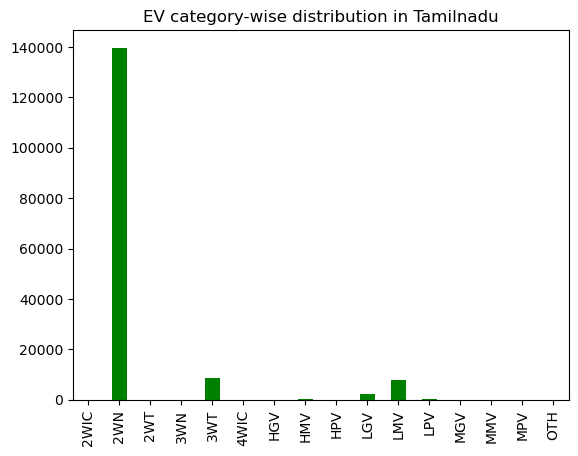

In [132]:
plt.title("EV category-wise distribution in Tamilnadu")
tamilnadu_fuel.iloc[4].plot(kind="bar",color="green");

Tamilnadu has high number of electric vehicle available, in both 2-wheeler and 4-wheeler segment. Reason could be high number of electric public charging stations avialable, high deposit in banks, low unemployment rate, and 100% road tax exemption given by government for electric vehicles. Public charging available stations are also high. So, given all these facts, this could let the rise of electric vehicles in Tamilnadu.   

Now let's take a look at the petrol and diesel segment vehicles in Tamilnadu.

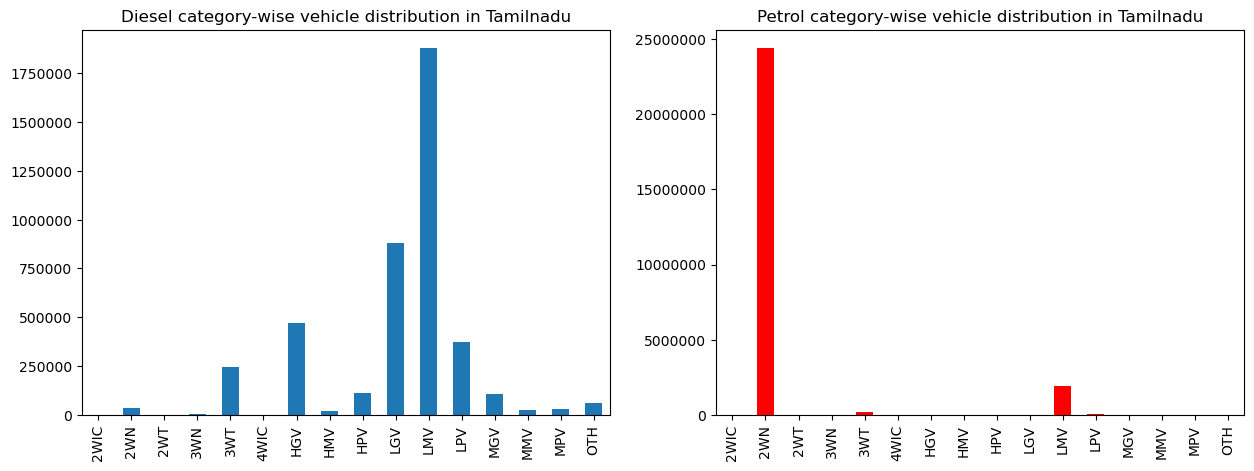

In [133]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Tamilnadu")
tamilnadu_fuel.loc["DIESEL"].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Tamilnadu")
tamilnadu_fuel.loc["PETROL"].plot(kind="bar",color="red");

With the road tax for both diesel and petrol vehciles are high (15% on both), which is second highest in India. And given the friendly poilcy and EV market already present here, a new company may think about starting their business from here.  

Next state is Tripura.

In [134]:
tripura_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\31) Tripura\Fuel_wise.xlsx","Fuel Wise")
tripura_fuel.head()

2WIC   2WN  2WT  3WN    3WT  4WIC    HGV  HMV  HPV    LGV  \
Fuel Wise                                                                   
CNG ONLY           0     0    0    3  14150     0      0    0    2    475   
DIESEL             0   575    0    1   6950     1  12082  118  931  25222   
DIESEL/HYBRID      0     0    0    0      0     0      1    0    0      0   
ELECTRIC(BOV)      0   394    0    0  13265     0      0    0    0      8   
NOT APPLICABLE     0  3743    0    0    296     0     55    0    2    184   

                 LMV   LPV   MGV  MMV  MPV   OTH  
Fuel Wise                                         
CNG ONLY        6144   201    56    0  104     5  
DIESEL          8995  9279  3266  262  833  1345  
DIESEL/HYBRID     49     6     0    0    0     0  
ELECTRIC(BOV)     21     6     0    0    0     0  
NOT APPLICABLE   400    27    16    3    2    10

Let's plot EV category-wise distribution of it.

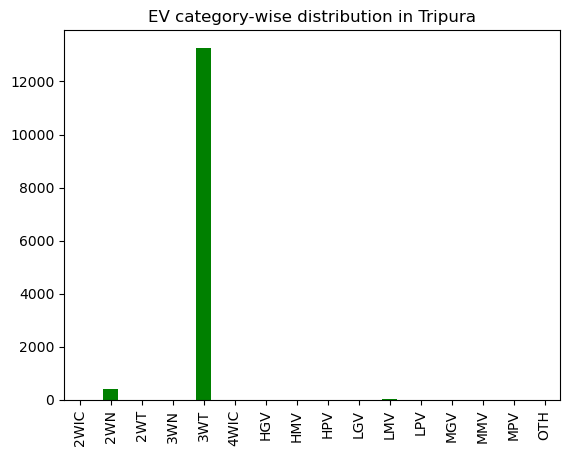

In [135]:
plt.title("EV category-wise distribution in Tripura")
tripura_fuel.iloc[3].plot(kind="bar",color="green");

Here 3-wheeler dominates in the EV segment. If we comapre it from the other Northern states, this amount is very high. Still no aid from govt. either in terms of subsidy or in terms of road tax.   

Now let's take a look at the petrol and diesel segment vehicles in Tripura.

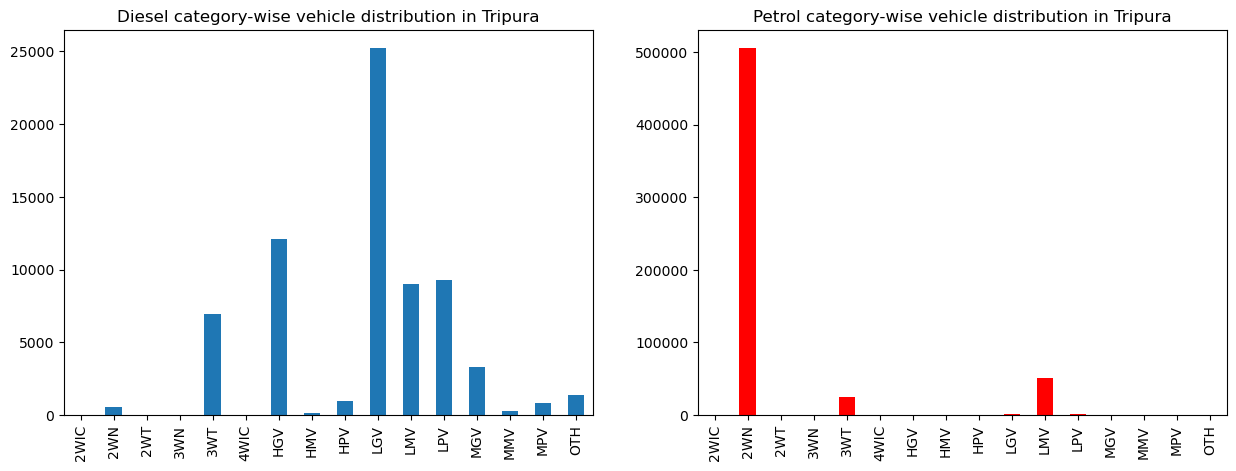

In [136]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Tripura")
tripura_fuel.loc["DIESEL"].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Tripura")
tripura_fuel.loc["PETROL"].plot(kind="bar",color="red");

So, from the graph company enetring here should focus on the three-wheeler transportaion sector.

Next state is Uttrakhand.

In [137]:
uk_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\32) Uttrakhand\Fuel_wise.xlsx","Fuel Wise")
uk_fuel.head()

2WIC    2WN  2WT  3WN    3WT  4WIC    HGV  HMV    HPV    LGV  \
Fuel Wise                                                                     
CNG ONLY          0      1    0    0   3262     0    287    0    119    616   
DIESEL            0    280    2    5  29786     9  55637  200  13418  71458   
DIESEL/HYBRID     0      0    0    0      1     0      0    0      0      1   
ELECTRIC(BOV)     0  10827    7    0  35049     0      0    0     34      1   
LPG ONLY          0     38    0    0    204     0      0    0      0      1   

                  LMV    LPV    MGV  MMV   MPV   OTH  
Fuel Wise                                             
CNG ONLY            8      8    138    0    13     0  
DIESEL         245033  56942  13630  441  6376  2644  
DIESEL/HYBRID    2580    204      0    0     0     0  
ELECTRIC(BOV)     688     43      0    0     1     0  
LPG ONLY           18      1      0    0     0     0

Let's plot EV category-wise distribution of it.

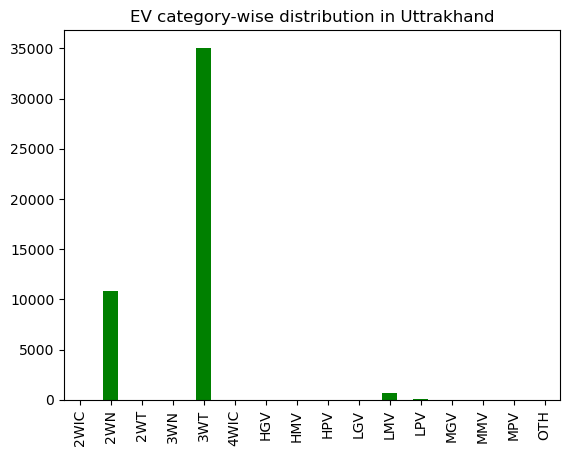

In [138]:
plt.title("EV category-wise distribution in Uttrakhand")
uk_fuel.iloc[3].plot(kind="bar",color="green");

So, even being the hilly state the number of electric vehicles are high here, especially in three wheeler transportation system. Given, the state is hilly area number of 10000 2WN is good. If we look in demographic factor, unemployment is low, but other demographic factors may hinder the growth of electric vehicles market here.   

Now let's take a look at the petrol and diesel segment vehicles in Uttrakhand.

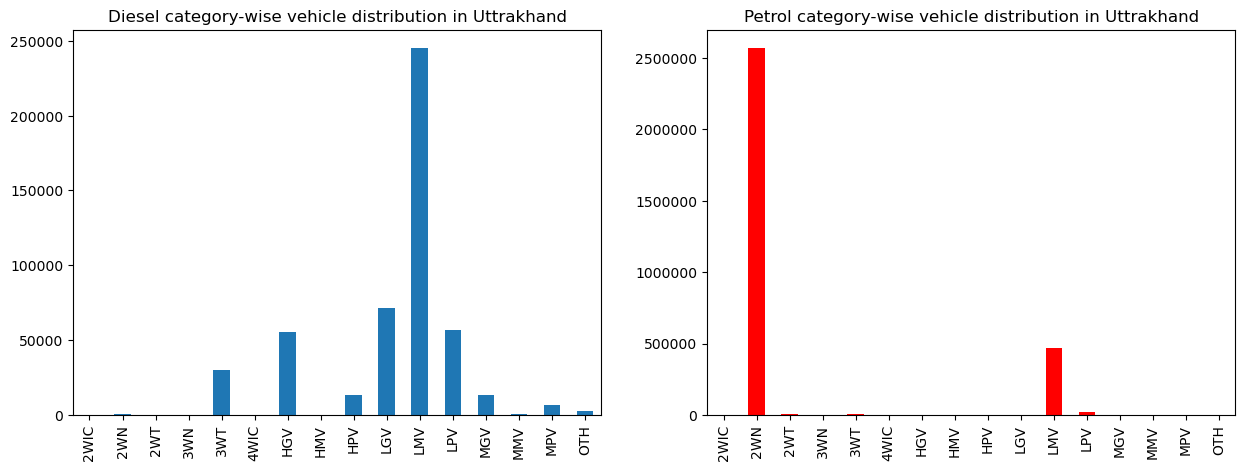

In [139]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Uttrakhand")
uk_fuel.loc["DIESEL"].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Uttrakhand")
uk_fuel.loc["PETROL"].plot(kind="bar",color="red");

So, any new enetrant might think about entering in the segment of 2-wheeler and 3-wheeler here.

Next state is Uttar Pradesh.

In [140]:
up_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\33) Uttar Pradesh\Fuel_wise.xlsx","Fuel Wise")
up_fuel.head()

2WIC    2WN  2WT  3WN     3WT  4WIC     HGV   HMV    HPV  \
Fuel Wise                                                                   
CNG ONLY            0     66    0   40  114343     0    4796     1   9848   
DIESEL              2  11826    1  250  387792    84  433594  4249  73864   
DIESEL/HYBRID       0      1    0    0       0     0       1     0      1   
DUAL DIESEL/CNG     0      0    0    0       0     0       1     0      0   
ELECTRIC(BOV)       1  55911   20    1  470414     0       1     2    708   

                    LGV      LMV     LPV    MGV    MMV    MPV    OTH  
Fuel Wise                                                             
CNG ONLY          32831     2238    3444   5737      1   4443      5  
DIESEL           588860  3488212  158573  43006  10129  34837  23308  
DIESEL/HYBRID         4    14642     210      0      0      0      0  
DUAL DIESEL/CNG       0        0       0      0      0      0      1  
ELECTRIC(BOV)        95     1952      74      0      1     51      1

Let's plot EV category-wise distribution of it.

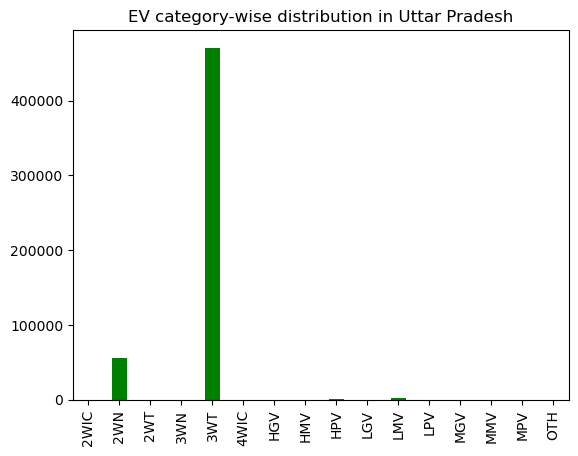

In [141]:
plt.title("EV category-wise distribution in Uttar Pradesh")
up_fuel.iloc[4].plot(kind="bar",color="green");

This is the state with the highest number of electric vehicles. This could be contributed to govt. policy as well. Here 100% road tax exemption is given for electric vehicles. Given the state has large area, so the number of available public charging stations are also high. Challenges are also there given the state has high illiteracy rate and gdp per capita is low. But as given the large number of market is already present, this could attract more number of players to do their business here.    

Now let's take a look at the petrol and diesel segment vehicles in Uttar Pradesh.

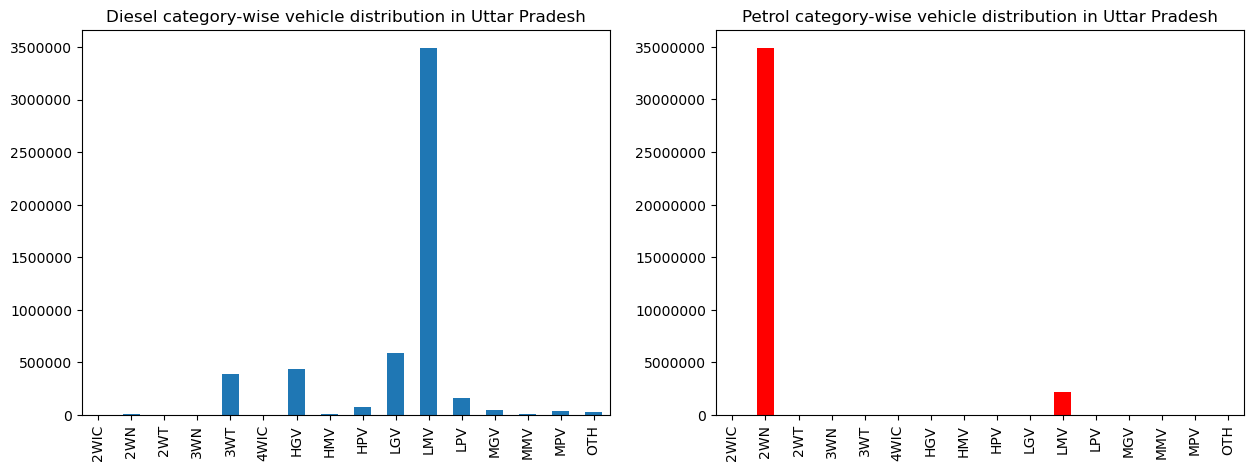

In [142]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in Uttar Pradesh")
up_fuel.loc["DIESEL"].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in Uttar Pradesh")
up_fuel.loc["PETROL"].plot(kind="bar",color="red");

As expected given the large population, there are high number of vehicles are present in the state. A new enterant company might easily find the customer here in all the available EV segment. 

Next state is West Bengal.

In [143]:
wb_fuel = read_dataframe(r"C:\Users\utkri\Documents\Study\Datasets\Datatset_EV_Vehicles\34) West Bengal\Fuel_wise.xlsx","Fuel Wise")
wb_fuel.head()

2WIC    2WN  2WT  3WN    3WT  4WIC     HGV   HMV    HPV  \
Fuel Wise                                                                
CNG ONLY          0     12    0    0    919     0      65     0     68   
DIESEL            0   3321    0   53  80850     0  371263  1354  50578   
DIESEL/HYBRID     0      0    0    0      1     0       7     3      2   
ELECTRIC(BOV)     0  15594    0    0  44568     2      14     0     73   
LPG ONLY          0     13    0   14  54362     0       0     0      0   

                  LGV     LMV     LPV    MGV   MMV    MPV    OTH  
Fuel Wise                                                         
CNG ONLY          109     108       0     60     0     25      0  
DIESEL         565054  515182  185341  38315  1683  14746  18328  
DIESEL/HYBRID      14    4868     352      3     1      1      0  
ELECTRIC(BOV)    2484    2215     582      7     0     49     18  
LPG ONLY           21     246       1      0     0      0      4

Let's plot EV category-wise distribution of it.

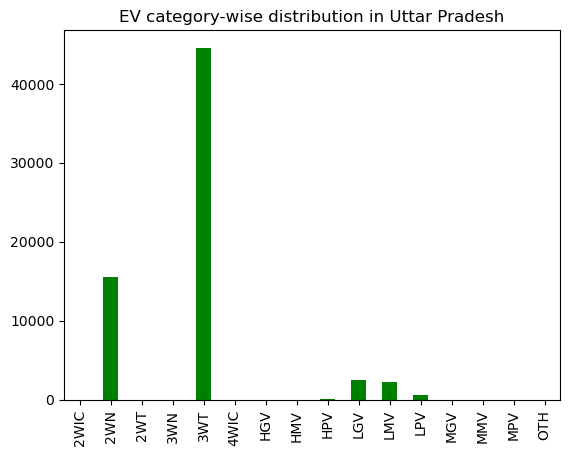

In [144]:
plt.title("EV category-wise distribution in Uttar Pradesh")
wb_fuel.iloc[3].plot(kind="bar",color="green");

Although given the population of the state, electric vehicles are still less as compared to other populous state. But given the friendly policy of state govt., where there is subsidy of Rs.20000 for electric 2-wheeler and subsidy of Rs. 150000 for 4-wheelers, and 100% road tax exemption of electric vehicle, number of vehicles in future are only expected to rise.    

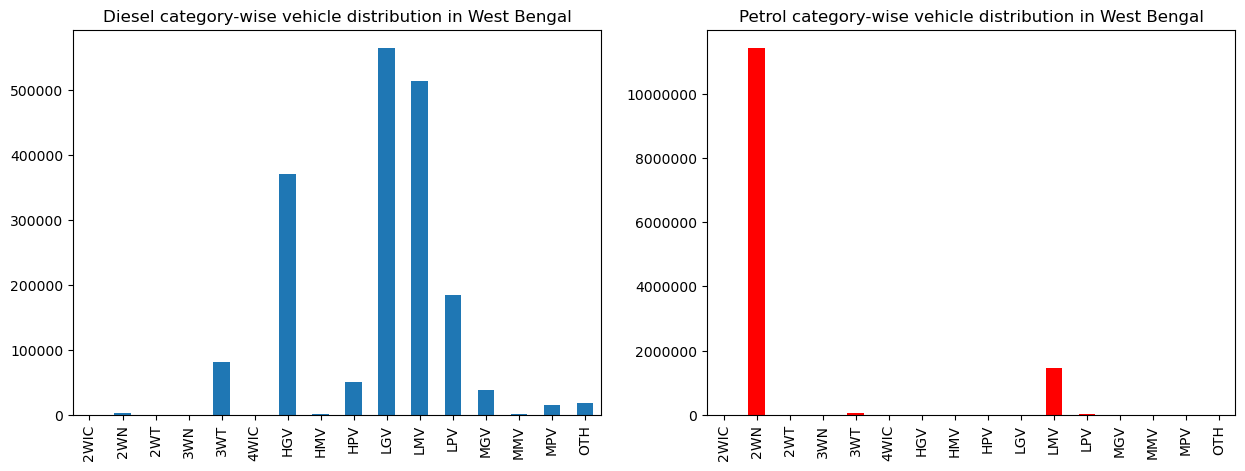

In [145]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Diesel category-wise vehicle distribution in West Bengal")
wb_fuel.loc["DIESEL"].plot(kind="bar");
plt.subplot(1,2,2)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Petrol category-wise vehicle distribution in West Bengal")
wb_fuel.loc["PETROL"].plot(kind="bar",color="red");

So, from here we can conclude that any new entering company can focus on 2WN followed by the electric LMV segment.  

### Pricipal component analysis

In [150]:
# Let's take the numerical variable
df_state_num = df_state.iloc[:,1:-2]

In [151]:
df_state_num.head()

Population in thousand  Unemployment Rural Male  Unemployment Rural Female  \
0                 84581.0                       47                         13   
1                  1384.0                       35                         83   
2                 31206.0                       30                         57   
3                104099.0                       45                         19   
4                 25545.0                       27                          7   

   Unemployment Urban Male  Unemployment Urban Female  \
0                       55                         72   
1                       95                        140   
2                       55                        169   
3                       90                        170   
4                       60                         70   

   Literacy Rate (in percent)  Number of Employees  Gross Domestic Product   \
0                       67.02             111300.0               23738349.0   
1                       65.39                577.0                 568732.0   
2                       72.19              35530.0                8107367.0   
3                       61.80              17317.0               14227912.0   
4                       70.28              40497.0                9697218.0   

   Per Capita Net State Domestic Product   \
0                                 44376.0   
1                                 39726.0   
2                                 24099.0   
3                                 13728.0   
4                                 34360.0   

   Deposit in Scheduled Commercial Banks in Crores  Length of Road in KMs  \
0                                         292700.0               238001.0   
1                                           5200.0                21555.0   
2                                          58500.0               241789.0   
3                                         119200.0               130642.0   
4                                          56800.0                93965.0   

   Availability Of Power in Net Core Units  \
0                                   8515.0   
1                                     55.0   
2                                    570.0   
3                                   1126.0   
4                                   1462.0   

   Installed Capacity Of Renewable Power Grid im MegaWatt  \
0                                             1114.0        
1                                              104.0        
2                                               31.0        
3                                              114.0        
4                                              306.0        

   No. Of Available Charging Public Stations  Tax Exemption for Electric 2W  \
0                                      222.0                              0   
1                                        9.0                              0   
2                                       48.0                          20000   
3                                       83.0                          20000   
4                                       46.0                              0   

   Tax Exemption For Electric 4W  \
0                              0   
1                              0   
2                         150000   
3                         150000   
4                              0   

   Road Taxes Of Private Vehicle Petrol  Above 10 Lacs in percent  \
0                                               14.0                
1                                                0.0                
2                                                7.5                
3                                               13.0                
4                                                0.0                

   Road Taxes Of Private Vehicle Diesel  Above 10 Lacs in percent  \
0                                               14.0                
1                                                0.0                
2     

Let's convert the data into the standard scaled format.

In [152]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_state_num_scaled = scaler.fit_transform(df_state_num)

In [155]:
df_state_num_scaled = pd.DataFrame(df_state_num_scaled,columns=df_state_num.columns)

In [157]:
df_state_num_scaled.head()

Population in thousand  Unemployment Rural Male  Unemployment Rural Female  \
0                1.133865                 0.133388                  -0.647590   
1               -0.780691                -0.245145                   0.800034   
2               -0.094418                -0.402867                   0.262345   
3                1.583020                 0.070299                  -0.523508   
4               -0.224690                -0.497500                  -0.771672   

   Unemployment Urban Male  Unemployment Urban Female  \
0                -0.497907                  -0.515315   
1                 0.749087                   0.299602   
2                -0.497907                   0.647140   
3                 0.593213                   0.659124   
4                -0.342033                  -0.539283   

   Literacy Rate (in percent)  Number of Employees  Gross Domestic Product   \
0                   -1.202937             0.106734                 0.567857   
1                   -1.394757            -0.711026                -0.836879   
2                   -0.594525            -0.452875                -0.379824   
3                   -1.817233            -0.587390                -0.008745   
4                   -0.819296            -0.416191                -0.283434   

   Per Capita Net State Domestic Product   \
0                               -0.083057   
1                               -0.247502   
2                               -0.800141   
3                               -1.166906   
4                               -0.437267   

   Deposit in Scheduled Commercial Banks in Crores  Length of Road in KMs  \
0                                         0.522939               1.079199   
1                                        -0.560551              -0.721621   
2                                        -0.359681               1.110715   
3                                        -0.130923               0.185977   
4                                        -0.366088              -0.119173   

   Availability Of Power in Net Core Units  \
0                                 2.033857   
1                                -0.780226   
2                                -0.608920   
3                                -0.423975   
4                                -0.312210   

   Installed Capacity Of Renewable Power Grid im MegaWatt  \
0                                           0.181374        
1                                          -0.415717        
2                                          -0.458873        
3                                          -0.409805        
4                                          -0.296299        

   No. Of Available Charging Public Stations  Tax Exemption for Electric 2W  \
0                                   0.100802                      -0.464991   
1                                  -0.533355                      -0.464991   
2                                  -0.417242                       1.859962   
3                                  -0.313038                       1.859962   
4                                  -0.423197                      -0.464991   

   Tax Exemption For Electric 4W  \
0                      -0.461317   
1                      -0.461317   
2                       1.936618   
3                       1.936618   
4                      -0.461317   

   Road Taxes Of Private Vehicle Petrol  Above 10 Lacs in percent  \
0                                           1.258108                
1                                          -1.439805                
2                                           0.005506                
3                                           1.065400                
4                                          -1.439805                

   Road Taxes Of Private Vehicle Diesel  Above 10 Lacs in percent  \
0                                           1.201227                
1                                          -1.438241                
2     

Now let's perform Principal Component Analysis.

In [160]:
from sklearn.decomposition import PCA
pca = PCA()
df_state_num_scaled_pca = pca.fit_transform(df_state_num_scaled)

In [161]:
# Print the information for the first 15 principal components
num_components = 15
for i in range(num_components):
    print("Principal Components: ",i+1)
    print("Standard deviation ",pca.explained_variance_[i]**0.5)
    print("Proportion of variance: ",pca.explained_variance_ratio_[i])
    print("Cumulative Proportion of Variance",sum(pca.explained_variance_ratio_[:i+1]))
    print()

Principal Components:  1
Standard deviation  2.760411807621665
Proportion of variance:  0.38958750950427323
Cumulative Proportion of Variance 0.38958750950427323

Principal Components:  2
Standard deviation  1.5965609701009331
Proportion of variance:  0.13032516640975567
Cumulative Proportion of Variance 0.5199126759140289

Principal Components:  3
Standard deviation  1.487006079113612
Proportion of variance:  0.11305317398031353
Cumulative Proportion of Variance 0.6329658498943425

Principal Components:  4
Standard deviation  1.385196130409997
Proportion of variance:  0.09810244040585896
Cumulative Proportion of Variance 0.7310682903002014

Principal Components:  5
Standard deviation  1.1862471843167812
Proportion of variance:  0.07194616691456049
Cumulative Proportion of Variance 0.8030144572147618

Principal Components:  6
Standard deviation  1.086889279015763
Proportion of variance:  0.06039874039780418
Cumulative Proportion of Variance 0.863413197612566

Principal Components:  7
S

Let's try to see the importance of each original feature in determining the principal component.

In [170]:
X = df_state_num

In [166]:
# Perform PCA
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X)

# Get the loadings or coefficients of the first principal component
first_component_loadings = pca.components_[0]

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame({'Feature': X.columns, 'Loading': first_component_loadings})
loadings_df = loadings_df.sort_values(by='Loading', ascending=False)

print(loadings_df)

                                              Feature       Loading
7                             Gross Domestic Product   9.998543e-01
9     Deposit in Scheduled Commercial Banks in Crores  1.389317e-02
6                                 Number of Employees  7.443250e-03
10                              Length of Road in KMs  5.639962e-03
0                              Population in thousand  2.073829e-03
18                       Electric Vehicles Registered  1.888187e-03
15                      Tax Exemption For Electric 4W  1.807435e-03
14                      Tax Exemption for Electric 2W  1.753384e-04
11            Availability Of Power in Net Core Units  1.679149e-04
12  Installed Capacity Of Renewable Power Grid im ...  6.999684e-05
8              Per Capita Net State Domestic Product   4.167934e-05
13          No. Of Available Charging Public Stations  1.030029e-05
17  Road Taxes Of Private Vehicle Diesel  Above 10...  1.823615e-07
16  Road Taxes Of Private Vehicle Petrol  Above 

Now let's start with making clusters. There are many ways to make clusters. Let us explore.
Let's calculate the distance pairwise.

In [177]:
# Let's set the index to States for better interpretation
df_state_index = df_state.set_index(df_state.columns[0])

In [182]:
from scipy.spatial.distance import pdist,squareform
# Pairwise distance
distances = pdist(df_state_num)

# Convert the distances to a square matrix distance
distance_matrix = pd.DataFrame(squareform(distances), index=df_state_index.index, columns=df_state_index.index)
# Print the pairwise distance
pd.set_option('display.float_format', '{:.2f}'.format)
distance_matrix[:5]

States             Andhra Pradesh  Arunachal Pradesh       Assam       Bihar  \
States                                                                         
Andhra Pradesh               0.00        23172915.56 15633767.39  9514365.54   
Arunachal Pradesh     23172915.56               0.00  7543865.99 13661492.35   
Assam                 15633767.39         7543865.99        0.00  6122341.59   
Bihar                  9514365.54        13661492.35  6122341.59        0.00   
Chhattisgarh          14044249.83         9129049.81  1604286.59  4534847.70   

States             Chhattisgarh       Delhi         Goa     Gujarat  \
States                                                                
Andhra Pradesh      14044249.83  4806333.91 21200434.48 13057598.38   
Arunachal Pradesh    9129049.81 18396688.57  1975322.76 36226429.49   
Assam                1604286.59 10864070.73  5574312.06 28688077.00   
Bihar                4534847.70  4757009.98 11689700.84 22568479.75   
Chhattisgarh               0.00  9276766.80  7157159.61 27097906.20   

States                Haryana  Himachal Pradesh  Jammu & Kashmir   Jharkhand  \
States                                                                         
Andhra Pradesh     5493480.28       19593008.23      19510116.16 14962339.13   
Arunachal Pradesh 17685246.18        3580339.09       3662982.44  8211274.50   
Assam             10149837.43        3967306.15       3885202.55   724060.45   
Bihar              4034098.50       10082274.97       9999040.19  5452728.24   
Chhattisgarh       8557246.43        5549265.15       5466257.97   921013.18   

States              Karnataka      Kerala  Madhya Pradesh  Maharashtra  \
States                                                                   
Andhra Pradesh     7294265.67  3463374.54      4014072.91  51674445.53   
Arunachal Pradesh 30466576.72 19711229.66     19160720.78  74845814.46   
Assam             22927112.43 12172577.28     11621886.88  67306380.73   
Bihar             16807692.90  6053874.46      5502932.99  61186684.81   
Chhattisgarh      21337816.39 10582289.38     10031791.63  65717900.22   

States                Manipur   Meghalaya     Mizoram    Nagaland      Odisha  \
States                                                                          
Andhra Pradesh    23001781.20 22580144.74 23284070.52 22797975.27  8892384.73   
Arunachal Pradesh   171921.52   596438.50   111680.98   375143.00 14283138.21   
Assam              7372841.87  6950533.66  7655178.85  7168901.90  6742191.48   
Bihar             13490318.02 13068085.45 13772616.11 13286594.03   642545.79   
Chhattisgarh       8957884.61  8536400.03  9240181.69  8754107.93  5155700.41   

States                 Punjab   Rajasthan      Sikkim  Tamil Nadu   Telangana  \
States                                                                          
Andhra Pradesh     6338389.85   664719.82 23418864.70 16400161.24  4810989.28   
Arunachal Pradesh 16836521.87 22528111.18   246579.80 39568739.62 18371321.99   
Assam              9300266.23 14988802.75  7790021.50 32031231.20 10833111.66   
Bihar              3183955.98  8869745.36 13907439.93 25910760.43  4717969.51   
Chhattisgarh       7707922.73 13399104.19  9375002.33 30440423.34  9243193.31   

States                Tripura  Uttarakhand  Uttar Pradesh  West Bengal  \
States                                                                   
Andhra Pradesh    22384302.29  18138723.69    20732652.70  10457284.37   
Arunachal Pradesh   788688.18   5034682.66    43904793.09  33628894.49   
Assam              6755451.86   2517532.80    36364754.60  26088510.99   
Bihar             12872911.56   8628316.05    30244832.54  19968450.24   
Chhattisgarh       8340425.80   4095242.08    34775946.73  24500052.07   

States             Andaman and Nicobar Islands  Chandigarh  \
States                                                       
Andhra Pradesh                     23393887.06 22208278.01   
Arunachal Pradesh   

Now let's print the "Manhattan" distance.

In [183]:
# Calculate the pairwise distances using Manhattan distances
distances = pdist(df_state_num,metric="cityblock")
# Convert the distances into a square matrix distance
distance_matrix = pd.DataFrame(squareform(distances),index=df_state_index.index, columns=df_state_index.index)
distance_matrix[:5]

States             Andhra Pradesh  Arunachal Pradesh       Assam       Bihar  \
States                                                                         
Andhra Pradesh               0.00        23945933.63 16213741.17 10115798.22   
Arunachal Pradesh     23945933.63               0.00  8111246.80 14261234.59   
Assam                 16213741.17         8111246.80        0.00  6408947.39   
Bihar                 10115798.22        14261234.59  6408947.39        0.00   
Chhattisgarh          14619513.26         9337190.89  1966125.91  4971709.48   

States             Chhattisgarh       Delhi         Goa     Gujarat  \
States                                                                
Andhra Pradesh      14619513.26  5805051.69 22021314.68 13589788.01   
Arunachal Pradesh    9337190.89 19462314.32  2130124.31 37162509.64   
Assam                1966125.91 11836545.52  6195837.51 29654636.84   
Bihar                4971709.48  5629779.91 12355670.90 23470000.23   
Chhattisgarh               0.00 10293393.43  7421937.42 27836052.75   

States                Haryana  Himachal Pradesh  Jammu & Kashmir   Jharkhand  \
States                                                                         
Andhra Pradesh     6071294.53       20243783.78      20223912.14 15571544.61   
Arunachal Pradesh 18121022.16        3713235.41       3741259.77  8403969.02   
Assam             10835453.36        4474652.61       4371241.03  1142089.78   
Bihar              4658140.75       10660554.00      10520162.36  5946873.61   
Chhattisgarh       8899941.27        5689610.52       5604473.12  1047269.87   

States              Karnataka      Kerala  Madhya Pradesh  Maharashtra  \
States                                                                   
Andhra Pradesh     7562587.35  3775886.98      4280389.30  53771315.32   
Arunachal Pradesh 31455284.98 20190670.61     19738968.93  77706998.95   
Assam             23715496.18 12597937.81     12059281.87  69627222.15   
Bihar             17672143.57  6557403.20      5903883.52  63504701.54   
Chhattisgarh      22128852.09 10864797.72     10401779.96  68380558.06   

States                Manipur   Meghalaya     Mizoram    Nagaland      Odisha  \
States                                                                          
Andhra Pradesh    23791887.88 23437684.41 24073416.31 23555394.58  9383154.87   
Arunachal Pradesh   193357.51   693104.04   127803.94   395412.21 14831122.50   
Assam              7926556.71  7437513.24  8236471.14  7729817.41  6936081.70   
Bihar             14076660.10 13587662.63 14386638.53 13879942.80   992339.09   
Chhattisgarh       9172432.62  8823481.15  9462369.05  8955969.32  5496739.61   

States                 Punjab   Rajasthan      Sikkim  Tamil Nadu   Telangana  \
States                                                                          
Andhra Pradesh     6779727.82   870242.91 24202122.40 17044776.07  5339336.48   
Arunachal Pradesh 17237841.45 23129660.72   280254.03 40503961.70 18833177.15   
Assam              9895824.65 15374016.08  8376835.23 33204650.90 11359457.65   
Bihar              3718608.04  9332913.31 14526944.62 26940796.29  5399607.74   
Chhattisgarh       7937730.56 13792704.17  9602651.14 31322410.81  9661603.74   

States                Tripura  Uttarakhand  Uttar Pradesh  West Bengal  \
States                                                                   
Andhra Pradesh    23133582.20  18730137.80    21441065.66  10786034.24   
Arunachal Pradesh   820905.83   5228381.43    45374259.29  34672081.87   
Assam              7290659.03   2990274.63    37603315.51  26591137.07   
Bihar             13440814.42   9175724.02    31466529.88  20516006.46   
Chhattisgarh       8516554.94   4229180.54    36037333.60  25337412.98   

States             Andaman and Nicobar Islands  Chandigarh  \
States                                                       
Andhra Pradesh                     24211953.61 23022849.03   
Arunachal Pradesh   

From above data, we cannot extract the segments from it. Let's go into other method of clustering. Let's start with partitioning method, and let's choose KMeans in partitioning method.

In [190]:
from sklearn.cluster import KMeans
def elbow_method(data, max_clusters):
    within_cluster_sum_of_squares = []
    
    for num_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        kmeans.fit(data)
        within_cluster_sum_of_squares.append(kmeans.inertia_)
    
    return within_cluster_sum_of_squares

In [191]:
# Calculate sum of within-cluster distances using the elbow method
within_cluster_distances = elbow_method(df_state_num, max_clusters=10)

Now let's plot the graph.

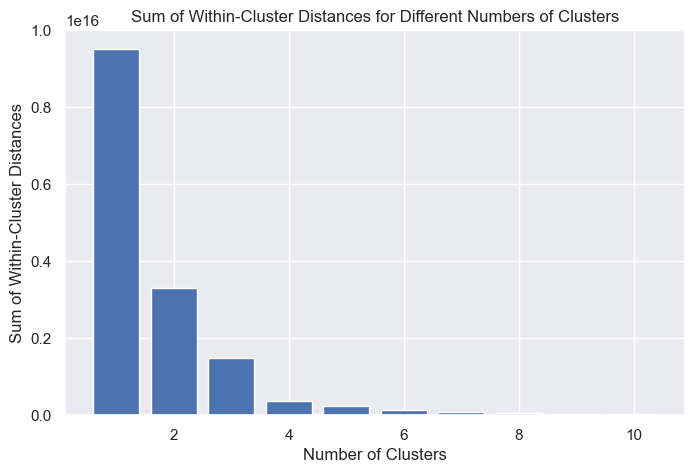

In [198]:
# Plot the sum of within-cluster distances on a bar chart
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(within_cluster_distances) + 1), within_cluster_distances)
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Within-Cluster Distances')
plt.title('Sum of Within-Cluster Distances for Different Numbers of Clusters')
sns.set_theme(style="darkgrid")
plt.show()

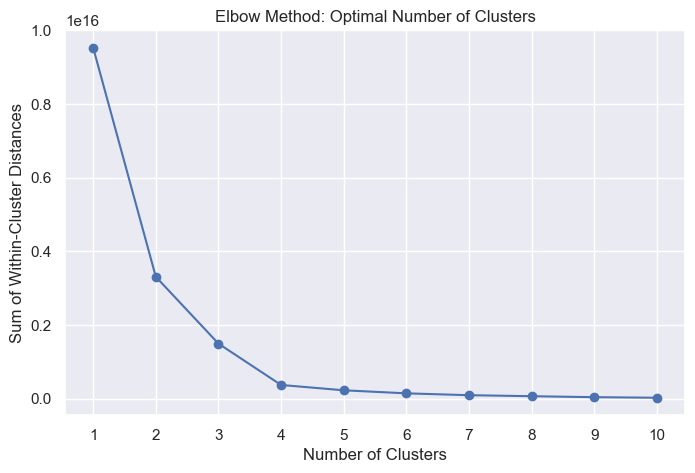

In [196]:
# Plot the elbow method graph to determine the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(within_cluster_distances) + 1), within_cluster_distances, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Within-Cluster Distances')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xticks(range(1, len(within_cluster_distances) + 1))
plt.show()

So, we have 4 as a optimal number of clusters. Let's fit which belongs to which 

In [230]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_state_num)

# Get the cluster labels
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

# Assigning the labels to a new dataframe 
df_state_labels = df_state
df_state_labels['Cluster_KMeans'] = labels

# Display the updated DataFrame with cluster assignments
df_state_labels.head()

States  Population in thousand  Unemployment Rural Male  \
0     Andhra Pradesh                84581.00                       47   
1  Arunachal Pradesh                 1384.00                       35   
2              Assam                31206.00                       30   
3              Bihar               104099.00                       45   
4       Chhattisgarh                25545.00                       27   

   Unemployment Rural Female  Unemployment Urban Male  \
0                         13                       55   
1                         83                       95   
2                         57                       55   
3                         19                       90   
4                          7                       60   

   Unemployment Urban Female  Literacy Rate (in percent)  Number of Employees  \
0                         72                       67.02            111300.00   
1                        140                       65.39               577.00   
2                        169                       72.19             35530.00   
3                        170                       61.80             17317.00   
4                         70                       70.28             40497.00   

   Gross Domestic Product   Per Capita Net State Domestic Product   \
0              23738349.00                                44376.00   
1                568732.00                                39726.00   
2               8107367.00                                24099.00   
3              14227912.00                                13728.00   
4               9697218.00                                34360.00   

   Deposit in Scheduled Commercial Banks in Crores  Length of Road in KMs  \
0                                        292700.00              238001.00   
1                                          5200.00               21555.00   
2                                         58500.00              241789.00   
3                                        119200.00              130642.00   
4                                         56800.00               93965.00   

   Availability Of Power in Net Core Units  \
0                                  8515.00   
1                                    55.00   
2                                   570.00   
3                                  1126.00   
4                                  1462.00   

   Installed Capacity Of Renewable Power Grid im MegaWatt  \
0                                            1114.00        
1                                             104.00        
2                                              31.00        
3                                             114.00        
4                                             306.00        

   No. Of Available Charging Public Stations  Tax Exemption for Electric 2W  \
0                                     222.00                              0   
1                                       9.00                              0   
2                                      48.00                          20000   
3                                      83.00                          20000   
4                                      46.00                              0   

   Tax Exemption For Electric 4W  \
0                              0   
1                              0   
2                         150000   
3                         150000   
4                              0   

   Road Taxes Of Private Vehicle Petrol  Above 10 Lacs in percent  \
0                                              14.00                
1                                               0.00                
2                                               7.50                
3                                              13.00                
4                                               0.00                

   Road Taxes Of Private Vehicle Diesel  Above 10 Lacs in percent  \
0                                        

In [205]:
df_state_labels["Cluster_KMeans"].value_counts()

0    19
2    10
1     5
3     1
Name: Cluster_KMeans, dtype: int64

So, we have made the clusters and appended into the dataframe.

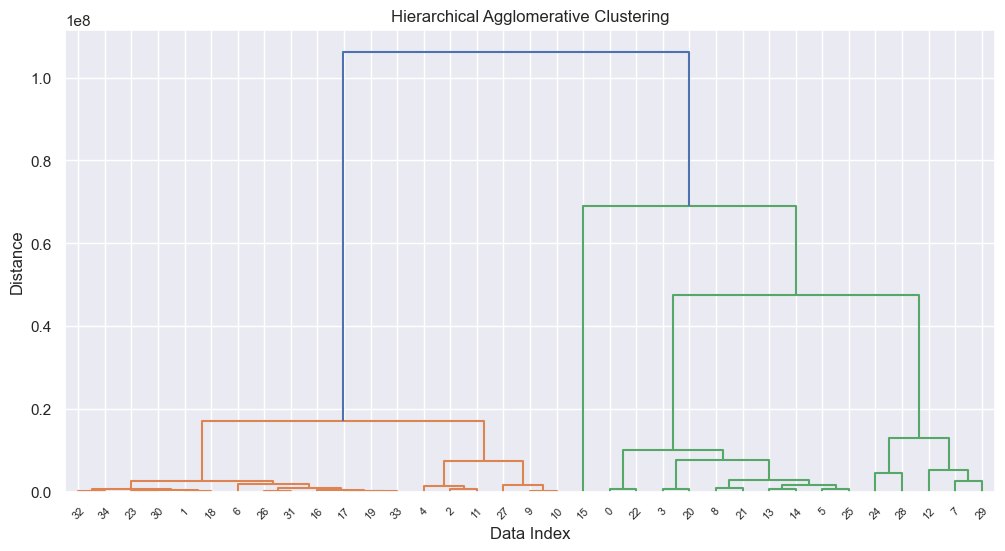

In [206]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
Z = linkage(df_state_num, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Agglomerative Clustering')
plt.xlabel('Data Index')
plt.ylabel('Distance')
plt.show()

In [212]:
from scipy.cluster.hierarchy import fcluster
# Assign cluster labels based on distance threshold
labels = fcluster(Z, t=4, criterion='maxclust')
# Assigning the labels to the dataframe 
df_state_labels["Cluster_hierarchy"] = labels
df_state_labels.head()

States  Population in thousand  Unemployment Rural Male  \
0     Andhra Pradesh                84581.00                       47   
1  Arunachal Pradesh                 1384.00                       35   
2              Assam                31206.00                       30   
3              Bihar               104099.00                       45   
4       Chhattisgarh                25545.00                       27   

   Unemployment Rural Female  Unemployment Urban Male  \
0                         13                       55   
1                         83                       95   
2                         57                       55   
3                         19                       90   
4                          7                       60   

   Unemployment Urban Female  Literacy Rate (in percent)  Number of Employees  \
0                         72                       67.02            111300.00   
1                        140                       65.39               577.00   
2                        169                       72.19             35530.00   
3                        170                       61.80             17317.00   
4                         70                       70.28             40497.00   

   Gross Domestic Product   Per Capita Net State Domestic Product   \
0              23738349.00                                44376.00   
1                568732.00                                39726.00   
2               8107367.00                                24099.00   
3              14227912.00                                13728.00   
4               9697218.00                                34360.00   

   Deposit in Scheduled Commercial Banks in Crores  Length of Road in KMs  \
0                                        292700.00              238001.00   
1                                          5200.00               21555.00   
2                                         58500.00              241789.00   
3                                        119200.00              130642.00   
4                                         56800.00               93965.00   

   Availability Of Power in Net Core Units  \
0                                  8515.00   
1                                    55.00   
2                                   570.00   
3                                  1126.00   
4                                  1462.00   

   Installed Capacity Of Renewable Power Grid im MegaWatt  \
0                                            1114.00        
1                                             104.00        
2                                              31.00        
3                                             114.00        
4                                             306.00        

   No. Of Available Charging Public Stations  Tax Exemption for Electric 2W  \
0                                     222.00                              0   
1                                       9.00                              0   
2                                      48.00                          20000   
3                                      83.00                          20000   
4                                      46.00                              0   

   Tax Exemption For Electric 4W  \
0                              0   
1                              0   
2                         150000   
3                         150000   
4                              0   

   Road Taxes Of Private Vehicle Petrol  Above 10 Lacs in percent  \
0                                              14.00                
1                                               0.00                
2                                               7.50                
3                                              13.00                
4                                               0.00                

   Road Taxes Of Private Vehicle Diesel  Above 10 Lacs in percent  \
0                                        

In [213]:
df_state_labels["Cluster_hierarchy"].value_counts()

1    19
2    10
3     5
4     1
Name: Cluster_hierarchy, dtype: int64

So, we are getting same value from partitioning method and hierarichal method.

Let's perform hard compettive learning on the data. Hard competitve learning differs from standard k-means algorithm in how segemnst are extracted.

In [214]:
def hard_competitive_learning(data, num_neurons, learning_rate, num_epochs):
    # Initialize the weight matrix with random values
    num_features = data.shape[1]
    weights = np.random.rand(num_neurons, num_features)

    # Iterate over the specified number of epochs
    for epoch in range(num_epochs):
        # Shuffle the data for random order
        np.random.shuffle(data)

        # Iterate over each data point
        for point in data:
            # Calculate the distances between the point and each neuron
            distances = np.linalg.norm(weights - point, axis=1)

            # Find the index of the winning neuron (closest to the point)
            winner_index = np.argmin(distances)

            # Update the weights of the winning neuron
            weights[winner_index] += learning_rate * (point - weights[winner_index])

    return weights

In [219]:
# Example usage
data = df_state_num.values
num_neurons = 2
learning_rate = 0.001
num_epochs = 100

weights = hard_competitive_learning(data, num_neurons, learning_rate, num_epochs)
print("Final weights:")
print(weights)

Final weights:
[[5.35253313e+04 3.76096110e+01 2.43985942e+01 5.59538931e+01
  8.06389130e+01 6.33125969e+01 1.49210467e+05 2.23639666e+07
  3.94766299e+04 2.43479093e+05 1.58950644e+05 3.77768318e+03
  1.29460858e+03 3.02930611e+02 5.13161866e+03 4.08263909e+04
  8.88940969e+00 9.26197097e+00 5.69153006e+04 6.67145705e-01]
 [5.81304716e+03 3.30322849e+01 4.82227845e+01 6.11042761e+01
  1.08327903e+02 6.40813324e+01 1.36210066e+04 1.81278105e+06
  3.75491417e+04 1.56574331e+04 2.27105100e+04 2.62930787e+02
  6.53629567e+01 1.41386145e+01 1.54432592e+03 7.50883013e+03
  3.60776614e+00 3.59394358e+00 4.16741887e+03 1.61275550e+00]]


Above here, for each data point, the function calculates the distances between the point and each neuron using the Euclidean distance. It finds the index of the winning neuron (the neuron with the smallest distance) and updates its weights using the learning rate. The weights are adjusted towards the input point. The function returns the final weight matrix after the training process is complete. So, above we are seeing the final weight matrix.

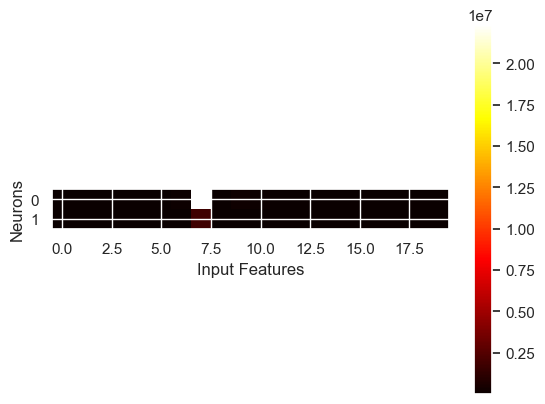

In [220]:
# Plotting using heatmap
plt.imshow(weights, cmap='hot', interpolation='nearest')

# Add colorbar for reference
plt.colorbar()

# Set x-axis and y-axis labels
plt.xlabel('Input Features')
plt.ylabel('Neurons')

# Show the plot
plt.show()

For next we could have performed hybrid clustering like two-step clustering, but this is used when dataset is very large. But, since our dataset is small, we don't need to perform hybrid clustering.  

Instead, we will look at Using Mixtures of Distributions and calculate latent class analysis using a finite mixture of binary distributions.

In [223]:
from sklearn.mixture import GaussianMixture

# Create an instance of the GaussianMixture model
num_clusters = 4  # Number of clusters
reg_covar = 0.001
gmm = GaussianMixture(n_components=num_clusters,reg_covar=reg_covar)

# Fit the model to the data
gmm.fit(df_state_num)

# Get the predicted cluster labels for the data points
labels = gmm.predict(df_state_num)

# Get the cluster centers (means of the Gaussian distributions)
cluster_centers = gmm.means_

# Access the cluster covariance matrices
covariances = gmm.covariances_

# Access the cluster weights (proportions)
weights = gmm.weights_

# Print the cluster labels for each data point
for i in range(len(df_state_num)):
    print(f"Data point {i+1}: Cluster {labels[i]+1}")

Data point 1: Cluster 3
Data point 2: Cluster 1
Data point 3: Cluster 1
Data point 4: Cluster 3
Data point 5: Cluster 1
Data point 6: Cluster 3
Data point 7: Cluster 1
Data point 8: Cluster 2
Data point 9: Cluster 3
Data point 10: Cluster 1
Data point 11: Cluster 1
Data point 12: Cluster 1
Data point 13: Cluster 2
Data point 14: Cluster 3
Data point 15: Cluster 3
Data point 16: Cluster 4
Data point 17: Cluster 1
Data point 18: Cluster 1
Data point 19: Cluster 1
Data point 20: Cluster 1
Data point 21: Cluster 3
Data point 22: Cluster 3
Data point 23: Cluster 3
Data point 24: Cluster 1
Data point 25: Cluster 2
Data point 26: Cluster 3
Data point 27: Cluster 1
Data point 28: Cluster 1
Data point 29: Cluster 2
Data point 30: Cluster 2
Data point 31: Cluster 1
Data point 32: Cluster 1
Data point 33: Cluster 1
Data point 34: Cluster 1
Data point 35: Cluster 1


In [227]:
labels

array([2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 3, 0, 0, 0, 0, 2, 2,
       2, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [229]:
np.unique(labels,return_counts=True)

(array([0, 1, 2, 3], dtype=int64), array([19,  5, 10,  1], dtype=int64))

From above, the number of clusters are same as Hierarichal methods and KMeans method. 

Now we will try making clusters Using Mixtures of Regression Models.

In [244]:
from sklearn.mixture import BayesianGaussianMixture
import numpy as np

X = df_state_num.iloc[:,:-1]
y = df_state_num.iloc[:,[-1]]

# Create an instance of the BayesianGaussianMixture model
num_clusters = 4  # Number of clusters
bgm = BayesianGaussianMixture(n_components=num_clusters)

# Fit the model to the data
bgm.fit(X, y)

# Get the predicted cluster labels for the data points
labels = bgm.predict(X)

# Access the cluster means (regression coefficients)
means = bgm.means_

# Access the cluster covariances
covariances = bgm.covariances_

In [245]:
labels

array([3, 0, 0, 3, 0, 3, 0, 1, 3, 0, 0, 0, 1, 3, 3, 2, 0, 0, 0, 0, 3, 3,
       3, 0, 1, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [246]:
# Print the cluster labels for each data point
for i in range(len(df_state_num)):
    print(f"Data point {i+1}: Cluster {labels[i]+1}")

Data point 1: Cluster 4
Data point 2: Cluster 1
Data point 3: Cluster 1
Data point 4: Cluster 4
Data point 5: Cluster 1
Data point 6: Cluster 4
Data point 7: Cluster 1
Data point 8: Cluster 2
Data point 9: Cluster 4
Data point 10: Cluster 1
Data point 11: Cluster 1
Data point 12: Cluster 1
Data point 13: Cluster 2
Data point 14: Cluster 4
Data point 15: Cluster 4
Data point 16: Cluster 3
Data point 17: Cluster 1
Data point 18: Cluster 1
Data point 19: Cluster 1
Data point 20: Cluster 1
Data point 21: Cluster 4
Data point 22: Cluster 4
Data point 23: Cluster 4
Data point 24: Cluster 1
Data point 25: Cluster 2
Data point 26: Cluster 4
Data point 27: Cluster 1
Data point 28: Cluster 1
Data point 29: Cluster 2
Data point 30: Cluster 2
Data point 31: Cluster 1
Data point 32: Cluster 1
Data point 33: Cluster 1
Data point 34: Cluster 1
Data point 35: Cluster 1


In [247]:
np.unique(labels,return_counts=True)

(array([0, 1, 2, 3], dtype=int64), array([19,  5,  1, 10], dtype=int64))

Plotting the regression coefficent for all the 4 clusters.

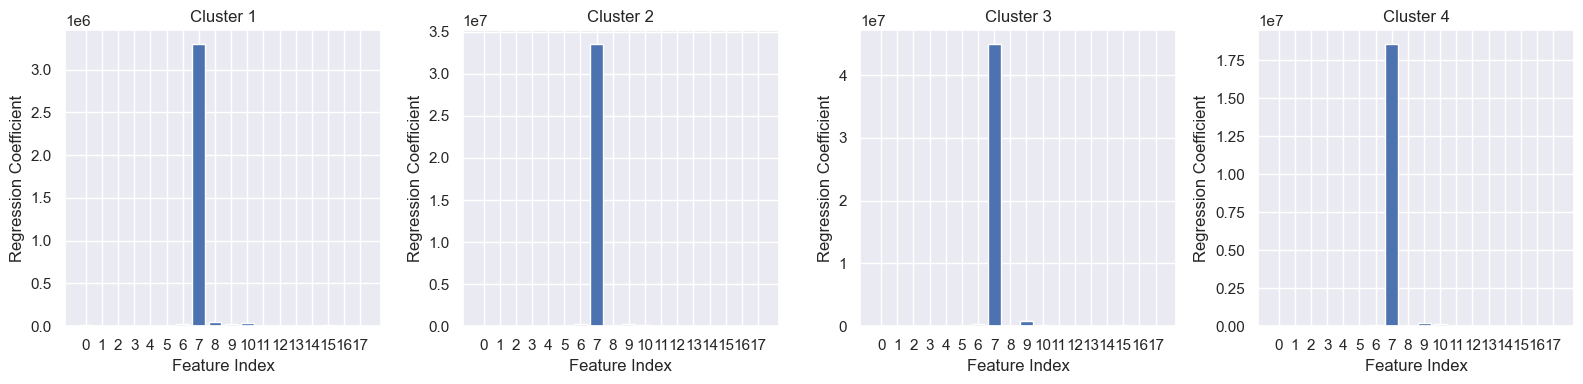

In [249]:
# Get the number of clusters and number of features
num_clusters, num_features = means.shape

# Set up the figure and axes
fig, ax = plt.subplots(1, num_clusters, figsize=(4 * num_clusters, 4))

# Iterate over each cluster
for cluster in range(num_clusters):
    # Get the regression coefficients for the current cluster
    coefficients = means[cluster]
    
    # Plot the coefficients
    ax[cluster].bar(range(num_features), coefficients)
    ax[cluster].set_xlabel('Feature Index')
    ax[cluster].set_ylabel('Regression Coefficient')
    ax[cluster].set_title(f'Cluster {cluster + 1}')
    ax[cluster].set_xticks(range(num_features))
    
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


The core of the segmentation analysis is complete: market segments have been extracted..Since all foure methods of segmentation are making the equal number of clusters, proceeding ahead with KMeans clustering. 

In [269]:
df_state_labels.index = df_state_labels.iloc[:,0]

In [278]:
df_state_labels.drop(["100 Exemption on Road Tax Exemption On Electric Vehicle",],axis=1,inplace=True)

In [252]:
df_state_labels.drop("Cluster_hierarchy",axis=1,inplace=True)

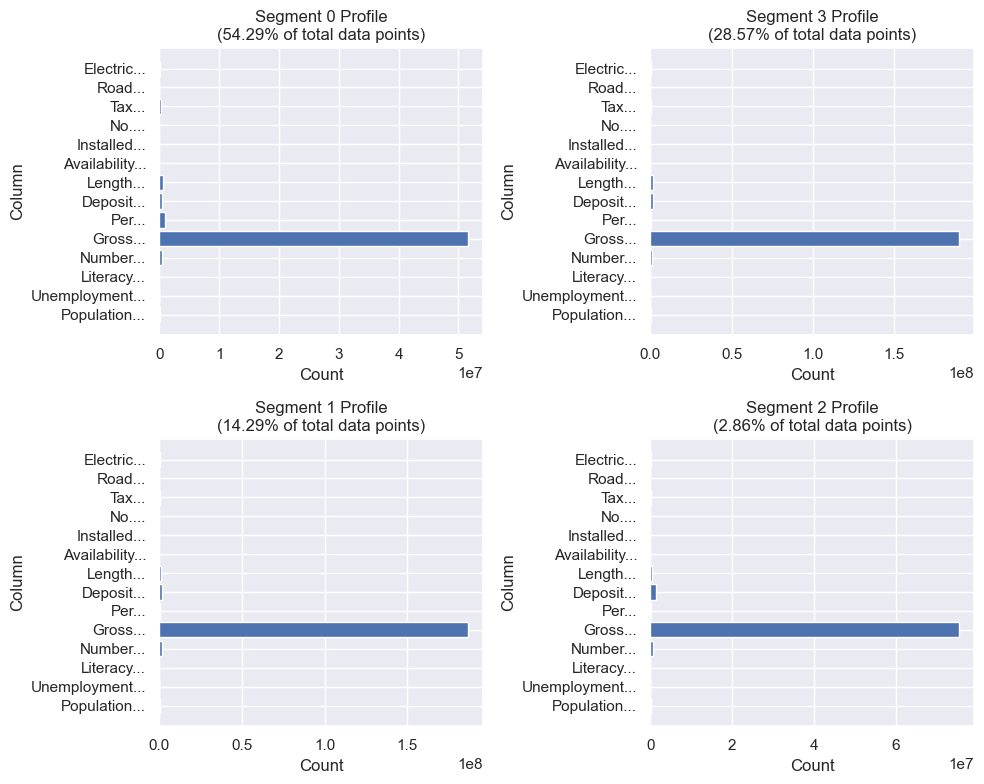

In [283]:
data = df_state_labels

# Calculate the counts and percentages for each segment
segment_counts = data.iloc[:, -1].value_counts()
segment_percentages = segment_counts / len(data) * 100

# Get the column names and modify them
column_names = data.columns[:-1]  # Exclude the last column (segment column)
modified_column_names = [col.split()[0] if len(col.split()) == 1 else col.split()[0] + '...' for col in column_names]

# Set up the subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Flatten the axs array for easier iteration
axs = axs.flatten()

# Iterate over each segment
for segment, ax in zip(segment_counts.index, axs):
    # Get the data points for the current segment
    segment_data = data[data.iloc[:, -1] == segment]
    
    # Calculate the column-wise counts
    column_counts = segment_data.iloc[:, :-1].sum()
    
    # Plot the bar chart
    ax.barh(modified_column_names, column_counts)
    ax.set_xlabel('Count')
    ax.set_ylabel('Column')
    ax.set_title(f'Segment {segment} Profile\n({segment_percentages[segment]:.2f}% of total data points)')
    
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Let's visualize the data along with two principal components.

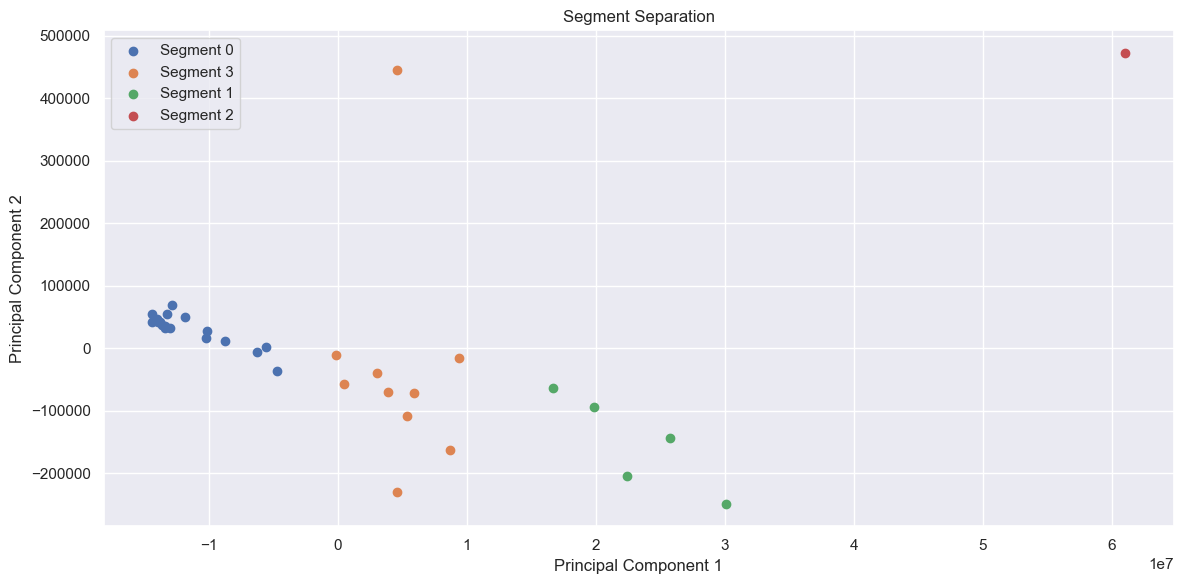

In [297]:
# Perform PCA on the data
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data.iloc[:, :-1])

# Set up the subplots
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 6))

# Plot segment separation based on PC1 and PC2
for segment in segment_counts.index:
    segment_data = pca_data[data.iloc[:, -1] == segment]
    ax1.scatter(segment_data[:, 0], segment_data[:, 1], label=f'Segment {segment}')

ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_title('Segment Separation')
ax1.legend()

# Adjust the spacing between subplots
plt.tight_layout()